<a href="https://colab.research.google.com/github/tdavis10002/mit_adsp/blob/main/mit_adsp_capstone_project_marketing_campaign_customer_segmentation_low_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marketing Campaign Customer Segmentation**

## **Business Goal**

### **Context | Why is customer segmentation important?**

Segmentation is the process of grouping customers with similar characteristics, interests and behavior for the purpose of targeting personalized marketing campaigns for each segment and for similar audiences of prospective customers.

In practice, segmentation involves building customer profiles based on engagement with previous marketing activities to help develop customized campaigns with a greater likelihood of success. The metrics of primary interest for creating effective segments are conversion rates and other response measurements.

Customer segmentation is critical in terms of both cost and conversion rate. For example, research shows email campaigns personalized for specific customer segments lead to higher message open rates, increased click-through rates and lower unsubscribe rates. This improved engagement helps optimize return on investment for marketing spend.

### **Problem | What is the problem to solve?**
Find the best Unsupervised Learning methods to use for creating customer segments for customized marketing campaigns.

### **Objective | What is the objective to reach?**
Increase return on marketing spend by improving effectiveness of personalized campaigns.

### **Questions | What are the questions to answer?**

1 | Which are the most important variables to use for customer segmentation?

2 | Which are the most effective methods for grouping customers?

3 | What are the key characteristic of each customer segment?

4 | What is the best marketing channel to reach each customer segment?

## **Solution Approach**

The Data Science team 1) examined the available customer data to understand its structure and content, 2) performed analysis on each variable to determine key metrics including central tendency and variability, and 3) investigated relationships between variables using dimensionality reduction techniques to discover correlations which can be used to guide business strategy.

## **Data Dictionary**

0 | customer_id | Customer Identifier

1 | customer_yob | Customer Year of Birth

2 | customer_edu | Customer Education

3 | customer_marital | Customer Marital Status

4 | household_income | Household Income

5 | household_children | Household Children

6 | household_teens | Household Teens

7 | customer_doe | Customer Date of Enrollment

8 | customer_dsp | Customer Days Since Purchase

9 | spend_wine | Wine Spend (2 Years)

10 | spend_fruit | Fruit Spend (2 Years)

11 | spend_meat | Meat Spend (2 Years)

12 | spend_fish | Fish Spend (2 Years)

13 | spend_sweet | Sweet Spend (2 Years)

14 | spend_gold | Gold Spend (2 Years)

15 | purchases_discount | Discount Purchases

16 | purchases_web | Web Purchases

17 | purchases_catalog | Catalog Purchases

18 | purchases_store | Store Purchases

19 | visits_web | Web Visits (1 Month)

20 | accepted_offer_1 | Accepted Offer 1

21 | accepted_offer_2 | Accepted Offer 2

22 | accepted_offer_3 | Accepted Offer 3

23 | accepted_offer_4 | Accepted Offer 4

24 | accepted_offer_5 | Accepted Offer 5

25 | accepted_offer_last | Accepted Offer Last

26 | complained | Complained (2 Years)

## **Notes**

This notebook provides guidance for one possible solution. Other solutions may be explored.

- Obervation cells include code results findings and insights.

- Think About It cells provide reasoning for choice of specific methods.

### **Mount Google Drive**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Ignore Warnings**

In [ ]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

### **Import Libraries**

In [ ]:
# Import NumPy
import numpy as np

# Import Pandas
import pandas as pd

# Import Matplotlib
import matplotlib.pyplot as plt

# Import Seaborn
import seaborn as sns

# Import SciPy Cluster Hierarchy Dendrogram
from scipy.cluster.hierarchy import dendrogram
# Import SciPy Cluster Hierarchy Linkage
from scipy.cluster.hierarchy import linkage
# Import SciPy Cluster Hierarchy Cophenet
from scipy.cluster.hierarchy import cophenet

# Import SciPy Spatial Distance
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist

# Import Scikit-Learn
import sklearn
# Import Scikit-Learn Cluster Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
# Import Scikit-Learn Cluster DBSCAN
from sklearn.cluster import DBSCAN
# Import Scikit-Learn Cluster K-Means
from sklearn.cluster import KMeans
# Import Scikit-Learn Decomposition PCA
from sklearn.decomposition import PCA
# Import Scikit-Learn Manifold t-SNE
from sklearn.manifold import TSNE
# Import Scikit-Learn Metrics Silhouette Score
from sklearn.metrics import silhouette_score
# Import Scikit-Learn Mixture Gaussian Mixture
from sklearn.mixture import GaussianMixture
# Import Scikit-Learn Preprocessing Standard Scaler
from sklearn.preprocessing import StandardScaler
# Import Scikit-Learn Preprocessing Label Encoder
from sklearn.preprocessing import LabelEncoder

# Install Scikit-Learn-Extra
!pip install scikit-learn-extra
# Import Scikit-Learn-Extra
import sklearn_extra
# Import Scikit-Learn-Extra Cluster KMedoids
from sklearn_extra.cluster import KMedoids

# Install Yellowbrick
!pip install yellowbrick
# Import Yellowbrick Cluster Silhouette Visualizer
from yellowbrick.cluster import SilhouetteVisualizer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.0 MB/s eta 0:00:00


### **Read Data**

In [ ]:
# Read Marketing Campaign Customer Data
# data = pd.read_csv("/content/drive/MyDrive/ADSP/11 | Capstone Project/mit_adsp_capstone_project_marketing_campaign_customers.csv")
# data = pd.read_excel('/content/drive/MyDrive/ADSP/11 | Capstone Project/mit_adsp_capstone_project_marketing_campaign_customers_1.xlsx')
data = pd.read_excel('/content/drive/MyDrive/ADSP/11 | Capstone Project/mit_adsp_capstone_project_marketing_campaign_customers_2.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_id          2233 non-null   int64 
 1   customer_yob         2233 non-null   int64 
 2   customer_edu         2233 non-null   object
 3   customer_marital     2233 non-null   object
 4   household_income     2233 non-null   int64 
 5   household_children   2233 non-null   int64 
 6   household_teens      2233 non-null   int64 
 7   customer_doe         2233 non-null   object
 8   customer_dsp         2233 non-null   int64 
 9   spend_wine           2233 non-null   int64 
 10  spend_fruit          2233 non-null   int64 
 11  spend_meat           2233 non-null   int64 
 12  spend_fish           2233 non-null   int64 
 13  spend_sweet          2233 non-null   int64 
 14  spend_gold           2233 non-null   int64 
 15  purchases_discount   2233 non-null   int64 
 16  purcha

#### **Observation**
- Data has 2233 rows (0 to 2232) and 27 (0 to 26) columns.
- Adjusted variable names in Excel before data read.
- Adjusted variable order in Excel before data read.
- Corrected invalid, inconsistent and missing values in Excel before data read.
 - Customer Year of Birth | Removed 3 (0.13%) invalid values.
 - Customer Education | Replaced 1127 (50.31%) Graduation values with Bachelor.
 - Customer Education | Replaced 201 (8.97%) 2n Cycle values with Master.
 - Customer Education | Replaced 485 (21.65%) PhD values with Doctor.
 - Customer Marital Status | Removed 2 (0.09%) invalid Absurd values.
 - Customer Marital Status | Removed 2 (0.09%) invalid YOLO values.
 - Customer Marital Status | Replaced 579 (25.85%) Together values with Couple.
 - Customer Marital Status | Replaced 3 (0.13%) Alone values with Single.
 - Household Income | Replaced 24 (1.07%) missing values with median ($51,373).

### **Rename Columns (Do Not Use)**

In [ ]:
# Rename Columns
# data = data.rename(columns={'ID': 'customer_id'})
# data = data.rename(columns={'Year_Birth': 'customer_yob'})
# data = data.rename(columns={'Education': 'customer_edu'})
# data = data.rename(columns={'Marital_Status': 'customer_marital'})
# data = data.rename(columns={'Income': 'household_income'})
# data = data.rename(columns={'Kidhome': 'household_children'})
# data = data.rename(columns={'Teenhome': 'household_teens'})
# data = data.rename(columns={'Dt_Customer': 'customer_doe'})
# data = data.rename(columns={'Recency': 'customer_dsp'})
# data = data.rename(columns={'MntWines': 'spend_wine'})
# data = data.rename(columns={'MntFruits': 'spend_fruit'})
# data = data.rename(columns={'MntMeatProducts': 'spend_meat'})
# data = data.rename(columns={'MntFishProducts': 'spend_fish'})
# data = data.rename(columns={'MntSweetProducts': 'spend_sweet'})
# data = data.rename(columns={'MntGoldProds': 'spend_gold'})
# data = data.rename(columns={'NumDealsPurchases': 'purchases_discount'})
# data = data.rename(columns={'NumWebPurchases': 'purchases_web'})
# data = data.rename(columns={'NumCatalogPurchases': 'purchases_catalog'})
# data = data.rename(columns={'NumStorePurchases': 'purchases_store'})
# data = data.rename(columns={'NumWebVisitsMonth': 'visits_web'})
# data = data.rename(columns={'AcceptedCmp3': 'accepted_offer_3'})
# data = data.rename(columns={'AcceptedCmp4': 'accepted_offer_4'})
# data = data.rename(columns={'AcceptedCmp5': 'accepted_offer_5'})
# data = data.rename(columns={'AcceptedCmp1': 'accepted_offer_1'})
# data = data.rename(columns={'AcceptedCmp2': 'accepted_offer_2'})
# data = data.rename(columns={'Complain': 'complained'})
# data = data.rename(columns={'Response': 'accepted_offer_last'})
# data.info()

### **Check Variable Unique Values**

In [ ]:
# Print Variable Unique Values
for column in data.columns:
    print(f"{column} | {data[column].nunique()}")

customer_id | 2233
customer_yob | 56
customer_edu | 4
customer_marital | 5
household_income | 1970
household_children | 3
household_teens | 3
customer_doe | 663
customer_dsp | 100
spend_wine | 775
spend_fruit | 158
spend_meat | 557
spend_fish | 182
spend_sweet | 177
spend_gold | 212
purchases_discount | 15
purchases_web | 15
purchases_catalog | 14
purchases_store | 14
visits_web | 16
accepted_offer_1 | 2
accepted_offer_2 | 2
accepted_offer_3 | 2
accepted_offer_4 | 2
accepted_offer_5 | 2
accepted_offer_last | 2
complained | 2


#### **Observation**
- Customer Identifier variable has all unique values and will be removed.

### **Check Categorical Variable Values**

In [ ]:
# Customer Year of Birth Unique Values
print(data['customer_yob'].nunique())
print(sorted(data['customer_yob'].unique()))
# print(data['customer_yob'].value_counts().sort_index())

56
[1940, 1941, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996]


In [ ]:
# Customer Education Unique Values
print(data['customer_edu'].nunique())
print(sorted(data['customer_edu'].unique()))
# print(data['customer_edu'].value_counts().sort_index())

4
['Bachelor', 'Basic', 'Doctor', 'Master']


In [ ]:
# Customer Marital Status Unique Values
print(data['customer_marital'].nunique())
print(sorted(data['customer_marital'].unique()))
# print(data['customer_marital'].value_counts().sort_index())

5
['Couple', 'Divorced', 'Married', 'Single', 'Widow']


In [ ]:
# Complained Unique Values
print(data['complained'].nunique())
print(sorted(data['complained'].unique()))
# print(data['complained'].value_counts().sort_index())

2
[0, 1]


#### **Observation**
- Categorical variable values look good.

## **Data Cleaning**

### **Check Household Income Median**

In [ ]:
# Replace Household Income Median Missing Values with Median
# data.household_income.fillna(data.household_income.median(), inplace=True)
data.household_income.median()

51373.0

#### **Observation**
- Household Income missing values replaced with median in Excel before data read.

### **Adjust Customer Date of Enrollment Format**

In [ ]:
# Convert Customer Date of Enrollment to DateTime
data.customer_doe = pd.to_datetime(data.customer_doe, infer_datetime_format=True)
# Format Customer Date of Enrollment
data.customer_doe = data.customer_doe.dt.strftime('%Y-%m-%d')

In [ ]:
# Check Data Head
data.head()

customer_id  customer_yob customer_edu customer_marital  household_income  \
0         5524          1957     Bachelor           Single             58138   
1         2174          1954     Bachelor           Single             46344   
2         4141          1965     Bachelor           Couple             71613   
3         6182          1984     Bachelor           Couple             26646   
4         5324          1981       Doctor          Married             58293   

   household_children  household_teens customer_doe  customer_dsp  spend_wine  \
0                   0                0   2012-04-09            58         635   
1                   1                1   2014-08-03            38          11   
2                   0                0   2013-08-21            26         426   
3                   1                0   2014-10-02            26          11   
4                   1                0   2014-01-19            94         173   

   ...  purchases_catalog  purchases_store  visits_web  accepted_offer_1  \
0  ...                 10                4           7                 0   
1  ...                  1                2           5                 0   
2  ...                  2               10           4                 0   
3  ...                  0                4           6                 0   
4  ...                  3                6           5                 0   

   accepted_offer_2  accepted_offer_3  accepted_offer_4  accepted_offer_5  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   accepted_offer_last  complained  
0                    1           0  
1                    0           0  
2                    0           0  
3                    0           0  
4                    0           0  

[5 rows x 27 columns]

In [ ]:
# Check Data Tail
data.tail()

customer_id  customer_yob customer_edu customer_marital  \
2228        10870          1967     Bachelor          Married   
2229         4001          1946       Doctor           Couple   
2230         7270          1981     Bachelor         Divorced   
2231         8235          1956       Master           Couple   
2232         9405          1954       Doctor          Married   

      household_income  household_children  household_teens customer_doe  \
2228             61223                   0                1   2013-06-13   
2229             64014                   2                1   2014-10-06   
2230             56981                   0                0   2014-01-25   
2231             69245                   0                1   2014-01-24   
2232             52869                   1                1   2012-10-15   

      customer_dsp  spend_wine  ...  purchases_catalog  purchases_store  \
2228            46         709  ...                  3                4   
2229            56         406  ...                  2                5   
2230            91         908  ...                  3               13   
2231             8         428  ...                  5               10   
2232            40          84  ...                  1                4   

      visits_web  accepted_offer_1  accepted_offer_2  accepted_offer_3  \
2228           5                 0                 0                 0   
2229           7                 1                 0                 0   
2230           6                 0                 0                 0   
2231           3                 0                 0                 0   
2232           7                 0                 0                 0   

      accepted_offer_4  accepted_offer_5  accepted_offer_last  complained  
2228                 0                 0                    0           0  
2229                 0                 0                    0           0  
2230                 1                 0                    0           0  
2231                 0                 0                    0           0  
2232                 0                 0                    1           0  

[5 rows x 27 columns]

#### **Observation**
- Customer Date of Enrollment format is consistent.

### **Adjust Variable Data Types (Do Not Use)**

In [ ]:
# Convert Household Income Variable from Float to Integer
# data.household_income = data.household_income.astype(int)

In [ ]:
# Convert Accepted Offer Variables from Integer to Boolean
# data.accepted_offer_1 = data.accepted_offer_1.astype(bool)
# data.accepted_offer_2 = data.accepted_offer_2.astype(bool)
# data.accepted_offer_3 = data.accepted_offer_3.astype(bool)
# data.accepted_offer_4 = data.accepted_offer_4.astype(bool)
# data.accepted_offer_5 = data.accepted_offer_5.astype(bool)
# data.accepted_offer_last = data.accepted_offer_last.astype(bool)

In [ ]:
# Convert Complained Variable from Integer to Boolean
# data.complained = data.complained.astype(bool)

In [ ]:
# Check Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_id          2233 non-null   int64 
 1   customer_yob         2233 non-null   int64 
 2   customer_edu         2233 non-null   object
 3   customer_marital     2233 non-null   object
 4   household_income     2233 non-null   int64 
 5   household_children   2233 non-null   int64 
 6   household_teens      2233 non-null   int64 
 7   customer_doe         2233 non-null   object
 8   customer_dsp         2233 non-null   int64 
 9   spend_wine           2233 non-null   int64 
 10  spend_fruit          2233 non-null   int64 
 11  spend_meat           2233 non-null   int64 
 12  spend_fish           2233 non-null   int64 
 13  spend_sweet          2233 non-null   int64 
 14  spend_gold           2233 non-null   int64 
 15  purchases_discount   2233 non-null   int64 
 16  purcha

#### **Observation**
- Variable data types look good.

### **Remove Customer Identifier Variable**

In [ ]:
# Drop Customer Identifier Variable
data.drop('customer_id', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_yob         2233 non-null   int64 
 1   customer_edu         2233 non-null   object
 2   customer_marital     2233 non-null   object
 3   household_income     2233 non-null   int64 
 4   household_children   2233 non-null   int64 
 5   household_teens      2233 non-null   int64 
 6   customer_doe         2233 non-null   object
 7   customer_dsp         2233 non-null   int64 
 8   spend_wine           2233 non-null   int64 
 9   spend_fruit          2233 non-null   int64 
 10  spend_meat           2233 non-null   int64 
 11  spend_fish           2233 non-null   int64 
 12  spend_sweet          2233 non-null   int64 
 13  spend_gold           2233 non-null   int64 
 14  purchases_discount   2233 non-null   int64 
 15  purchases_web        2233 non-null   int64 
 16  purcha

#### **Observation**
- Removed Customer Identifier variable.
- Data has 2233 rows (0 to 2232) and 26 (0 to 25) columns.

### **Check Duplicate Rows**

In [ ]:
# Check Duplicate Rows
data[data.duplicated()]

customer_yob customer_edu customer_marital  household_income  \
83            1963       Master           Couple             38620   
179           1951       Master          Married             78497   
279           1976     Bachelor           Couple             51369   
280           1946     Bachelor           Couple             37760   
360           1978       Doctor          Married             37717   
...            ...          ...              ...               ...   
2211          1978     Bachelor           Couple             22775   
2214          1982       Master           Single             75777   
2218          1968     Bachelor           Couple             58554   
2227          1974     Bachelor          Married             34421   
2229          1946       Doctor           Couple             64014   

      household_children  household_teens customer_doe  customer_dsp  \
83                     0                0   2013-11-05            56   
179                    0                0   2013-01-12            44   
279                    0                1   2012-10-25            84   
280                    0                0   2012-08-31            20   
360                    1                0   2012-11-23            31   
...                  ...              ...          ...           ...   
2211                   1                0   2013-06-19            40   
2214                   0                0   2013-04-07            12   
2218                   1                1   2012-09-26            55   
2227                   1                0   2013-01-07            81   
2229                   2                1   2014-10-06            56   

      spend_wine  spend_fruit  ...  purchases_catalog  purchases_store  \
83           112           17  ...                  5                3   
179          207           26  ...                  7               12   
279          297            7  ...                  2                4   
280           84            5  ...                  1                6   
360            9            0  ...                  0                2   
...          ...          ...  ...                ...              ...   
2211           5            1  ...                  0                2   
2214         712           26  ...                  6               11   
2218         368           24  ...                  2                6   
2227           3            3  ...                  0                2   
2229         406            0  ...                  2                5   

      visits_web  accepted_offer_1  accepted_offer_2  accepted_offer_3  \
83             3                 0                 0                 0   
179            2                 1                 0                 0   
279            8                 0                 0                 0   
280            7                 0                 0                 0   
360            9                 0                 0                 0   
...          ...               ...               ...               ...   
2211           8                 0                 0                 0   
2214           1                 0                 0                 0   
2218           7                 0                 0                 0   
2227           7                 0                 0                 0   
2229           7                 1                 0                 0   

      accepted_offer_4  accepted_offer_5  accepted_offer_last  complained  
83                   0                 0                    0           0  
179                  0                 0                    0           0  
279                  0                 0                    0           0  
280                  0                 0                    0           0  
360                  0                 0                    0           0  
...                ...               ...                  ...     

#### **Observation**
- There are 183 duplicate rows.

## **Data Exploration**

### **Check Numerical Variable Summary Statistics**

In [ ]:
# # Check Data Description
data.describe().T

count          mean           std     min      25%  \
customer_yob         2233.0   1968.892521     11.697927  1940.0   1959.0   
household_income     2233.0  52212.678907  25057.342450  1730.0  35441.0   
household_children   2233.0      0.445141      0.538620     0.0      0.0   
household_teens      2233.0      0.506494      0.544669     0.0      0.0   
customer_dsp         2233.0     49.142409     28.948483     0.0     24.0   
spend_wine           2233.0    303.933274    336.854130     0.0     24.0   
spend_fruit          2233.0     26.239140     39.703732     0.0      1.0   
spend_meat           2233.0    166.891178    225.724334     0.0     16.0   
spend_fish           2233.0     37.402597     54.447473     0.0      3.0   
spend_sweet          2233.0     27.087326     41.314436     0.0      1.0   
spend_gold           2233.0     43.827138     51.865500     0.0      9.0   
purchases_discount   2233.0      2.324675      1.932741     0.0      1.0   
purchases_web        2233.0      4.085087      2.780487     0.0      2.0   
purchases_catalog    2233.0      2.659651      2.921105     0.0      0.0   
purchases_store      2233.0      5.793551      3.253742     0.0      3.0   
visits_web           2233.0      5.320197      2.424492     0.0      3.0   
accepted_offer_1     2233.0      0.064039      0.244878     0.0      0.0   
accepted_offer_2     2233.0      0.012987      0.113244     0.0      0.0   
accepted_offer_3     2233.0      0.072996      0.260188     0.0      0.0   
accepted_offer_4     2233.0      0.074787      0.263107     0.0      0.0   
accepted_offer_5     2233.0      0.072100      0.258712     0.0      0.0   
accepted_offer_last  2233.0      0.148679      0.355851     0.0      0.0   
complained           2233.0      0.008957      0.094235     0.0      0.0   

                         50%      75%       max  
customer_yob          1970.0   1977.0    1996.0  
household_income     51373.0  68281.0  666666.0  
household_children       0.0      1.0       2.0  
household_teens          0.0      1.0       2.0  
customer_dsp            49.0     74.0      99.0  
spend_wine             173.0    505.0    1493.0  
spend_fruit              8.0     33.0     199.0  
spend_meat              67.0    232.0    1725.0  
spend_fish              12.0     50.0     259.0  
spend_sweet              8.0     33.0     263.0  
spend_gold              24.0     56.0     362.0  
purchases_discount       2.0      3.0      15.0  
purchases_web            4.0      6.0      27.0  
purchases_catalog        2.0      4.0      28.0  
purchases_store          5.0      8.0      13.0  
visits_web               6.0      7.0      20.0  
accepted_offer_1         0.0      0.0       1.0  
accepted_offer_2         0.0      0.0       1.0  
accepted_offer_3         0.0      0.0       1.0  
accepted_offer_4         0.0      0.0       1.0  
accepted_offer_5         0.0      0.0       1.0  
accepted_offer_last      0.0      0.0       1.0  
complained               0.0      0.0       1.0

#### **Observation**
- Household Income variability is very high idicating possible outliers.
- Wine Spend mean is much higher than other product categories.
- Meat Spend mean is much higher than other product categories.
- Wine Spend variability is relatively high idicating possible outliers.
- Meat Spend variability is relatively high idicating possible outliers.
- Store Purchases mean is higher than Web Purchases.
- Store Purchases mean is much higher than Catalog Purchases.


### **Check Categorical Variable Unique Value Counts**

In [ ]:
# Print Catagorical Variable Unique Value Counts
for column in ["customer_edu", "customer_marital", "household_children", "household_teens", "complained"]:
    # print(column, "|", data[column].nunique())
    # print(sorted(data[column].unique()))
    print(data[column].value_counts().sort_index())
    print()

customer_edu
Bachelor    1126
Basic         54
Doctor       483
Master       570
Name: count, dtype: int64

customer_marital
Couple      579
Divorced    231
Married     864
Single      482
Widow        77
Name: count, dtype: int64

household_children
0    1287
1     898
2      48
Name: count, dtype: int64

household_teens
0    1154
1    1027
2      52
Name: count, dtype: int64

complained
0    2213
1      20
Name: count, dtype: int64



#### **Observation**
- Customer Education | 2n Cycle and Master are the same. Combined in preprocessing.
- Customer Marital Status | Alone and Single are the same. Combined in preprocessing.
- Customer Marital Status | Absurd and YOLO are invalid. Removed in preprocessing.

## **Univariate Analysis**
Examine individual variables.

## **Numerical Univariate Analysis**
Visualize numerical data using Histograms and Box Plots.

### **Numerical Variable Histograms + Box Plots (Do Not Use)**

Customer_Yob
Skew | -0.09


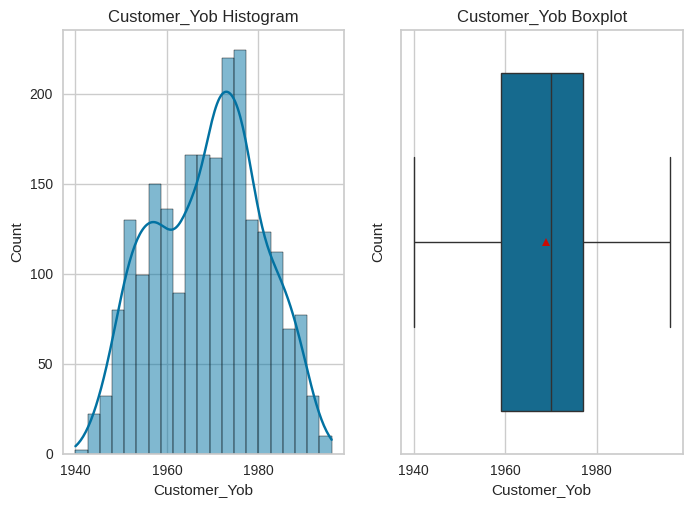

Household_Income
Skew | 6.81


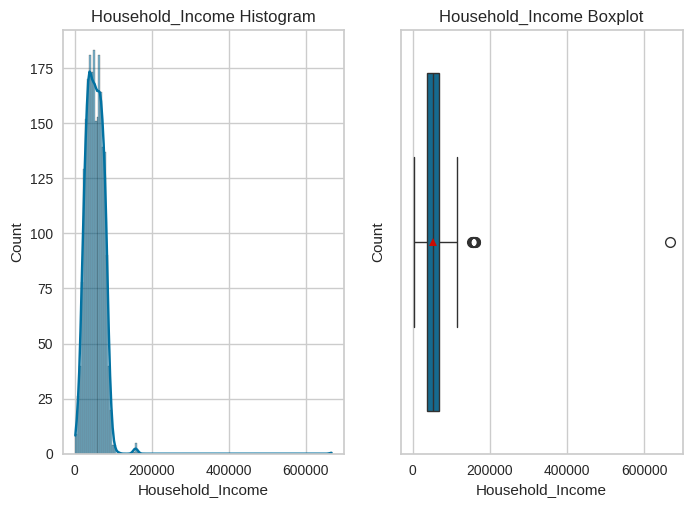

Customer_Dsp
Skew | -0.0


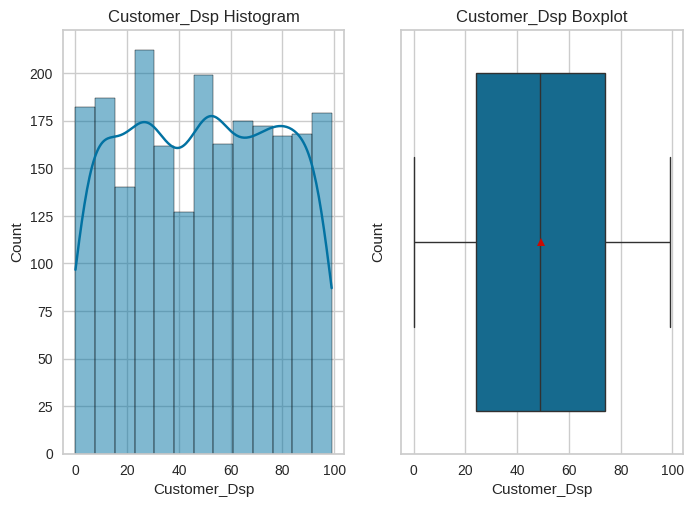

Spend_Wine
Skew | 1.18


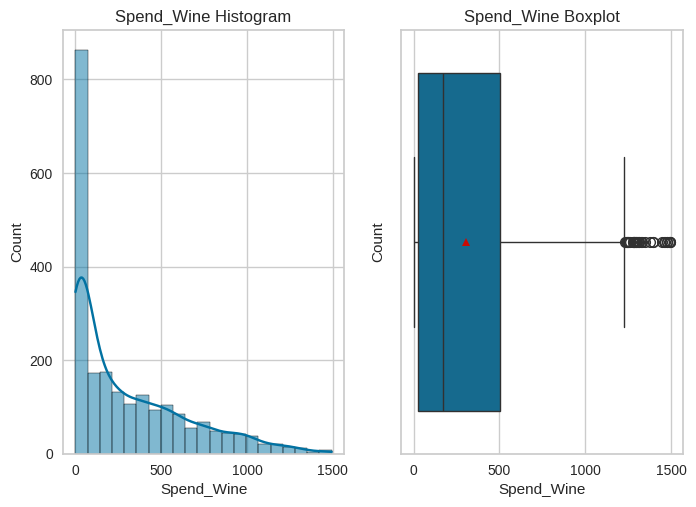

Spend_Fruit
Skew | 2.11


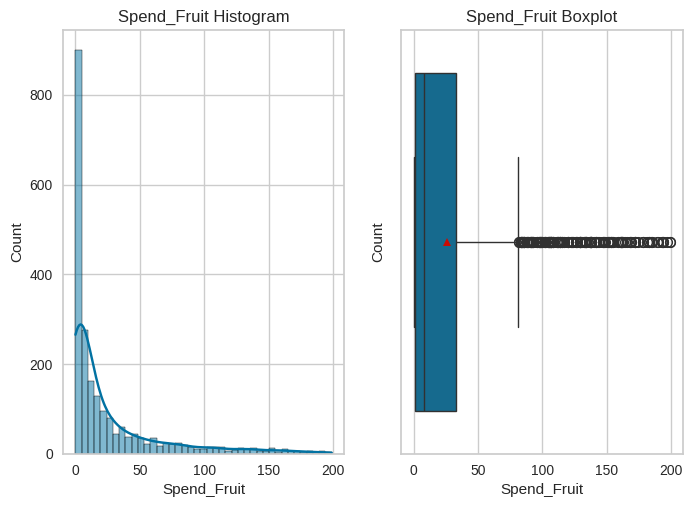

Spend_Meat
Skew | 2.09


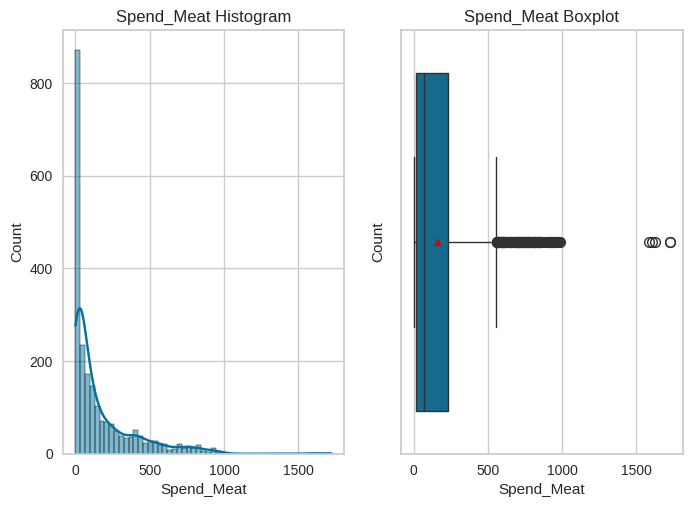

Spend_Fish
Skew | 1.92


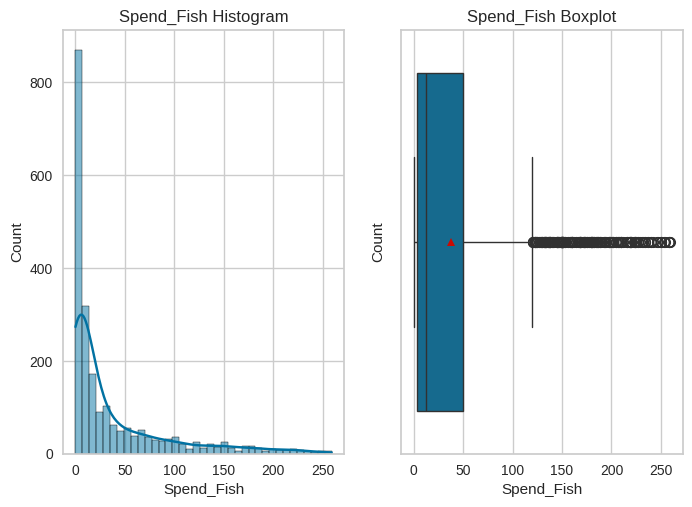

Spend_Sweet
Skew | 2.14


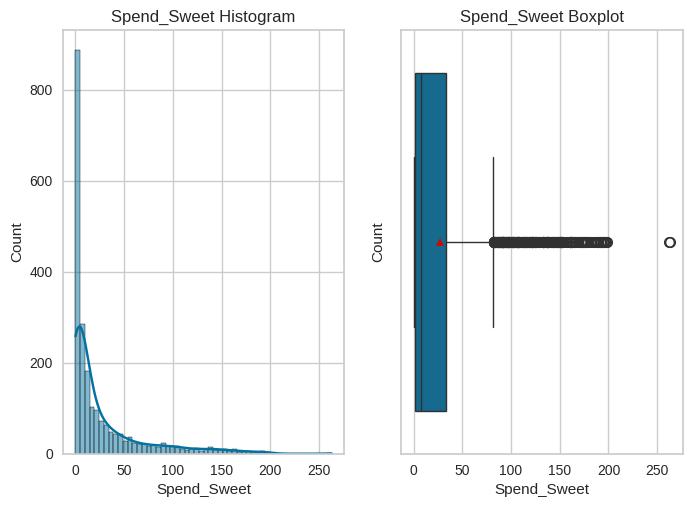

Spend_Gold
Skew | 1.89


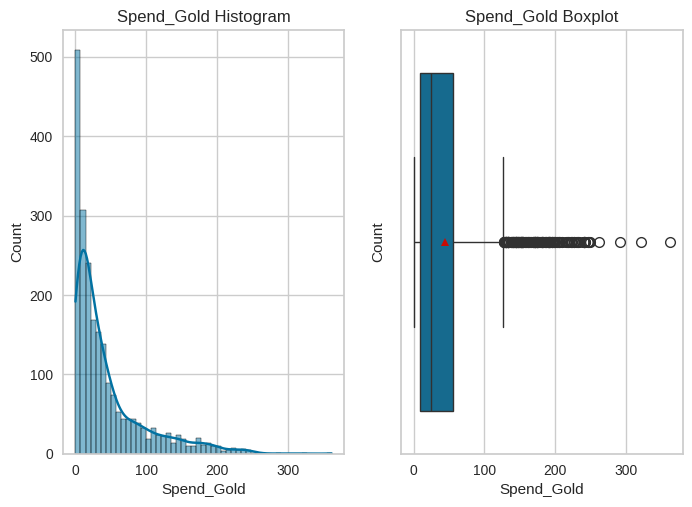

In [ ]:
# Create Columns Histogram + Boxplot
for column in ["customer_yob", "household_income", "customer_dsp", "spend_wine", "spend_fruit", "spend_meat", "spend_fish", "spend_sweet", "spend_gold"]:
    print(column.title())
    print('Skew |', round(data[column].skew(), 2))
    # plt.figure(figsize = (16,9))
    plt.subplot(1, 2, 1)
    sns.histplot(data=data, x=column, kde=True)
    plt.title(f'{column.title()} Histogram')
    plt.xlabel(column.title())
    plt.ylabel('Count')
    plt.subplot(1, 2, 2)
    sns.boxplot(data=data, x=column, showmeans=True)
    plt.title(f'{column.title()} Boxplot')
    plt.xlabel(column.title())
    plt.ylabel('Count')
    plt.show()

### **Household Income Histogram + Box Plot**

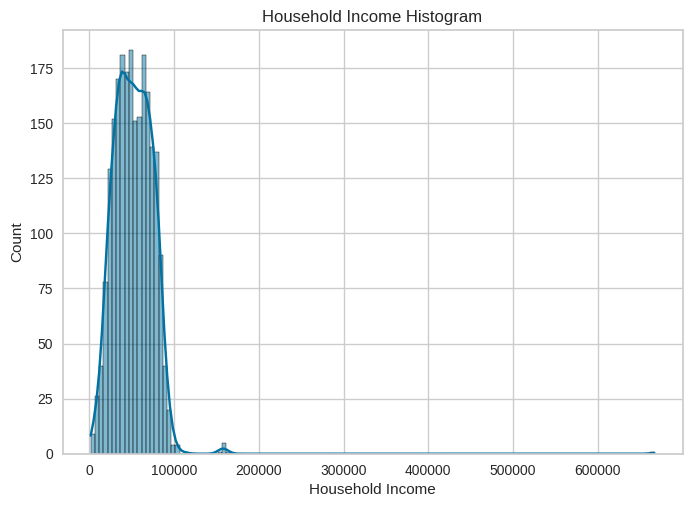

In [ ]:
# Household Income Histogram
# plt.figure(figsize = (16,9))
sns.histplot(data=data, x='household_income', kde=True)
plt.title('Household Income Histogram')
plt.xlabel('Household Income')
plt.ylabel('Count')
plt.show()

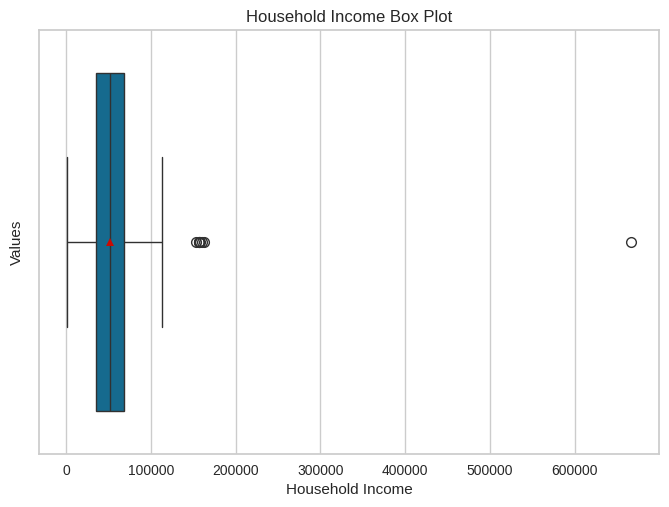

In [ ]:
# Household Income Box Plot
# plt.figure(figsize = (16,9))
sns.boxplot(data=data, x='household_income', showmeans=True)
plt.title('Household Income Box Plot')
plt.xlabel('Household Income')
plt.ylabel('Values')
plt.show()

#### **Observation**
- Household Income has some moderate outliers.
- Household Income has one extreme outlier.
- Household Income outliers will be removed.

### **Data Outliers (Do Not Use)**

In [ ]:
# Calculate Data Q1 + Q3 + IQR + Upper Whisker
data_q1 = data.select_dtypes(include=['number']).quantile(q=0.25)
print(data_q1)
data_q3 = data.select_dtypes(include=['number']).quantile(q=0.75)
print(data_q3)
data_iqr = data_q3 - data_q1
print(data_iqr)
data_uw = data_q3 + (1.5 * data_iqr)
print(data_uw)

customer_yob            1959.0
household_income       35441.0
household_children         0.0
household_teens            0.0
customer_dsp              24.0
spend_wine                24.0
spend_fruit                1.0
spend_meat                16.0
spend_fish                 3.0
spend_sweet                1.0
spend_gold                 9.0
purchases_discount         1.0
purchases_web              2.0
purchases_catalog          0.0
purchases_store            3.0
visits_web                 3.0
accepted_offer_1           0.0
accepted_offer_2           0.0
accepted_offer_3           0.0
accepted_offer_4           0.0
accepted_offer_5           0.0
accepted_offer_last        0.0
complained                 0.0
Name: 0.25, dtype: float64
customer_yob            1977.0
household_income       68281.0
household_children         1.0
household_teens            1.0
customer_dsp              74.0
spend_wine               505.0
spend_fruit               33.0
spend_meat               232.0
spend_fish  

### **Household Income Outliers**

In [ ]:
# Calculate Household Income Upper Whisker
household_income_q1 = data['household_income'].quantile(q=0.25)
print('Household Income Q1 |', household_income_q1)
household_income_q3 = data['household_income'].quantile(q=0.75)
print('Household Income Q3 |', household_income_q3)
household_income_iqr = household_income_q3 - household_income_q1
print('Household Income IQR |', household_income_iqr)
household_income_uw = household_income_q3 + 1.5 * household_income_iqr
print('Household Income UW |', household_income_uw)

Household Income Q1 | 35441.0
Household Income Q3 | 68281.0
Household Income IQR | 32840.0
Household Income UW | 117541.0


In [ ]:
# Household Income Outlier Rows
data[data.household_income > household_income_uw]

customer_yob customer_edu customer_marital  household_income  \
164           1973       Doctor          Married            157243   
614           1976       Doctor           Couple            162397   
652           1975     Bachelor         Divorced            153924   
684           1982       Doctor          Married            160803   
1297          1971       Master           Couple            157733   
1650          1977     Bachelor           Couple            157146   
2128          1949       Doctor          Married            156924   
2226          1977     Bachelor           Couple            666666   

      household_children  household_teens customer_doe  customer_dsp  \
164                    0                1   2014-01-03            98   
614                    1                1   2013-03-06            31   
652                    0                0   2014-07-02            81   
684                    0                0   2012-04-08            21   
1297                   1                0   2013-04-06            37   
1650                   0                0   2013-04-29            13   
2128                   0                0   2013-08-29            85   
2226                   1                0   2013-02-06            23   

      spend_wine  spend_fruit  ...  purchases_catalog  purchases_store  \
164           20            2  ...                 22                0   
614           85            1  ...                  0                1   
652            1            1  ...                  0                0   
684           55           16  ...                 28                1   
1297          39            1  ...                  0                1   
1650           1            0  ...                 28                0   
2128           2            1  ...                  0                0   
2226           9           14  ...                  1                3   

      visits_web  accepted_offer_1  accepted_offer_2  accepted_offer_3  \
164            0                 0                 0                 0   
614            1                 0                 0                 0   
652            0                 0                 0                 0   
684            0                 0                 0                 0   
1297           1                 0                 0                 0   
1650           1                 0                 0                 0   
2128           0                 0                 0                 0   
2226           6                 0                 0                 0   

      accepted_offer_4  accepted_offer_5  accepted_offer_last  complained  
164                  0                 0                    0           0  
614                  0                 0                    0           0  
652                  0                 0                    0           0  
684                  0                 0                    0           0  
1297                 0                 0                    0           0  
1650                 0                 0                    0           0  
2128                 0                 0                    0           0  
2226                 0                 0                    0           0  

[8 rows x 26 columns]

#### **Observation**
- Household Income has 8 (0.36%) outliers.

In [ ]:
# Calculate Household Income 99.5 Percentile
data['household_income'].quantile(q=0.995).round(2)

102129.6

#### **Observation**
- Household Income outliers are above 99.5 percentile.

In [ ]:
# Drop Household Income Outliers
data.drop(data[data.household_income > household_income_uw].index, inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_yob         2225 non-null   int64 
 1   customer_edu         2225 non-null   object
 2   customer_marital     2225 non-null   object
 3   household_income     2225 non-null   int64 
 4   household_children   2225 non-null   int64 
 5   household_teens      2225 non-null   int64 
 6   customer_doe         2225 non-null   object
 7   customer_dsp         2225 non-null   int64 
 8   spend_wine           2225 non-null   int64 
 9   spend_fruit          2225 non-null   int64 
 10  spend_meat           2225 non-null   int64 
 11  spend_fish           2225 non-null   int64 
 12  spend_sweet          2225 non-null   int64 
 13  spend_gold           2225 non-null   int64 
 14  purchases_discount   2225 non-null   int64 
 15  purchases_web        2225 non-null   int64 
 16  purcha

#### **Observation**
- Removed 8 (0.36%) Household Income outliers.
- Data has 2225 rows (0 to 2224) and 26 (0 to 25) columns.

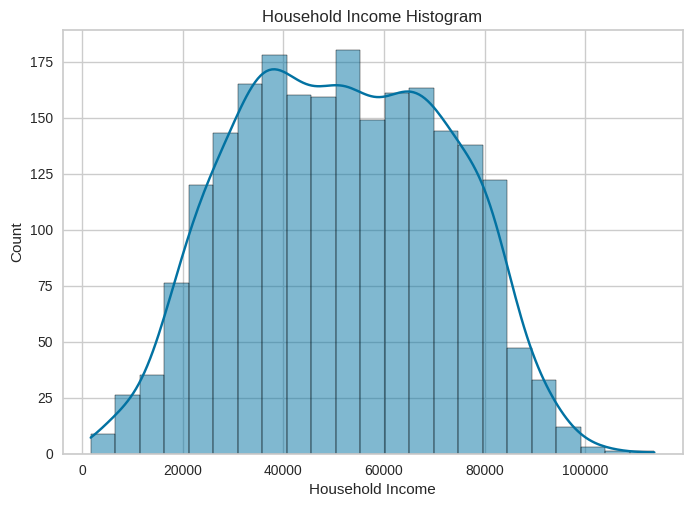

In [ ]:
# Household Income Histogram
# plt.figure(figsize = (16,9))
sns.histplot(data=data, x='household_income', kde=True)
plt.title('Household Income Histogram')
plt.xlabel('Household Income')
plt.ylabel('Count')
plt.show()

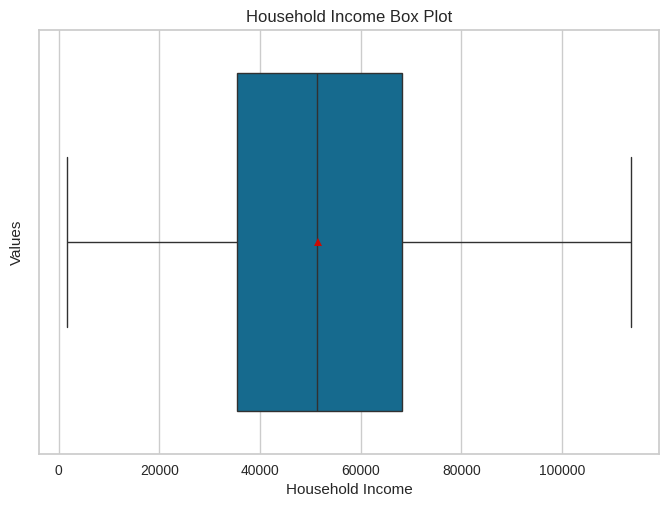

In [ ]:
# Household Income Box Plot
# plt.figure(figsize = (16,9))
sns.boxplot(data=data, x='household_income', showmeans=True)
plt.title('Household Income Box Plot')
plt.xlabel('Household Income')
plt.ylabel('Values')
plt.show()

### **Spend Variable Histograms + Box Plots**

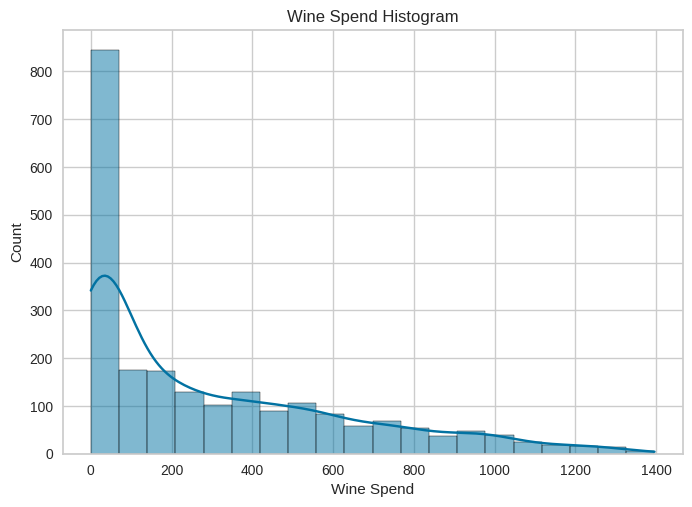

In [ ]:
# Wine Spend Histogram
# plt.figure(figsize = (16,9))
sns.histplot(data=data, x='spend_wine', kde=True)
plt.title('Wine Spend Histogram')
plt.xlabel('Wine Spend')
plt.ylabel('Count')
plt.show()

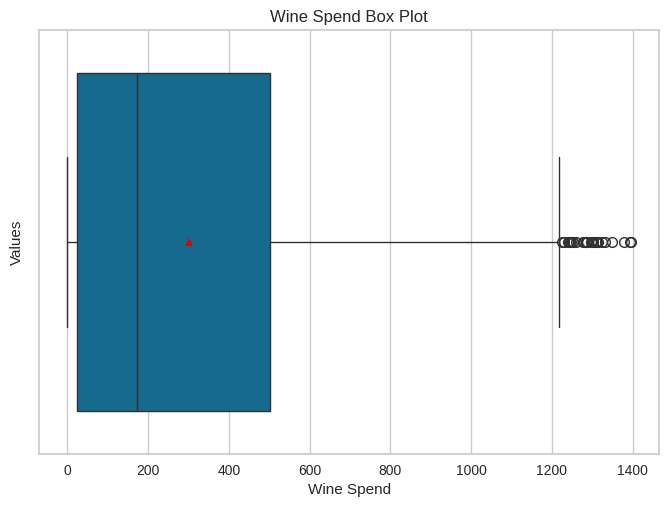

In [ ]:
# Wine Spend Box Plot
# plt.figure(figsize = (16,9))
sns.boxplot(data=data, x='spend_wine', showmeans=True)
plt.title('Wine Spend Box Plot')
plt.xlabel('Wine Spend')
plt.ylabel('Values')
plt.show()

In [ ]:
# Wine Spend Outlier Rows
data.spend_wine[data.spend_wine > 1400]

Series([], Name: spend_wine, dtype: int64)

In [ ]:
# Drop Wine Spend Outliers
data.drop(data[data.spend_wine > 1400].index, inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_yob         2216 non-null   int64 
 1   customer_edu         2216 non-null   object
 2   customer_marital     2216 non-null   object
 3   household_income     2216 non-null   int64 
 4   household_children   2216 non-null   int64 
 5   household_teens      2216 non-null   int64 
 6   customer_doe         2216 non-null   object
 7   customer_dsp         2216 non-null   int64 
 8   spend_wine           2216 non-null   int64 
 9   spend_fruit          2216 non-null   int64 
 10  spend_meat           2216 non-null   int64 
 11  spend_fish           2216 non-null   int64 
 12  spend_sweet          2216 non-null   int64 
 13  spend_gold           2216 non-null   int64 
 14  purchases_discount   2216 non-null   int64 
 15  purchases_web        2216 non-null   int64 
 16  purcha

#### **Observation**
- Removed 9 Wine Spend outliers.
- Data has 2216 rows (0 to 2215) and 26 (0 to 25) columns.

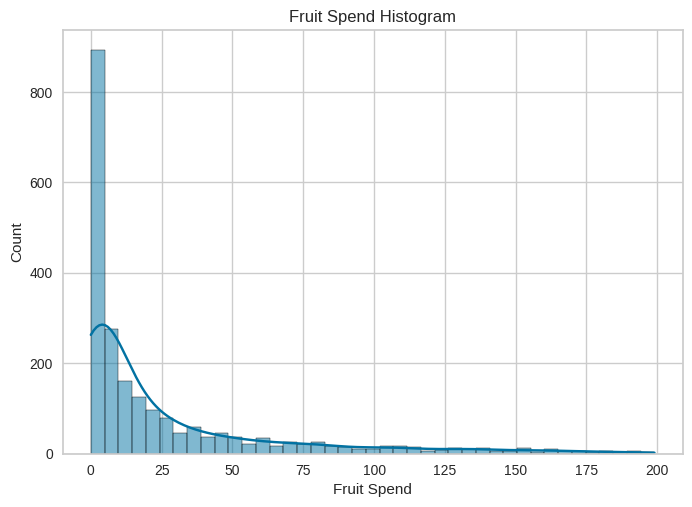

In [ ]:
# Fruit Spend Histogram
# plt.figure(figsize = (16,9))
sns.histplot(data=data, x='spend_fruit', kde=True)
plt.title('Fruit Spend Histogram')
plt.xlabel('Fruit Spend')
plt.ylabel('Count')
plt.show()

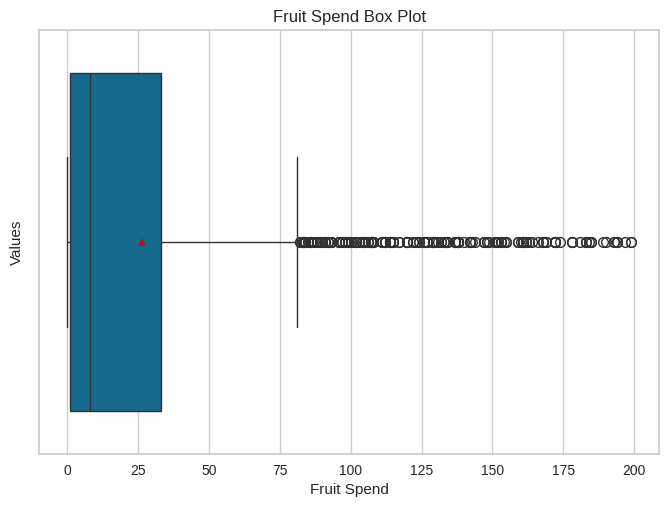

In [ ]:
# Fruit Spend Box Plot
# plt.figure(figsize = (16,9))
sns.boxplot(data=data, x='spend_fruit', showmeans=True)
plt.title('Fruit Spend Box Plot')
plt.xlabel('Fruit Spend')
plt.ylabel('Values')
plt.show()

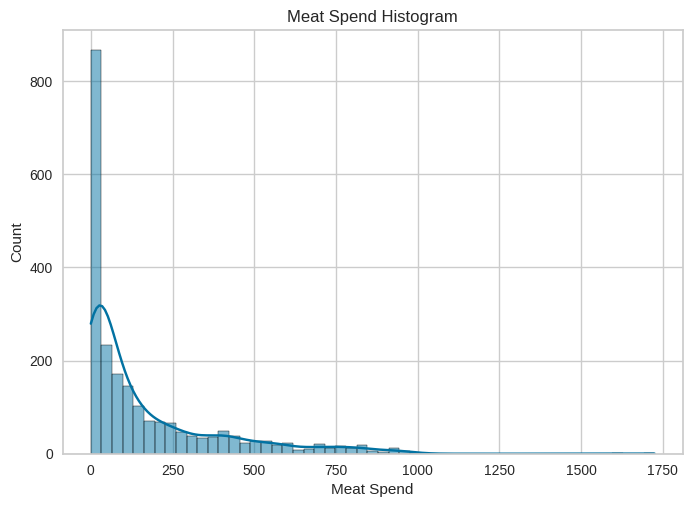

In [ ]:
# Meat Spend Histogram
# plt.figure(figsize = (16,9))
sns.histplot(data=data, x='spend_meat', kde=True)
plt.title('Meat Spend Histogram')
plt.xlabel('Meat Spend')
plt.ylabel('Count')
plt.show()

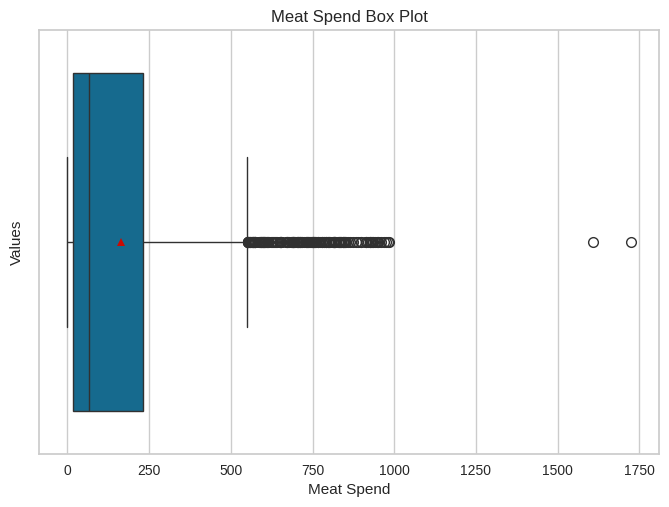

In [ ]:
# Meat Spend Box Plot
# plt.figure(figsize = (16,9))
sns.boxplot(data=data, x='spend_meat', showmeans=True)
plt.title('Meat Spend Box Plot')
plt.xlabel('Meat Spend')
plt.ylabel('Values')
plt.show()

In [ ]:
# Meat Spend Outlier Rows
data.spend_meat[data.spend_meat > 1000]

21      1725
2205    1607
Name: spend_meat, dtype: int64

In [ ]:
# Drop Meat Spend Outliers
data.drop(data[data.spend_meat > 1000].index, inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2214 entries, 0 to 2213
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_yob         2214 non-null   int64 
 1   customer_edu         2214 non-null   object
 2   customer_marital     2214 non-null   object
 3   household_income     2214 non-null   int64 
 4   household_children   2214 non-null   int64 
 5   household_teens      2214 non-null   int64 
 6   customer_doe         2214 non-null   object
 7   customer_dsp         2214 non-null   int64 
 8   spend_wine           2214 non-null   int64 
 9   spend_fruit          2214 non-null   int64 
 10  spend_meat           2214 non-null   int64 
 11  spend_fish           2214 non-null   int64 
 12  spend_sweet          2214 non-null   int64 
 13  spend_gold           2214 non-null   int64 
 14  purchases_discount   2214 non-null   int64 
 15  purchases_web        2214 non-null   int64 
 16  purcha

#### **Observation**
- Removed 2 Meat Spend outliers.
- Data has 2214 rows (0 to 2213) and 26 (0 to 25) columns.

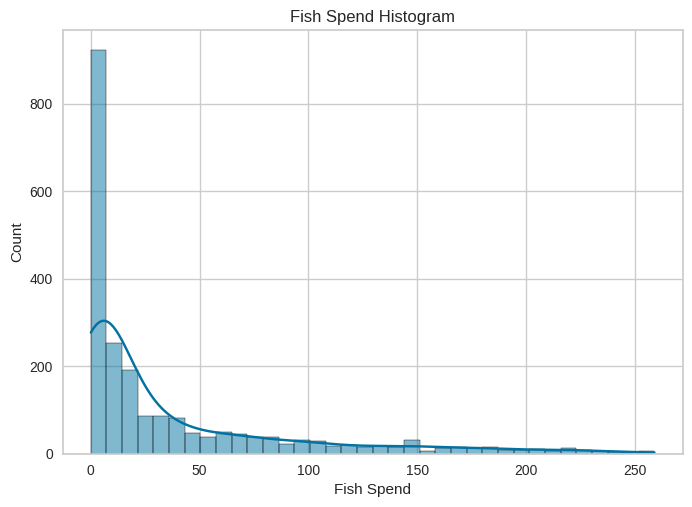

In [ ]:
# Fish Spend Histogram
# plt.figure(figsize = (16,9))
sns.histplot(data=data, x='spend_fish', kde=True)
plt.title('Fish Spend Histogram')
plt.xlabel('Fish Spend')
plt.ylabel('Count')
plt.show()

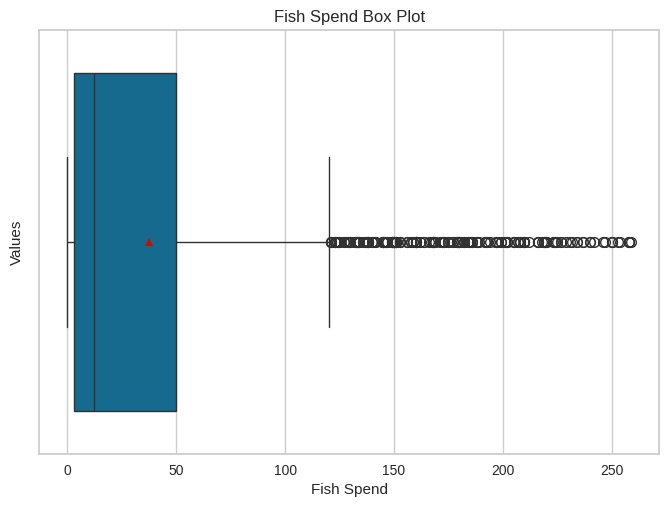

In [ ]:
# Fish Spend Box Plot
# plt.figure(figsize = (16,9))
sns.boxplot(data=data, x='spend_fish', showmeans=True)
plt.title('Fish Spend Box Plot')
plt.xlabel('Fish Spend')
plt.ylabel('Values')
plt.show()

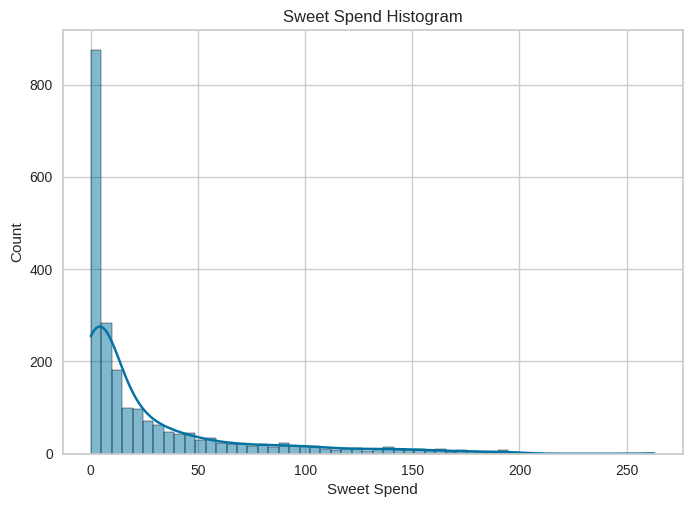

In [ ]:
# Sweet Spend Histogram
# plt.figure(figsize = (16,9))
sns.histplot(data=data, x='spend_sweet', kde=True)
plt.title('Sweet Spend Histogram')
plt.xlabel('Sweet Spend')
plt.ylabel('Count')
plt.show()

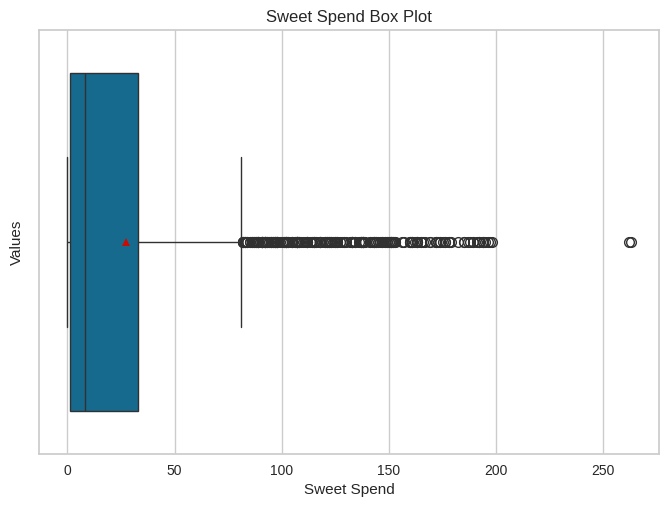

In [ ]:
# Sweet Spend Box Plot
# plt.figure(figsize = (16,9))
sns.boxplot(data=data, x='spend_sweet', showmeans=True)
plt.title('Sweet Spend Box Plot')
plt.xlabel('Sweet Spend')
plt.ylabel('Values')
plt.show()

In [ ]:
# Sweet Spend Outlier Rows
data.spend_sweet[data.spend_sweet > 200]

26      263
1881    262
Name: spend_sweet, dtype: int64

In [ ]:
# Drop Sweet Spend Outliers
data.drop(data[data.spend_sweet > 200].index, inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_yob         2212 non-null   int64 
 1   customer_edu         2212 non-null   object
 2   customer_marital     2212 non-null   object
 3   household_income     2212 non-null   int64 
 4   household_children   2212 non-null   int64 
 5   household_teens      2212 non-null   int64 
 6   customer_doe         2212 non-null   object
 7   customer_dsp         2212 non-null   int64 
 8   spend_wine           2212 non-null   int64 
 9   spend_fruit          2212 non-null   int64 
 10  spend_meat           2212 non-null   int64 
 11  spend_fish           2212 non-null   int64 
 12  spend_sweet          2212 non-null   int64 
 13  spend_gold           2212 non-null   int64 
 14  purchases_discount   2212 non-null   int64 
 15  purchases_web        2212 non-null   int64 
 16  purcha

#### **Observation**
- Removed 2 Sweet Spend outliers.
- Data has 2212 rows (0 to 2211) and 26 (0 to 25) columns.

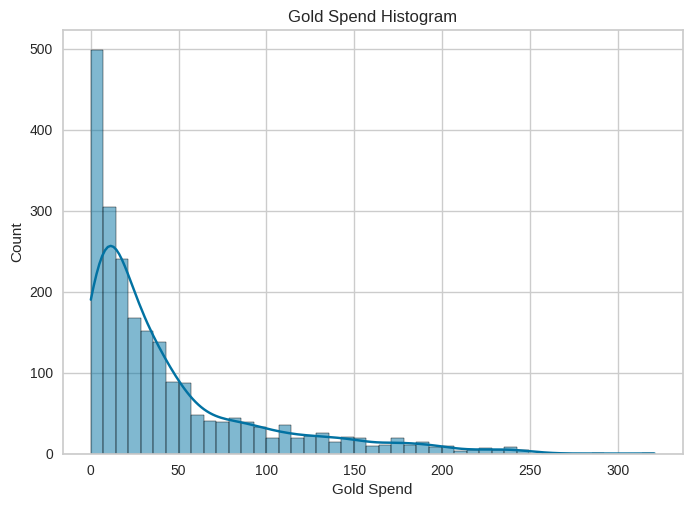

In [ ]:
# Gold Spend Histogram
# plt.figure(figsize = (16,9))
sns.histplot(data=data, x='spend_gold', kde=True)
plt.title('Gold Spend Histogram')
plt.xlabel('Gold Spend')
plt.ylabel('Count')
plt.show()

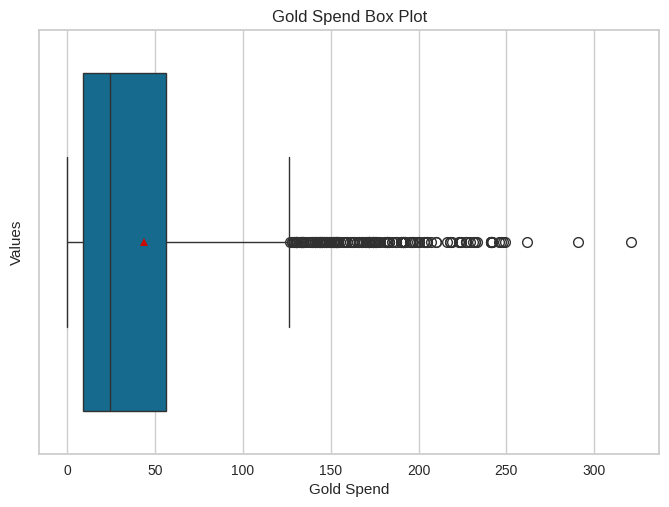

In [ ]:
# Gold Spend Box Plot
# plt.figure(figsize = (16,9))
sns.boxplot(data=data, x='spend_gold', showmeans=True)
plt.title('Gold Spend Box Plot')
plt.xlabel('Gold Spend')
plt.ylabel('Values')
plt.show()

In [ ]:
# Gold Spend Outlier Rows
data.spend_gold[data.spend_gold > 250]

1314    262
1788    291
1955    321
Name: spend_gold, dtype: int64

In [ ]:
# Drop Gold Spend Outliers
data.drop(data[data.spend_gold > 250].index, inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_yob         2209 non-null   int64 
 1   customer_edu         2209 non-null   object
 2   customer_marital     2209 non-null   object
 3   household_income     2209 non-null   int64 
 4   household_children   2209 non-null   int64 
 5   household_teens      2209 non-null   int64 
 6   customer_doe         2209 non-null   object
 7   customer_dsp         2209 non-null   int64 
 8   spend_wine           2209 non-null   int64 
 9   spend_fruit          2209 non-null   int64 
 10  spend_meat           2209 non-null   int64 
 11  spend_fish           2209 non-null   int64 
 12  spend_sweet          2209 non-null   int64 
 13  spend_gold           2209 non-null   int64 
 14  purchases_discount   2209 non-null   int64 
 15  purchases_web        2209 non-null   int64 
 16  purcha

#### **Observation**
- Removed 3 Gold Spend outliers.
- Data has 2209 rows (0 to 2208) and 26 (0 to 25) columns.

## **Categorical Univariate Analysis**

### **Categorial Variable Count Plots**

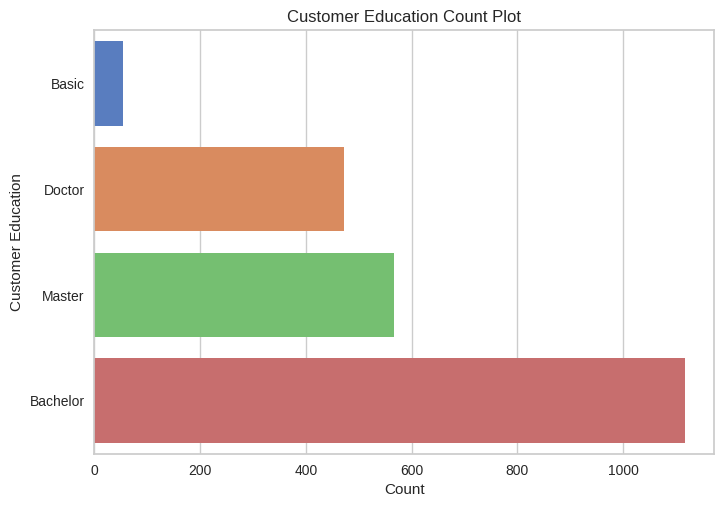

In [ ]:
# Customer Education Count Plot
# plt.figure(figsize = (16,9))
sns.countplot(data=data, y='customer_edu', palette='muted', order = data['customer_edu'].value_counts().index[::-1])
plt.title('Customer Education Count Plot')
plt.xlabel('Count')
plt.ylabel('Customer Education')
plt.show()

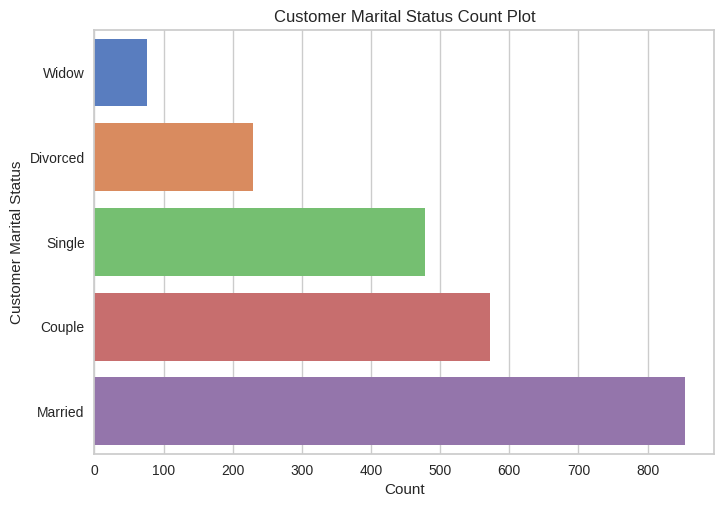

In [ ]:
# Customer Marital Status Count Plot
# plt.figure(figsize = (16,9))
sns.countplot(data=data, y='customer_marital', palette='muted', order = data['customer_marital'].value_counts().index[::-1])
plt.title('Customer Marital Status Count Plot')
plt.xlabel('Count')
plt.ylabel('Customer Marital Status')
plt.show()

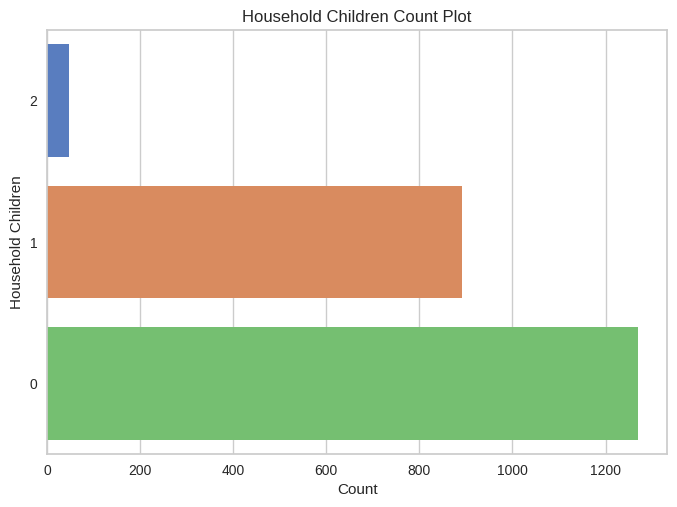

In [ ]:
# Household Children Count Plot
# plt.figure(figsize = (16,9))
sns.countplot(data=data, y='household_children', palette='muted', order = data['household_children'].value_counts().index[::-1])
plt.title('Household Children Count Plot')
plt.xlabel('Count')
plt.ylabel('Household Children')
plt.show()

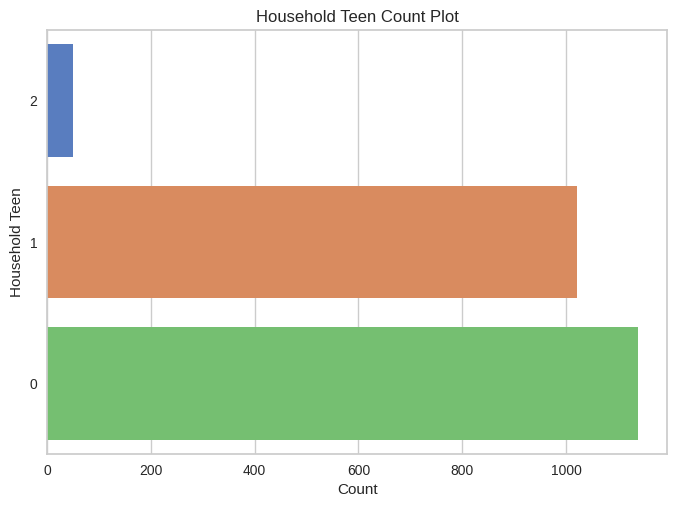

In [ ]:
# Household Teen Count Plot
# plt.figure(figsize = (16,9))
sns.countplot(data=data, y='household_teens', palette='muted', order = data['household_teens'].value_counts().index[::-1])
plt.title('Household Teen Count Plot')
plt.xlabel('Count')
plt.ylabel('Household Teen')
plt.show()

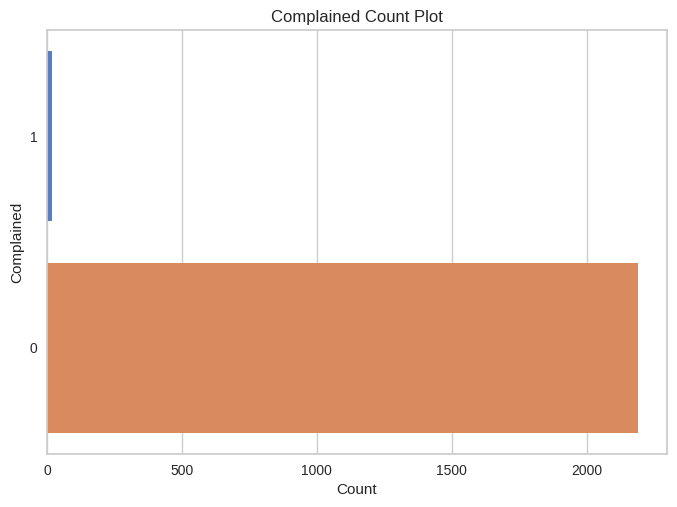

In [ ]:
# Complained Count Plot
# plt.figure(figsize = (16,9))
sns.countplot(data=data, y='complained', palette='muted', order = data['complained'].value_counts().index[::-1])
plt.title('Complained Count Plot')
plt.xlabel('Count')
plt.ylabel('Complained')
plt.show()

#### **Observation**

### **Count Plot Function (Does Not Work)**

In [ ]:
# Function | Count Plot Annotated with Percentage for each Category Value
def perc_on_bar(data, z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z])                                          # Length of the column
    ax = sns.countplot(data[z],palette='Paired',order = data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # Percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05                  # Width of the plot
        y = p.get_y() + p.get_height()                            # Height of the plot

        ax.annotate(percentage, (x, y), size = 12)                # Annotate percentage

    plt.show()

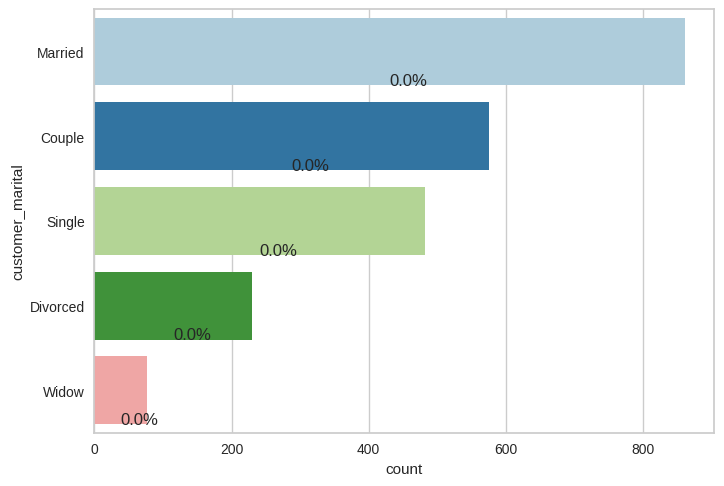

In [ ]:
# Customer Marital Status Count Plot
perc_on_bar(data, 'customer_marital')

#### **Observation**
- Function does not calculate percentages properly.
- Function does not display percentages properly.

## **Bivariate Analysis**
Examine variable correlation.

### **Numerical Variable Correlation Heatmap**

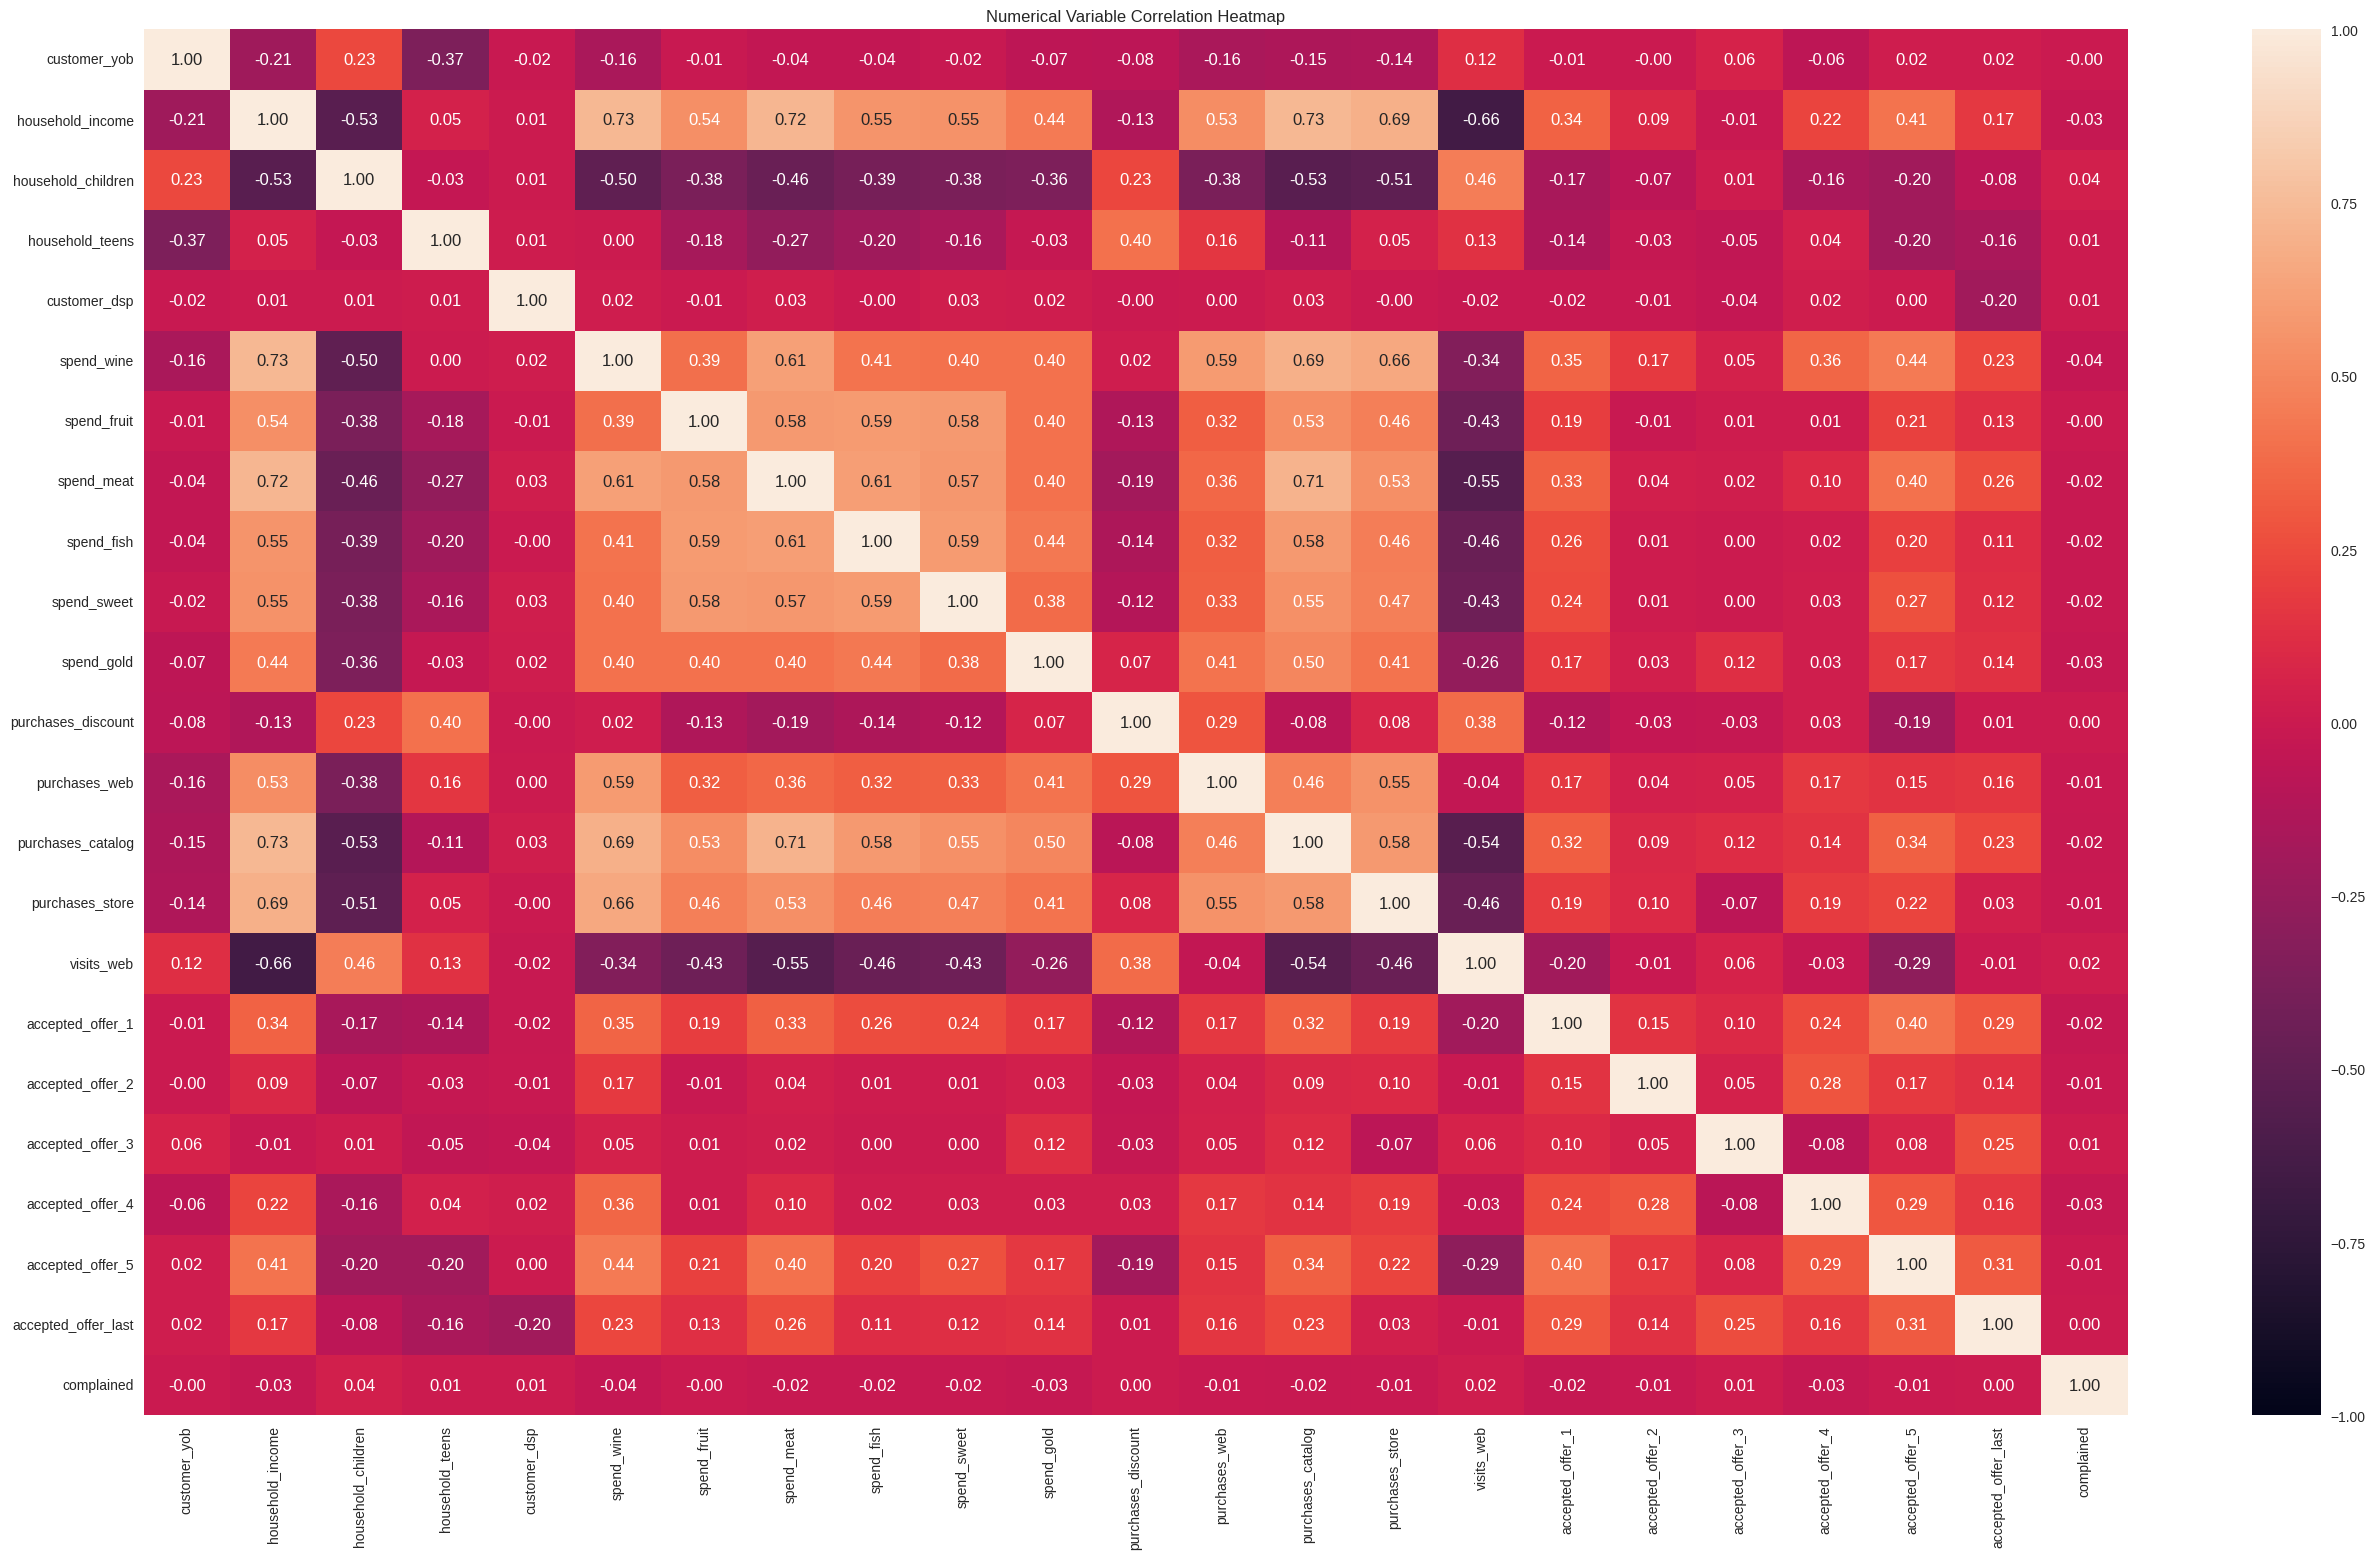

In [ ]:
# Numerical Variable Correlation Heatmap
plt.figure(figsize = (32,18))
corr_matrix = data.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.title('Numerical Variable Correlation Heatmap')
plt.show()

#### **Observation**

### **Numerical by Categorical Variable Correlation**

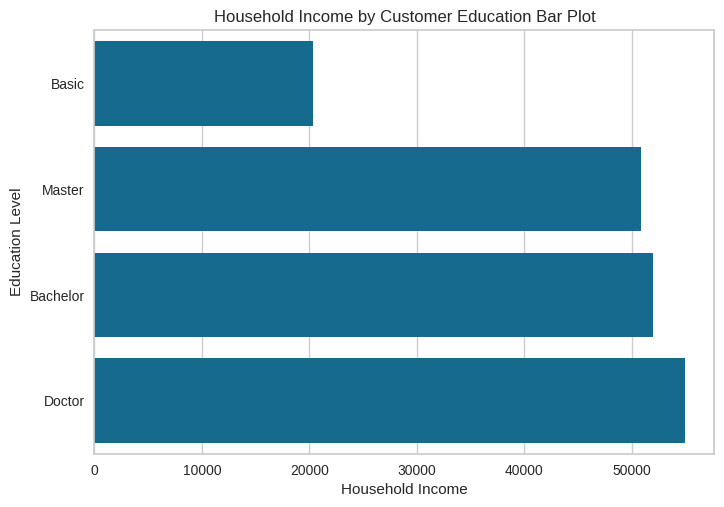

In [ ]:
# Household Income by Customer Education Bar Plot
sns.barplot(data=data, x='household_income', y='customer_edu', order=data.groupby('customer_edu')['household_income'].mean().sort_values().index, ci=None)
plt.title('Household Income by Customer Education Bar Plot')
plt.xlabel('Household Income')
plt.ylabel('Education Level')
plt.show()

#### **Observation**
- Household Income is slightly higher for Bechelor than for Master.
- Household Income is not much hiher for Doctor than for Master or Bachelor.

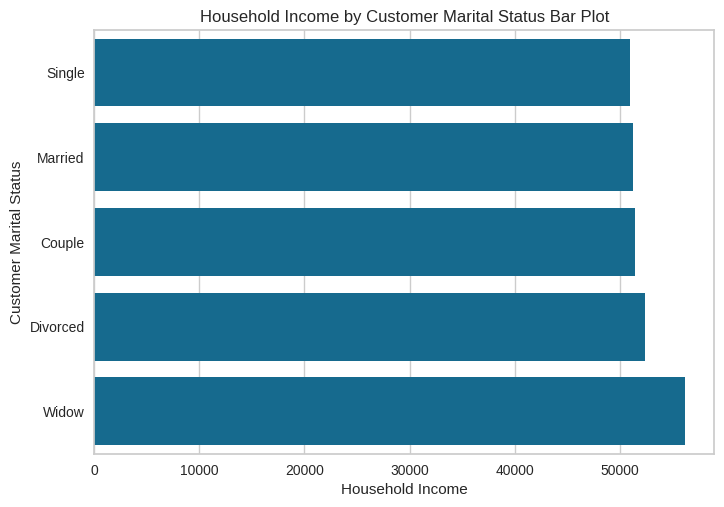

In [ ]:
# Household Income by Customer Marital Status Bar Plot
sns.barplot(data=data, x='household_income', y='customer_marital', order=data.groupby('customer_marital')['household_income'].mean().sort_values().index, ci=None)
plt.title('Household Income by Customer Marital Status Bar Plot')
plt.xlabel('Household Income')
plt.ylabel('Customer Marital Status')
plt.show()

#### **Observation**

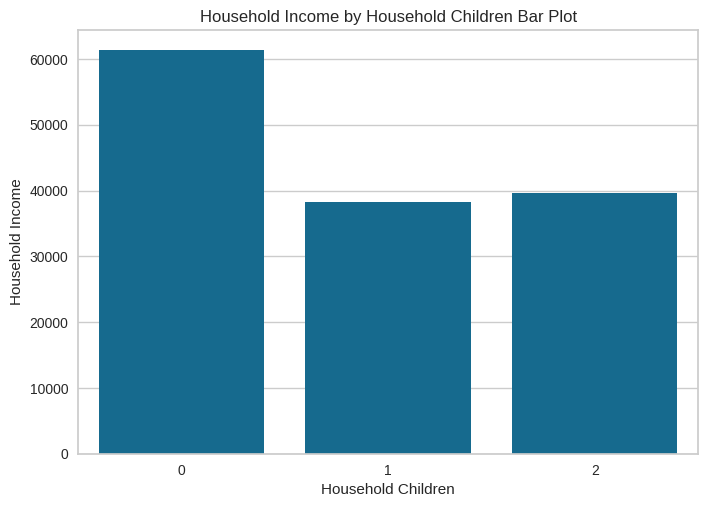

In [ ]:
# Household Income by Household Children Bar Plot
sns.barplot(data=data, x='household_children', y='household_income', ci=None)
plt.title('Household Income by Household Children Bar Plot')
plt.xlabel('Household Children')
plt.ylabel('Household Income')
plt.show()

#### **Observation**

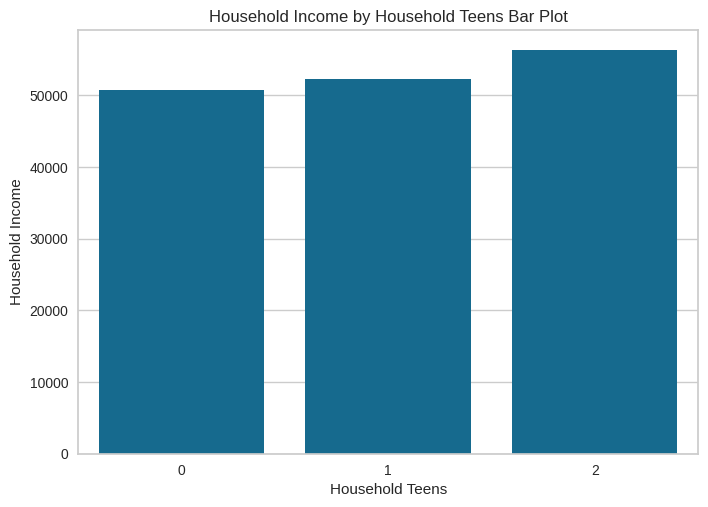

In [ ]:
# Household Income by Household Teens Bar Plot
sns.barplot(data=data, x='household_teens', y='household_income', ci=None)
plt.title('Household Income by Household Teens Bar Plot')
plt.xlabel('Household Teens')
plt.ylabel('Household Income')
plt.show()

#### **Observation**

### **Categorical by Categorical Variable Correlation**

### **Household Children by Customer Marital Status Bar Plot**

In [ ]:
# Household Children by Customer Marital Status Bar Plot
pd.crosstab(data['customer_marital'], data['household_children']).plot(kind='bar', stacked=False)
plt.title('Household Children by Customer Marital Status Bar Plot')
plt.legend(title='Household Children')
plt.xlabel('Customer Marital Status')
plt.ylabel('Count')
plt.show()

#### **Observation**

### **Household Teens by Customer Marital Status Bar Plot**

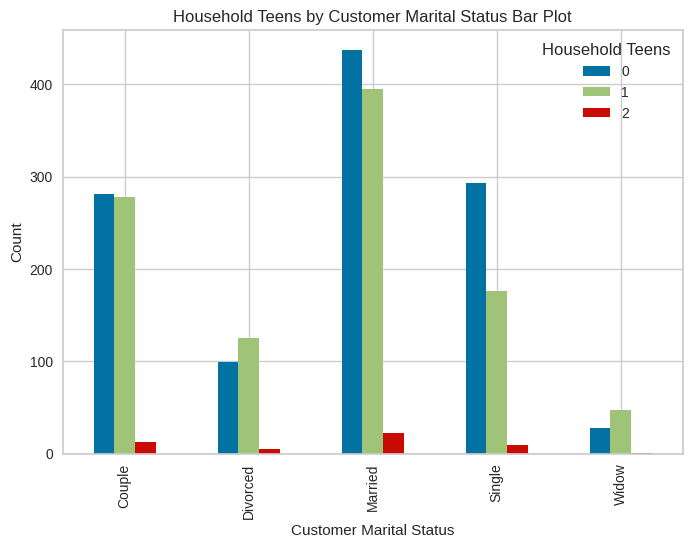

In [ ]:
# Household Teens by Customer Marital Status Bar Plot
pd.crosstab(data['customer_marital'], data['household_teens']).plot(kind='bar', stacked=False)
plt.title('Household Teens by Customer Marital Status Bar Plot')
plt.legend(title='Household Teens')
plt.xlabel('Customer Marital Status')
plt.ylabel('Count')
plt.show()

#### **Observation**

## **Feature Engineering + Data Analysis**

Create new features for analysis.

### **Create Data Features**

In [ ]:
# Create Dataframe for Engineered Features
data_features = data.copy()
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_yob         2209 non-null   int64 
 1   customer_edu         2209 non-null   object
 2   customer_marital     2209 non-null   object
 3   household_income     2209 non-null   int64 
 4   household_children   2209 non-null   int64 
 5   household_teens      2209 non-null   int64 
 6   customer_doe         2209 non-null   object
 7   customer_dsp         2209 non-null   int64 
 8   spend_wine           2209 non-null   int64 
 9   spend_fruit          2209 non-null   int64 
 10  spend_meat           2209 non-null   int64 
 11  spend_fish           2209 non-null   int64 
 12  spend_sweet          2209 non-null   int64 
 13  spend_gold           2209 non-null   int64 
 14  purchases_discount   2209 non-null   int64 
 15  purchases_web        2209 non-null   int64 
 16  purcha

#### **Observation**
- Created dataframe for engineered feeatures.
- Data Features has 2225 rows (0 to 2224) and 26 (0 to 25) columns.

### **Customer Age**

In [ ]:
# Create Customer Age Variable
# Customer Age = 2016 - Customer Year of Birth
data_features["customer_age"] = 2016 - data_features["customer_yob"]
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_yob         2209 non-null   int64 
 1   customer_edu         2209 non-null   object
 2   customer_marital     2209 non-null   object
 3   household_income     2209 non-null   int64 
 4   household_children   2209 non-null   int64 
 5   household_teens      2209 non-null   int64 
 6   customer_doe         2209 non-null   object
 7   customer_dsp         2209 non-null   int64 
 8   spend_wine           2209 non-null   int64 
 9   spend_fruit          2209 non-null   int64 
 10  spend_meat           2209 non-null   int64 
 11  spend_fish           2209 non-null   int64 
 12  spend_sweet          2209 non-null   int64 
 13  spend_gold           2209 non-null   int64 
 14  purchases_discount   2209 non-null   int64 
 15  purchases_web        2209 non-null   int64 
 16  purcha

#### **Observation**
- Created Customer Age variable.
- Data Features has 2225 rows (0 to 2224) and 27 (0 to 26) columns.

In [ ]:
# Customer Age Histogram
# plt.figure(figsize = (16,9))
sns.histplot(data=data_features, x='customer_age', kde=True)
plt.title('Customer Age Histogram')
plt.xlabel('Customer Age')
plt.ylabel('Count')
plt.show()

In [ ]:
# Customer Age Box Plot
# plt.figure(figsize = (16,9))
sns.boxplot(data=data_features, x='customer_age', showmeans=True)
plt.title('Customer Age Box Plot')
plt.xlabel('Customer Age')
plt.ylabel('Values')
plt.show()

#### **Observation**
- Customer Age variable has nearly normal distribution.
- Customer Age variable has no outliers.

### **Household Adults**

In [ ]:
# Create Household Adults Variable
# Household Adults is 1 for Customer Marital Status values Single + Divorced + Widow or 2 for Customer Marital Status values Couple + Married
data_features['household_adults'] = data_features['customer_marital'].map({'Single': 1, 'Divorced': 1, 'Widow': 1, 'Couple': 2, 'Married': 2})
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_yob         2209 non-null   int64 
 1   customer_edu         2209 non-null   object
 2   customer_marital     2209 non-null   object
 3   household_income     2209 non-null   int64 
 4   household_children   2209 non-null   int64 
 5   household_teens      2209 non-null   int64 
 6   customer_doe         2209 non-null   object
 7   customer_dsp         2209 non-null   int64 
 8   spend_wine           2209 non-null   int64 
 9   spend_fruit          2209 non-null   int64 
 10  spend_meat           2209 non-null   int64 
 11  spend_fish           2209 non-null   int64 
 12  spend_sweet          2209 non-null   int64 
 13  spend_gold           2209 non-null   int64 
 14  purchases_discount   2209 non-null   int64 
 15  purchases_web        2209 non-null   int64 
 16  purcha

#### **Observation**
- Created Household Adults variable.
- Data Features has 2225 rows (0 to 2224) and 28 (0 to 27) columns.

In [ ]:
# Check Customer Marital Status Values
data_features['customer_marital'].value_counts().sort_index()

customer_marital
Couple      572
Divorced    229
Married     854
Single      478
Widow        76
Name: count, dtype: int64

In [ ]:
# Check Household Adult Values
data_features['household_adults'].value_counts().sort_index()

household_adults
1     783
2    1426
Name: count, dtype: int64

In [ ]:
data_features['household_adults'].describe().T

count    2209.000000
mean        1.645541
std         0.478457
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: household_adults, dtype: float64

#### **Observation**
- Household Adults value counts are correct.
- Household Adults minimum value is 1.
- Household Adults maximum value is 2.

### **Household Dependents**
Total of Household Children and Household Teens.

In [ ]:
# Create Household Dependents Variable
# Household Dependents = Household Children + Household Teens
data_features["household_dependents"] = data_features["household_children"] + data_features["household_teens"]
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_yob          2209 non-null   int64 
 1   customer_edu          2209 non-null   object
 2   customer_marital      2209 non-null   object
 3   household_income      2209 non-null   int64 
 4   household_children    2209 non-null   int64 
 5   household_teens       2209 non-null   int64 
 6   customer_doe          2209 non-null   object
 7   customer_dsp          2209 non-null   int64 
 8   spend_wine            2209 non-null   int64 
 9   spend_fruit           2209 non-null   int64 
 10  spend_meat            2209 non-null   int64 
 11  spend_fish            2209 non-null   int64 
 12  spend_sweet           2209 non-null   int64 
 13  spend_gold            2209 non-null   int64 
 14  purchases_discount    2209 non-null   int64 
 15  purchases_web         2209 non-null   

#### **Observation**
- Created Household Dependents variable.
- Data Features has 2225 rows (0 to 2224) and 29 (0 to 28) columns.

In [ ]:
data_features['household_dependents'].describe().T

count    2209.000000
mean        0.954731
std         0.752253
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: household_dependents, dtype: float64

#### **Observation**
- Household Dependents minimum value is 1.
- Household Dependents maximum value is 3.

### **Household Members**
Total of Household Adults and Household Dependents.

In [ ]:
# Create Household Members Variable
# Household Members = Household Adults + Household Dependents
data_features["household_members"] = data_features["household_adults"] + data_features["household_dependents"]
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_yob          2209 non-null   int64 
 1   customer_edu          2209 non-null   object
 2   customer_marital      2209 non-null   object
 3   household_income      2209 non-null   int64 
 4   household_children    2209 non-null   int64 
 5   household_teens       2209 non-null   int64 
 6   customer_doe          2209 non-null   object
 7   customer_dsp          2209 non-null   int64 
 8   spend_wine            2209 non-null   int64 
 9   spend_fruit           2209 non-null   int64 
 10  spend_meat            2209 non-null   int64 
 11  spend_fish            2209 non-null   int64 
 12  spend_sweet           2209 non-null   int64 
 13  spend_gold            2209 non-null   int64 
 14  purchases_discount    2209 non-null   int64 
 15  purchases_web         2209 non-null   

#### **Observation**
- Created Household Members variable.
- Data Features has 2225 rows (0 to 2224) and 30 (0 to 29) columns.

In [ ]:
data_features['household_members'].describe().T

count    2209.000000
mean        2.600272
std         0.907407
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: household_members, dtype: float64

#### **Observation**
- Household Members minimum value is 1.
- Household Members maximum value is 5.

### **Customer Enrollment Days**

In [ ]:
# Convert Customer Date of Enrollment to DateTime Data Type
data_features['customer_doe'] = pd.to_datetime(data_features['customer_doe'])
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customer_yob          2209 non-null   int64         
 1   customer_edu          2209 non-null   object        
 2   customer_marital      2209 non-null   object        
 3   household_income      2209 non-null   int64         
 4   household_children    2209 non-null   int64         
 5   household_teens       2209 non-null   int64         
 6   customer_doe          2209 non-null   datetime64[ns]
 7   customer_dsp          2209 non-null   int64         
 8   spend_wine            2209 non-null   int64         
 9   spend_fruit           2209 non-null   int64         
 10  spend_meat            2209 non-null   int64         
 11  spend_fish            2209 non-null   int64         
 12  spend_sweet           2209 non-null   int64         
 13  spend_gold        

#### **Observation**
- Customer Date of Enrollment is not DateTime data type.

In [ ]:
data_features['customer_doe'].describe().T

count                             2209
mean     2013-07-12 03:45:33.001358080
min                2012-01-08 00:00:00
25%                2013-01-19 00:00:00
50%                2013-07-11 00:00:00
75%                2013-12-31 00:00:00
max                2014-12-06 00:00:00
Name: customer_doe, dtype: object

#### **Observation**
- Customer Date of Enrollment minium is Jan 8, 2012.
- Customer Date of Enrollment maximum is Dec 6, 2014.
- We will use Jan 1, 2015 as reference date to calculate Customer Enrollment Days.

In [ ]:
# Create Customer Enrollment Days Variable
# Days since Customer Date of Enrollment
data_features["customer_enrollment_days"] = (pd.to_datetime('2015-01-01') - data_features["customer_doe"]).dt.days
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_yob              2209 non-null   int64         
 1   customer_edu              2209 non-null   object        
 2   customer_marital          2209 non-null   object        
 3   household_income          2209 non-null   int64         
 4   household_children        2209 non-null   int64         
 5   household_teens           2209 non-null   int64         
 6   customer_doe              2209 non-null   datetime64[ns]
 7   customer_dsp              2209 non-null   int64         
 8   spend_wine                2209 non-null   int64         
 9   spend_fruit               2209 non-null   int64         
 10  spend_meat                2209 non-null   int64         
 11  spend_fish                2209 non-null   int64         
 12  spend_sweet         

#### **Observation**
- Created Customer Enrollment Days variable.
- Data Features has 2225 rows (0 to 2224) and 31 (0 to 30) columns.

In [ ]:
data_features['customer_enrollment_days'].describe().T

count    2209.000000
mean      537.843368
std       232.650271
min        26.000000
25%       366.000000
50%       539.000000
75%       712.000000
max      1089.000000
Name: customer_enrollment_days, dtype: float64

#### **Observation**
- Customer Enrollment Days minium is 26
- Customer Enrollment Days maximum is 1089.

### **Total Spend**

In [ ]:
# Create Total Spend Variable
# Sum of Spend for all product types
data_features["total_spend"] = data_features["spend_wine"] + data_features["spend_fruit"] + data_features["spend_meat"] + data_features["spend_fish"] + data_features["spend_sweet"] + data_features["spend_gold"]
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_yob              2209 non-null   int64         
 1   customer_edu              2209 non-null   object        
 2   customer_marital          2209 non-null   object        
 3   household_income          2209 non-null   int64         
 4   household_children        2209 non-null   int64         
 5   household_teens           2209 non-null   int64         
 6   customer_doe              2209 non-null   datetime64[ns]
 7   customer_dsp              2209 non-null   int64         
 8   spend_wine                2209 non-null   int64         
 9   spend_fruit               2209 non-null   int64         
 10  spend_meat                2209 non-null   int64         
 11  spend_fish                2209 non-null   int64         
 12  spend_sweet         

#### **Observation**
- Created Total Spend variable.
- Data Features has 2225 rows (0 to 2224) and 32 (0 to 31) columns.

In [ ]:
data_features['total_spend'].describe().T

count    2209.000000
mean      599.178361
std       596.305680
min         5.000000
25%        68.000000
50%       393.000000
75%      1034.000000
max      2525.000000
Name: total_spend, dtype: float64

#### **Observation**
- Total Spend minium is 5 (USD).
- Total Spend maximum is 2525 (USD).

### **Total Purchases**

In [ ]:
# Create Total Purchases Variable
# Sum of Purchases for all buy methods
data_features["total_purchases"] = data_features["purchases_catalog"] + data_features["purchases_store"] + data_features["purchases_web"]
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_yob              2209 non-null   int64         
 1   customer_edu              2209 non-null   object        
 2   customer_marital          2209 non-null   object        
 3   household_income          2209 non-null   int64         
 4   household_children        2209 non-null   int64         
 5   household_teens           2209 non-null   int64         
 6   customer_doe              2209 non-null   datetime64[ns]
 7   customer_dsp              2209 non-null   int64         
 8   spend_wine                2209 non-null   int64         
 9   spend_fruit               2209 non-null   int64         
 10  spend_meat                2209 non-null   int64         
 11  spend_fish                2209 non-null   int64         
 12  spend_sweet         

#### **Observation**
- Created Total Purchases variable.
- Data has 2225 rows (0 to 2224) and 33 (0 to 32) columns.

In [ ]:
data_features['total_purchases'].describe().T

count    2209.000000
mean       12.500226
std         7.160626
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        32.000000
Name: total_purchases, dtype: float64

#### **Observation**
- Total Purchases minium is 0.
- Total Purchases maximum is 32.
- Total Purchaes 0 values are invalid.

In [ ]:
data_features[data_features['total_purchases'] == 0]


customer_yob customer_edu customer_marital  household_income  \
968           1965     Bachelor         Divorced              4861   
1232          1971     Bachelor         Divorced              1730   
1508          1973     Bachelor           Single              3502   
1826          1963       Doctor          Married              4023   

      household_children  household_teens customer_doe  customer_dsp  \
968                    0                0   2014-06-22            20   
1232                   0                0   2014-05-18            65   
1508                   1                0   2013-04-13            56   
1826                   1                1   2014-06-23            29   

      spend_wine  spend_fruit  ...  accepted_offer_5  accepted_offer_last  \
968            2            1  ...                 0                    0   
1232           1            1  ...                 0                    0   
1508           2            1  ...                 0                    0   
1826           5            0  ...                 0                    0   

      complained  customer_age  household_adults  household_dependents  \
968            0            51                 1                     0   
1232           0            45                 1                     0   
1508           0            43                 1                     1   
1826           0            53                 2                     2   

      household_members  customer_enrollment_days  total_spend  \
968                   1                       193            6   
1232                  1                       228            8   
1508                  2                       628            5   
1826                  4                       192            9   

      total_purchases  
968                 0  
1232                0  
1508                0  
1826                0  

[4 rows x 33 columns]

#### **Observation**
- Total Purchases has 4 entries with 0 values.
- Total Purchases 0 values will be removed before calculating Average Spend.

In [ ]:
# Drop Total Purchases 0 Values
data_features.drop(data[data_features.total_purchases == 0].index, inplace=True)
data_features.reset_index(drop=True, inplace=True)
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_yob              2205 non-null   int64         
 1   customer_edu              2205 non-null   object        
 2   customer_marital          2205 non-null   object        
 3   household_income          2205 non-null   int64         
 4   household_children        2205 non-null   int64         
 5   household_teens           2205 non-null   int64         
 6   customer_doe              2205 non-null   datetime64[ns]
 7   customer_dsp              2205 non-null   int64         
 8   spend_wine                2205 non-null   int64         
 9   spend_fruit               2205 non-null   int64         
 10  spend_meat                2205 non-null   int64         
 11  spend_fish                2205 non-null   int64         
 12  spend_sweet         

#### **Observation**
- Removed 4 Total Purchases 0 values.
- Data has 2205 rows (0 to 2204) and 33 (0 to 32) columns.

### **Average Spend**

In [ ]:
# Create Average Spend Variable
# Total Spend / Total Purchases
data_features['average_spend'] = data_features['total_spend'] / data_features['total_purchases']
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_yob              2205 non-null   int64         
 1   customer_edu              2205 non-null   object        
 2   customer_marital          2205 non-null   object        
 3   household_income          2205 non-null   int64         
 4   household_children        2205 non-null   int64         
 5   household_teens           2205 non-null   int64         
 6   customer_doe              2205 non-null   datetime64[ns]
 7   customer_dsp              2205 non-null   int64         
 8   spend_wine                2205 non-null   int64         
 9   spend_fruit               2205 non-null   int64         
 10  spend_meat                2205 non-null   int64         
 11  spend_fish                2205 non-null   int64         
 12  spend_sweet         

#### **Observation**
- Created Average Spend variable.
- Data has 2221 rows (0 to 2220) and 34 (0 to 33) columns.

In [ ]:
data_features['average_spend'].describe().T

count    2205.000000
mean       37.025122
std        29.452853
min         2.666667
25%        13.000000
50%        29.600000
75%        48.400000
max       187.666667
Name: average_spend, dtype: float64

#### **Observation**
- Average Spend minimum is 2.67 (USD).
- Average Spend maximum is 1679.00 (USD).

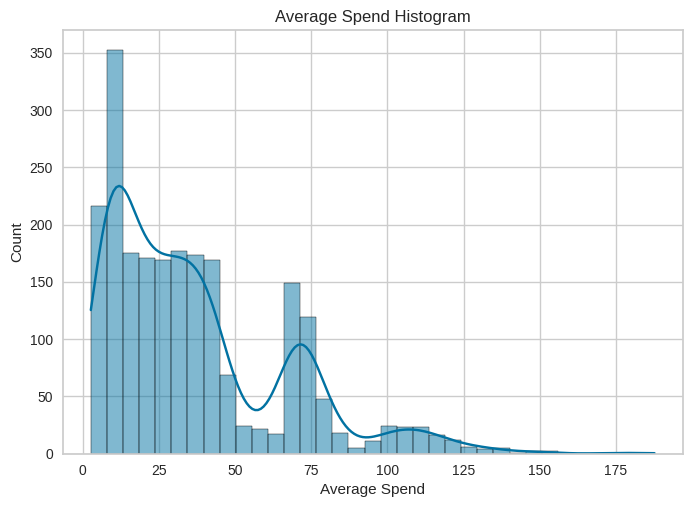

In [ ]:
# Average Spend Histogram
# plt.figure(figsize = (16,9))
sns.histplot(data=data_features, x='average_spend', kde=True)
plt.title('Average Spend Histogram')
plt.xlabel('Average Spend')
plt.ylabel('Count')
plt.show()

In [ ]:
# Average Spend Box Plot
# plt.figure(figsize = (16,9))
sns.boxplot(data=data_features, x='average_spend', showmeans=True)
plt.title('Average Spend Box Plot')
plt.xlabel('Average Spend')
plt.ylabel('Values')
plt.show()

#### **Observation**
- Average Spend has outliers.
- Average Spend outliers will be removed.

In [ ]:
# Calculate Average Spend Upper Whisker
average_spend_uw = data_features['average_spend'].quantile(0.75) + 1.5 * (data_features['average_spend'].quantile(0.75) - data_features['average_spend'].quantile(0.25))
print(average_spend_uw)

101.5


In [ ]:
# Average Spend Outlier Rows
data_features[data_features['average_spend'] > average_spend_uw]

customer_yob customer_edu customer_marital  household_income  \
67            1970     Bachelor           Couple             74854   
74            1972       Master          Married             75251   
109           1991       Doctor           Single             68126   
114           1970     Bachelor          Married             90765   
124           1984     Bachelor           Single             79607   
...            ...          ...              ...               ...   
2098          1986       Doctor          Married             82333   
2102          1976       Master           Single             72309   
2120          1972     Bachelor          Married             69209   
2144          1975       Doctor          Married             79174   
2145          1967       Master         Divorced             81380   

      household_children  household_teens customer_doe  customer_dsp  \
67                     1                2   2013-08-04            90   
74                     0                0   2012-08-27            34   
109                    0                0   2012-10-11            40   
114                    0                0   2014-01-24            25   
124                    0                0   2013-04-21            37   
...                  ...              ...          ...           ...   
2098                   0                0   2013-03-30            60   
2102                   0                0   2013-11-03            64   
2120                   0                0   2012-09-17             4   
2144                   0                0   2013-11-01             2   
2145                   0                0   2012-12-22            51   

      spend_wine  spend_fruit  ...  accepted_offer_last  complained  \
67           856           59  ...                    0           0   
74           721          111  ...                    1           0   
109         1332           17  ...                    1           0   
114          547           99  ...                    0           0   
124          450          133  ...                    1           0   
...          ...          ...  ...                  ...         ...   
2098        1311            0  ...                    1           0   
2102         960            0  ...                    1           0   
2120         496           32  ...                    0           0   
2144        1074           37  ...                    1           0   
2145         741           68  ...                    0           0   

      customer_age  household_adults  household_dependents  household_members  \
67              46                 2                     3                  5   
74              44                 2                     0                  2   
109             25                 1                     0                  1   
114             46                 2                     0                  2   
124             32                 1                     0                  1   
...            ...               ...                   ...                ...   
2098            30                 2                     0                  2   
2102            40                 1                     0                  1   
2120            44                 2                     0                  2   
2144            41                 2                     0                  2   
2145            49                 1                     0                  1   

      customer_enrollment_days  total_spend  total_purchases  average_spend  
67                         515         1562               12     130.166667  
74                         857         1890               18     105.000000  
109                        812         1820               16     113.750000  
114                        342         1724               15     114.933333  
124                        620         1923               15     128.200000  
...   

#### **Observation**
- Average Spend has 104 outliers.
- This is too many entries to remove.
- We will use 99.99 percentile instead.

In [ ]:
# Calculate Average Spend 99.99 Percentile
average_spend_9999 = data_features['average_spend'].quantile(q=0.9999)
print(average_spend_9999)

185.53613333333183


In [ ]:
# Average Spend 99.99 Percentile Rows
data_features[data_features['average_spend'] > average_spend_9999]

customer_yob customer_edu customer_marital  household_income  \
635          1947       Master           Couple             77632   

     household_children  household_teens customer_doe  customer_dsp  \
635                   0                0   2013-10-03            73   

     spend_wine  spend_fruit  ...  accepted_offer_last  complained  \
635        1200          105  ...                    1           0   

     customer_age  household_adults  household_dependents  household_members  \
635            69                 2                     0                  2   

     customer_enrollment_days  total_spend  total_purchases  average_spend  
635                       455         2252               12     187.666667  

[1 rows x 34 columns]

In [ ]:
# Drop Average Spend 99.99 Percentile
# data_features.drop(data_features[data_features['average_spend'] > average_spend_9999].index, inplace=True)
# data_features.reset_index(drop=True, inplace=True)
# data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220 entries, 0 to 2219
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_yob              2220 non-null   int64         
 1   customer_edu              2220 non-null   object        
 2   customer_marital          2220 non-null   object        
 3   household_income          2220 non-null   int64         
 4   household_children        2220 non-null   int64         
 5   household_teens           2220 non-null   int64         
 6   customer_doe              2220 non-null   datetime64[ns]
 7   customer_dsp              2220 non-null   int64         
 8   spend_wine                2220 non-null   int64         
 9   spend_fruit               2220 non-null   int64         
 10  spend_meat                2220 non-null   int64         
 11  spend_fish                2220 non-null   int64         
 12  spend_sweet         

#### **Observation**
- Removed Average Spend 99.99 percentile values.
- Data has 2220 rows (0 to 2219) and 34 (0 to 33) columns.

In [ ]:
data_features['average_spend'].describe().T

count    2205.000000
mean       37.025122
std        29.452853
min         2.666667
25%        13.000000
50%        29.600000
75%        48.400000
max       187.666667
Name: average_spend, dtype: float64

#### **Observation**
- Average Spend minimum is 2.67 (USD).
- Average Spend maximum is 187.67 (USD).

### **Accepted Offer Total**

In [ ]:
# Create Accepted Offer Total Variable
# Sum of all Accepted Offers
data_features["accepted_offer_total"] = data_features["accepted_offer_1"] + data_features["accepted_offer_2"] + data_features["accepted_offer_3"] + data_features["accepted_offer_4"] + data_features["accepted_offer_5"]
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_yob              2205 non-null   int64         
 1   customer_edu              2205 non-null   object        
 2   customer_marital          2205 non-null   object        
 3   household_income          2205 non-null   int64         
 4   household_children        2205 non-null   int64         
 5   household_teens           2205 non-null   int64         
 6   customer_doe              2205 non-null   datetime64[ns]
 7   customer_dsp              2205 non-null   int64         
 8   spend_wine                2205 non-null   int64         
 9   spend_fruit               2205 non-null   int64         
 10  spend_meat                2205 non-null   int64         
 11  spend_fish                2205 non-null   int64         
 12  spend_sweet         

#### **Observation**
- Created Accepted Offer Total Variable
- Data has 2205 rows (0 to 2204) and 35 (0 to 34) columns.

In [ ]:
data_features['accepted_offer_total'].describe().T

count    2205.000000
mean        0.289342
std         0.659772
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: accepted_offer_total, dtype: float64

#### **Observation**
- Accepted Offer minimum is 0.
- Accepted Offer maximum is 4.

### **Household Income by Total Spend Scatter Plot**

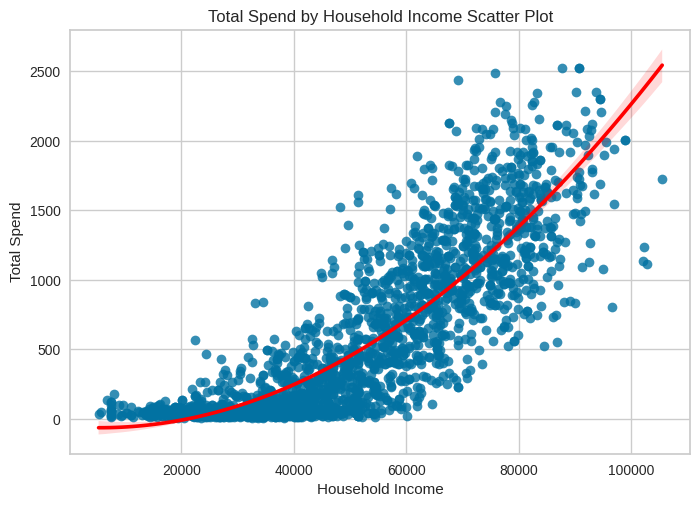

In [ ]:
# Total Spend by Household Income Scatter Plot
# plt.figure(figsize = (16,9))
# sns.scatterplot(data=data_features, x='household_income', y='total_spend')
sns.regplot(data=data_features, x='household_income', y='total_spend', order=2, line_kws={'color': 'red'})
plt.title('Total Spend by Household Income Scatter Plot')
plt.xlabel('Household Income')
plt.ylabel('Total Spend')
plt.show()

#### **Observation**

### **Household Members to Household Income Bar Plot**

In [ ]:
# Household Income by Household Members Bar Plot
# plt.figure(figsize = (16,9))
sns.barplot(x='household_members', y='household_income', data=data_features, ci=None)
plt.title('Household Income by Household Members Bar Plot')
plt.xlabel('Household Members')
plt.ylabel('Household Income')
plt.show()

#### **Observation**

## **Exploratory Data Analysis (EDA) + Data Preprocessing Insight**

Important observations from EDA, Data Preprocessing and Feature Engineering.

## **Segmentation Prep**

### **Segmentation Variables**

The decision of which variables to use for clustering has a critical impact on the results. Generally, only a few behavior variables are used for segmentation (segmentation attributes), and a combination of demographic and behavioral variables are used for profiling (profiling attributes). For example, we will use behavior variable such as Spend and Purchases for segmentation, then include demographic variables such as Age and Household Income for profiling. After careful considerationg taking into account domain knowledge we removed demographic variables from the dataset for segmentation.

Variable removed for segmentation:

customer_yob

customer_edu

customer_marital

household_income

household_children

household_teens

customer_doe

accepted_offer_1

accepted_offer_2

accepted_offer_3

accepted_offer_4

accepted_offer_5

accepted_offer_last

complained

customer_age

household_adults

household_dependents

household_members

### **Create Data Segment**

In [ ]:
# Create Dataframe for Segmentation
data_segment = data_features.copy()
data_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_yob              2205 non-null   int64         
 1   customer_edu              2205 non-null   object        
 2   customer_marital          2205 non-null   object        
 3   household_income          2205 non-null   int64         
 4   household_children        2205 non-null   int64         
 5   household_teens           2205 non-null   int64         
 6   customer_doe              2205 non-null   datetime64[ns]
 7   customer_dsp              2205 non-null   int64         
 8   spend_wine                2205 non-null   int64         
 9   spend_fruit               2205 non-null   int64         
 10  spend_meat                2205 non-null   int64         
 11  spend_fish                2205 non-null   int64         
 12  spend_sweet         

#### **Observation**
- Created Data Segmentation dataframe.
- Data has 2220 rows (0 to 2219) and 35 (0 to 34) columns.

### **Drop Segmentation Irrelevant Variables**

In [ ]:
# Drop Segmentation Irrelevant Variables
data_segment.drop('customer_yob', axis=1, inplace=True)
data_segment.drop('customer_edu', axis=1, inplace=True)
data_segment.drop('customer_marital', axis=1, inplace=True)
data_segment.drop('household_income', axis=1, inplace=True)
data_segment.drop('household_children', axis=1, inplace=True)
data_segment.drop('household_teens', axis=1, inplace=True)
data_segment.drop('customer_doe', axis=1, inplace=True)
data_segment.drop('accepted_offer_1', axis=1, inplace=True)
data_segment.drop('accepted_offer_2', axis=1, inplace=True)
data_segment.drop('accepted_offer_3', axis=1, inplace=True)
data_segment.drop('accepted_offer_4', axis=1, inplace=True)
data_segment.drop('accepted_offer_5', axis=1, inplace=True)
data_segment.drop('accepted_offer_last', axis=1, inplace=True)
data_segment.drop('complained', axis=1, inplace=True)
data_segment.drop('customer_age', axis=1, inplace=True)
data_segment.drop('household_adults', axis=1, inplace=True)
data_segment.drop('household_dependents', axis=1, inplace=True)
data_segment.drop('household_members', axis=1, inplace=True)
data_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_dsp              2205 non-null   int64  
 1   spend_wine                2205 non-null   int64  
 2   spend_fruit               2205 non-null   int64  
 3   spend_meat                2205 non-null   int64  
 4   spend_fish                2205 non-null   int64  
 5   spend_sweet               2205 non-null   int64  
 6   spend_gold                2205 non-null   int64  
 7   purchases_discount        2205 non-null   int64  
 8   purchases_web             2205 non-null   int64  
 9   purchases_catalog         2205 non-null   int64  
 10  purchases_store           2205 non-null   int64  
 11  visits_web                2205 non-null   int64  
 12  customer_enrollment_days  2205 non-null   int64  
 13  total_spend               2205 non-null   int64  
 14  total_pu

#### **Observation**
- Removed segmentation irrelevant variables.
- Data has 2205 rows (0 to 2204) and 17 (0 to 16) columns.

In [ ]:
# Check Data Segment Head
data_segment.head()

customer_dsp  spend_wine  spend_fruit  spend_meat  spend_fish  spend_sweet  \
0            58         635           88         546         172           88   
1            38          11            1           6           2            1   
2            26         426           49         127         111           21   
3            26          11            4          20          10            3   
4            94         173           43         118          46           27   

   spend_gold  purchases_discount  purchases_web  purchases_catalog  \
0          88                   3              8                 10   
1           6                   2              1                  1   
2          42                   1              8                  2   
3           5                   2              2                  0   
4          15                   5              5                  3   

   purchases_store  visits_web  customer_enrollment_days  total_spend  \
0                4           7                       997         1617   
1                2           5                       151           27   
2               10           4                       498          776   
3                4           6                        91           53   
4                6           5                       347          422   

   total_purchases  average_spend  accepted_offer_total  kmeans_3  
0               22      73.500000                     0         2  
1                4       6.750000                     0         1  
2               20      38.800000                     0         0  
3                6       8.833333                     0         1  
4               14      30.142857                     0         0

### **Numerical Variable Correlation Heatmap**

In [ ]:
# Numerical Variable Correlation Heatmap
plt.figure(figsize = (32,18))
corr_matrix = data_segment.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.title('Numerical Variable Correlation Heatmap')
plt.show()

#### **Observation**

### **Scaling**

Scaling is a statistical technigue used to scale the range of variables. It's important to scale the data before dimensionality reduction so all variable values fall within the same range. This will insure variables with a greater range do not have a disproportionate influence in clustering algorithms which use distance measurement to determine similarity between data points.

**Standard Scaler**
- Subtract mean. Mean = 0
- Divide by standard deviation. Variance = 1
- Common scale preserves relative differences of values.
- Performed independently on each variable.

In [ ]:
# Scale Data Scaled
# Create Standard Scaler Object
scaler = StandardScaler()
# Fit Scaler Object + Transform Data Scaled
data_scaled = scaler.fit_transform(data_segment)
# Convert to Data Scaled
data_scaled = pd.DataFrame(data_scaled, columns=data_segment.columns)
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_dsp              2205 non-null   float64
 1   spend_wine                2205 non-null   float64
 2   spend_fruit               2205 non-null   float64
 3   spend_meat                2205 non-null   float64
 4   spend_fish                2205 non-null   float64
 5   spend_sweet               2205 non-null   float64
 6   spend_gold                2205 non-null   float64
 7   purchases_discount        2205 non-null   float64
 8   purchases_web             2205 non-null   float64
 9   purchases_catalog         2205 non-null   float64
 10  purchases_store           2205 non-null   float64
 11  visits_web                2205 non-null   float64
 12  customer_enrollment_days  2205 non-null   float64
 13  total_spend               2205 non-null   float64
 14  total_pu

In [ ]:
data_scaled.describe().T

count          mean       std       min       25%  \
customer_dsp              2205.0 -1.047285e-17  1.000227 -1.701817 -0.872068   
spend_wine                2205.0 -2.416812e-17  1.000227 -0.915313 -0.842469   
spend_fruit               2205.0 -4.028020e-17  1.000227 -0.662267 -0.612058   
spend_meat                2205.0 -7.572678e-17  1.000227 -0.762704 -0.688334   
spend_fish                2205.0  2.900174e-17  1.000227 -0.690013 -0.635102   
spend_sweet               2205.0  5.719788e-17  1.000227 -0.662279 -0.637814   
spend_gold                2205.0 -1.611208e-17  1.000227 -0.860377 -0.682138   
purchases_discount        2205.0  1.127846e-16  1.000227 -1.257781 -0.713549   
purchases_web             2205.0 -6.283711e-17  1.000227 -1.552768 -0.788941   
purchases_catalog         2205.0  1.933450e-17  1.000227 -0.958124 -0.958124   
purchases_store           2205.0  1.176182e-16  1.000227 -1.805786 -0.877854   
visits_web                2205.0  5.478107e-17  1.000227 -2.272368 -0.991984   
customer_enrollment_days  2205.0 -2.384588e-16  1.000227 -2.203498 -0.740969   
total_spend               2205.0 -1.611208e-18  1.000227 -0.993418 -0.891099   
total_purchases           2205.0  7.894919e-17  1.000227 -1.612575 -0.912849   
average_spend             2205.0 -4.672503e-17  1.000227 -1.166822 -0.815900   
accepted_offer_total      2205.0 -8.056040e-18  1.000227 -0.438648 -0.438648   
kmeans_3                  2205.0  5.316986e-17  1.000227 -1.355118 -1.355118   

                               50%       75%       max  
customer_dsp              0.026827  0.856577  1.720899  
spend_wine               -0.381127  0.614402  3.321755  
spend_fruit              -0.461428  0.166193  4.333600  
spend_meat               -0.451280  0.306362  3.811042  
spend_fish               -0.470371  0.225162  4.050594  
spend_sweet              -0.466558  0.145071  4.181821  
spend_gold               -0.385074  0.248663  4.070889  
purchases_discount       -0.169317  0.374916  6.905702  
purchases_web            -0.025114  0.738712  2.648279  
purchases_catalog        -0.226466  0.505193  3.065997  
purchases_store          -0.259232  0.668701  2.215255  
visits_web                0.288401  0.715196  6.263529  
customer_enrollment_days  0.003199  0.747368  2.369054  
total_spend              -0.344281  0.727548  3.228483  
total_purchases          -0.073178  0.766494  2.725727  
average_spend            -0.252159  0.386294  5.115827  
accepted_offer_total     -0.438648 -0.438648  5.625426  
kmeans_3                  0.033374  0.033374  1.421866

#### **Observation**
- Mean for all variables is now 0 as expected.
- Standard Deviation for all variables is now 1 as expected.

## **t-SNE + PCA**

### **t-SNE**
t-SNE is a Non-Linear dimensionality reduction technique which maps high-dimensional data points to a lower-dimensional space while preserving relative distances and similarities.

In [ ]:
# Apply t-SNE to Data Scaled
# Create t-SNE Object
tsne = TSNE(n_components = 2, random_state = 1, perplexity = 35)
# Fit t-SNE Object + Transform Data Scaled
data_tsne = tsne.fit_transform(data_scaled)
# Convert to Data t-SNE
data_tsne = pd.DataFrame(data_tsne, columns=['tsne1', 'tsne2'])
data_tsne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tsne1   2205 non-null   float32
 1   tsne2   2205 non-null   float32
dtypes: float32(2)
memory usage: 17.4 KB


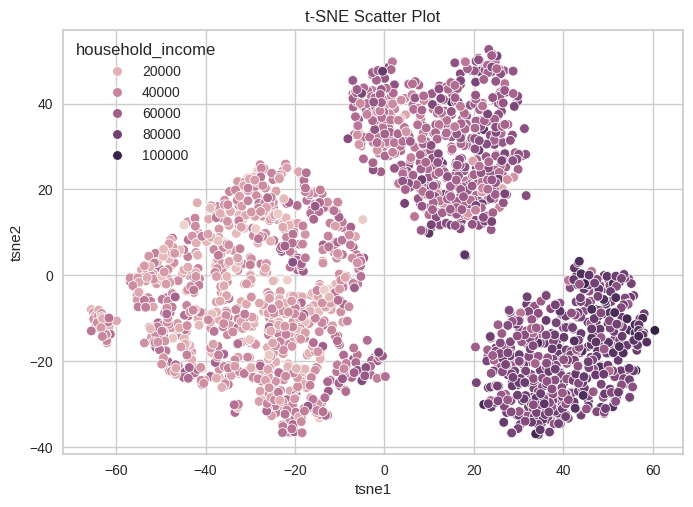

In [ ]:
# t-SNE Scatter Plot
# plt.figure(figsize = (16,9))
# sns.scatterplot(x='tsne1', y='tsne2', data=data_tsne)
# sns.regplot(data=data_tsne, x='tsne1', y='tsne2', order=2, line_kws={'color': 'red'})
sns.scatterplot(data=data_tsne, x='tsne1', y='tsne2', hue=data_features.household_income)
plt.title('t-SNE Scatter Plot')
plt.show()

#### **Observation**

### **PCA**
PCA is a Linear dimensionality reduction technique which uses combinations of variables in the original dataset to create a new dataset with uncorrelated variables (principal components) that capture the greatest variance in the original data.

In [ ]:
# Apply PCA to Data Scaled
# Set n Data Segment Columns
n = data_segment.shape[1]
# Create PCA Object
pca = PCA(n_components = n, random_state = 1)
# Fit PCA Object + Transform Data Scaled
data_pca = pca.fit_transform(data_scaled)
# Convert to Data PCA
data_pca = pd.DataFrame(data_pca, columns = [f'pca{i+1}' for i in range(n)])
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pca1    2205 non-null   float64
 1   pca2    2205 non-null   float64
 2   pca3    2205 non-null   float64
 3   pca4    2205 non-null   float64
 4   pca5    2205 non-null   float64
 5   pca6    2205 non-null   float64
 6   pca7    2205 non-null   float64
 7   pca8    2205 non-null   float64
 8   pca9    2205 non-null   float64
 9   pca10   2205 non-null   float64
 10  pca11   2205 non-null   float64
 11  pca12   2205 non-null   float64
 12  pca13   2205 non-null   float64
 13  pca14   2205 non-null   float64
 14  pca15   2205 non-null   float64
 15  pca16   2205 non-null   float64
 16  pca17   2205 non-null   float64
dtypes: float64(17)
memory usage: 293.0 KB


In [ ]:
data_pca.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0  4.786920  0.429457 -2.502331  1.660861 -0.630631 -0.027537 -0.638453   
1 -2.952119 -1.444281  0.675429 -0.898740 -0.018347  0.496100 -0.282476   
2  1.385945  1.044839  0.066785 -1.789047 -0.405443 -0.689695  0.284390   
3 -2.716844 -1.084214  0.793374 -1.263157 -0.372620  0.435535 -0.581125   
4 -0.437593  1.132152 -0.335116 -0.967219  1.802351  0.278766 -1.092255   

       pca8      pca9     pca10     pca11     pca12     pca13     pca14  \
0  0.206587  0.896426 -1.382994 -0.674735 -0.933683 -0.967092 -0.518004   
1  0.463404  0.001478 -0.147765  0.017656 -0.209349 -0.157259 -0.234631   
2 -1.066661  0.816425  0.039066 -0.553206  1.260929 -0.476250  0.177519   
3  0.205020  0.313537 -0.119768  0.024164  0.115776  0.398655 -0.073927   
4  0.392612 -0.323274  0.314164 -0.416181  0.061393 -0.813902  0.012038   

      pca15     pca16         pca17  
0  0.493810 -0.281218  1.070269e-16  
1  0.065517 -0.231602  1.522473e-16  
2 -0.318985  0.029104  1.759872e-16  
3  0.215461 -0.074944  2.557487e-16  
4  0.270987  0.026254  9.508429e-16

In [ ]:
# Show Explained Variance Ratio for Principal Components
evr = pca.explained_variance_ratio_
print(evr)

[0.45056139 0.12914152 0.06383071 0.06034223 0.05517997 0.03830539
 0.03404219 0.03118212 0.02689778 0.02366661 0.02191142 0.02012146
 0.01570829 0.01418454 0.01233827 0.0025861  0.        ]


### **Visualize Explained Variance Ratio Cumulative Sum by Number of Principal Components**

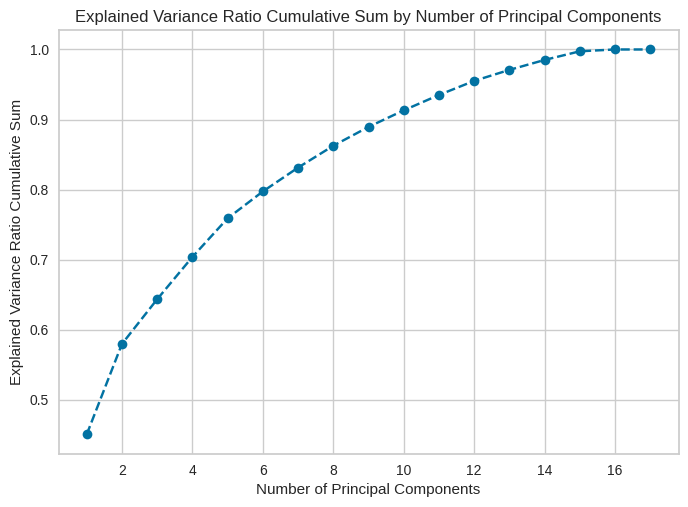

In [ ]:
# Visualize Explained Variance Ratio Cumulative Sum by Number of Principal Components
# plt.figure(figsize = (16,9))
plt.plot(range(1, 18), evr.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variance Ratio Cumulative Sum by Number of Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio Cumulative Sum")
plt.show()

### **Calculate Least Number of Principal Components to Explain 90% of Variance**

In [ ]:
# Calculate Least Number of Principal Components to Explain 90% of Variance
evrcs = 0 # Set Explained Variance Ratio Cumulative Sum to 0
for ix, i in enumerate(evr):
    evrcs = evrcs + i
    if(evrcs>0.90):
        print(f"Least Number of Principal Components to Explain 90% of Variance: {ix + 1} ({evrcs*100:.2f}%)")
        break

Least Number of Principal Components to Explain 90% of Variance: 10 (91.31%)


### **PCA Scatter Plot**

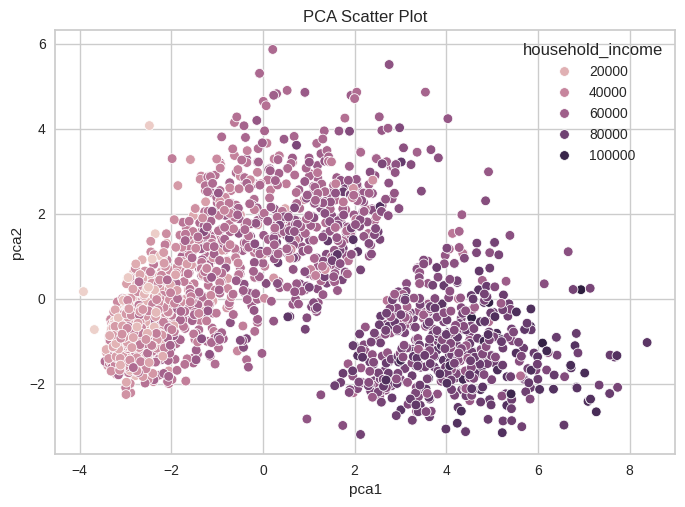

In [ ]:
# PCA Scatter Plot
# plt.figure(figsize = (16,9))
# sns.scatterplot(x='pca1', y='pca2', data=data_pca)
# sns.regplot(data=data_pca, x='pca1', y='pca2', order=2, line_kws={'color': 'red'}, hue=data_features.household_income)
sns.scatterplot(data=data_pca, x='pca1', y='pca2', hue=data_features.household_income)
plt.title('PCA Scatter Plot')
plt.show()

### **Create DataFrame to Display First Three Principal Component Loadings for Scaled Data Features**

In [ ]:
# Create DataFrame to Display First Three Principal Component Loadings for Scaled Data Features
pc_names = ['pc1', 'pc2', 'pc3']
pca_loadings = pd.DataFrame(np.round(pca.components_[:3,:], 2), index = pc_names, columns = data_scaled.columns)
pca_loadings.T

pc1   pc2   pc3
customer_dsp              0.01 -0.01 -0.16
spend_wine                0.29  0.16  0.30
spend_fruit               0.24 -0.12 -0.31
spend_meat                0.30 -0.14 -0.01
spend_fish                0.26 -0.13 -0.30
spend_sweet               0.25 -0.11 -0.28
spend_gold                0.21  0.12 -0.19
purchases_discount       -0.03  0.49 -0.13
purchases_web             0.21  0.40  0.05
purchases_catalog         0.30 -0.00  0.05
purchases_store           0.26  0.19  0.05
visits_web               -0.21  0.31 -0.10
customer_enrollment_days  0.04  0.27 -0.44
total_spend               0.34  0.02  0.08
total_purchases           0.31  0.23  0.06
average_spend             0.31 -0.03  0.06
accepted_offer_total      0.15 -0.03  0.57
kmeans_3                  0.14 -0.48 -0.12

## **K-Means**
1 | Create Dictionary to Store SSE for Range (1 to 9) of K Values

2 | Store SSE for K-Means Fit to Principle Components for Range (1 to 9) of K Values

3 | Plot Elbow Curve Using Range (1 to 9) of K Values to SSE

In [ ]:
# Store SSE for K-Means Fit to Principle Components for K Values Range (2 to 10)
sse = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters = k,random_state = 4).fit(data_pca)
    sse.append(kmeans.inertia_)

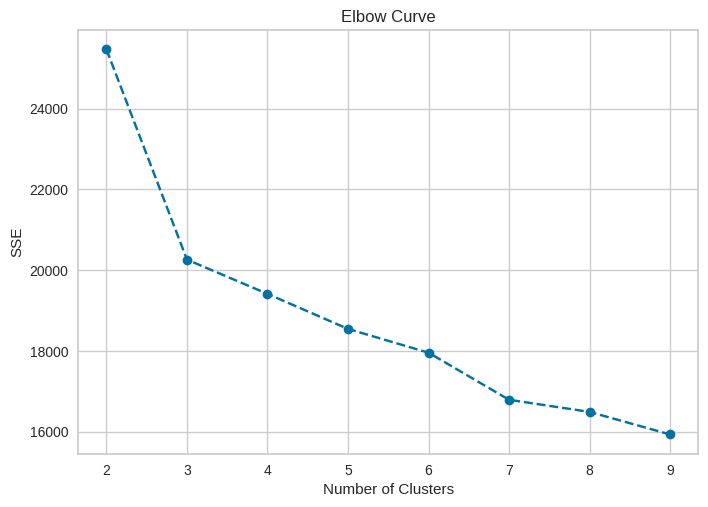

In [ ]:
# Plot Elbow Curve
# plt.figure(figsize = (16,9))
plt.plot(k_range, sse, marker = 'o', linestyle = '--')
plt.title('Elbow Curve')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

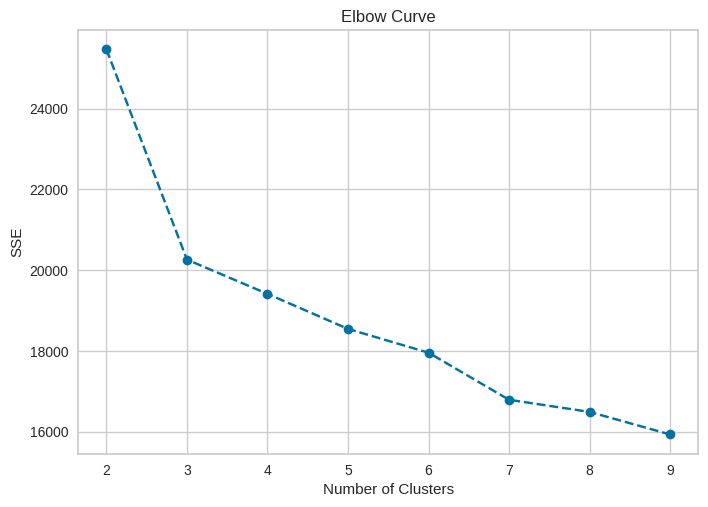

In [ ]:
# 1 | Create Dictionary to Store SSE for K Values Range (2 to 10)
sse = {}

# 2 | Store SSE for K-Means Fit to Principle Components for K Values Range (2 to 10)
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000, random_state = 4).fit(data_pca)
    sse[k] = kmeans.inertia_ # Store Inertia Value for Each K Value

# 3 | Plot Elbow Curve Using Range (2 to 10) of K Values to SSE
# plt.figure(figsize = (16,9))
plt.plot(list(sse.keys()), list(sse.values()), marker = 'o', linestyle = '--')
plt.title('Elbow Curve')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

#### **Observation**
- Elblow at K=3.
- Elblow at K=5.

### **Silhouette Score**

Silhouette Score is used to evaluate the quality of clusters by measuring the similarity of data points in the same cluster (cohesion) compared to other clusters (separation). Silhouette Scores can range from -1 to 1.

* Silhouette coefficients near +1 indicate that the clusters are dense and well separated, which is good.
* Silhouette score near -1 indicates that those samples might have been assigned to the wrong cluster.

**Finding silhouette score for each value of K**

In [ ]:
sil_score = []                                                             # Creating empty list
cluster_list = range(3, 7)                                                 # Creating a range from 3 to 7
for n_clusters in cluster_list:

    # Initialize K-Means with number of clusters equal to n_clusters and random_state=1
    clusterer = _______________

    # Fit and predict on the pca data
    preds = clusterer._________

    # Calculate silhouette score - Hint: Use silhouette_score() function
    score = ___________

    # Append silhouette score to empty list created above
    __________

    # Print the silhouette score
    print( "For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

In [ ]:
silhouette_scores = []
for k in range(3, 8):
    # Create a K-Means model with the current K
    kmeans = KMeans(n_clusters = k, random_state = 1)
    # Fit the model to the data
    kmeans.fit(data_pca)
    # Predict cluster labels for each data point
    labels = kmeans.labels_
    # Calculate the silhouette score
    silhouette_score_k = silhouette_score(data_pca, labels)
    silhouette_scores.append(silhouette_score_k)
    print(f"K-Means Silhouette Score K = {k} | {silhouette_score_k:.3f}")

K-Means Silhouette Score K = 3 | 0.323
K-Means Silhouette Score K = 4 | 0.309
K-Means Silhouette Score K = 5 | 0.151
K-Means Silhouette Score K = 6 | 0.139
K-Means Silhouette Score K = 7 | 0.138


#### **Observation**
- Silhouette Score for K = 3 is good.
- We will run K-Means with K = 3.

### **K-Means K = 3**

In [ ]:
# Fit K-Means for K = 3 and Random State = 1
kmeans = KMeans(n_clusters = 3, random_state = 1)
kmeans.fit(data_pca)

KMeans(n_clusters=3, random_state=1)

In [ ]:
# Add K-Means Lables to Data PCA
data_pca["kmeans_3"] = kmeans.labels_
data_pca['kmeans_3'].value_counts().sort_index()
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pca1      2205 non-null   float64
 1   pca2      2205 non-null   float64
 2   pca3      2205 non-null   float64
 3   pca4      2205 non-null   float64
 4   pca5      2205 non-null   float64
 5   pca6      2205 non-null   float64
 6   pca7      2205 non-null   float64
 7   pca8      2205 non-null   float64
 8   pca9      2205 non-null   float64
 9   pca10     2205 non-null   float64
 10  pca11     2205 non-null   float64
 11  pca12     2205 non-null   float64
 12  pca13     2205 non-null   float64
 13  pca14     2205 non-null   float64
 14  pca15     2205 non-null   float64
 15  pca16     2205 non-null   float64
 16  pca17     2205 non-null   float64
 17  kmeans_3  2205 non-null   int32  
dtypes: float64(17), int32(1)
memory usage: 301.6 KB


In [ ]:
# Add K-Means Lables to Data PCA
data_segment["kmeans_3"] = kmeans.labels_
data_segment['kmeans_3'].value_counts().sort_index()
data_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_dsp              2205 non-null   int64  
 1   spend_wine                2205 non-null   int64  
 2   spend_fruit               2205 non-null   int64  
 3   spend_meat                2205 non-null   int64  
 4   spend_fish                2205 non-null   int64  
 5   spend_sweet               2205 non-null   int64  
 6   spend_gold                2205 non-null   int64  
 7   purchases_discount        2205 non-null   int64  
 8   purchases_web             2205 non-null   int64  
 9   purchases_catalog         2205 non-null   int64  
 10  purchases_store           2205 non-null   int64  
 11  visits_web                2205 non-null   int64  
 12  customer_enrollment_days  2205 non-null   int64  
 13  total_spend               2205 non-null   int64  
 14  total_pu

In [ ]:
# Add K-Means Lables to Data PCA
data_features["kmeans_3"] = kmeans.labels_
data_features['kmeans_3'].value_counts().sort_index()
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_yob              2205 non-null   int64         
 1   customer_edu              2205 non-null   object        
 2   customer_marital          2205 non-null   object        
 3   household_income          2205 non-null   int64         
 4   household_children        2205 non-null   int64         
 5   household_teens           2205 non-null   int64         
 6   customer_doe              2205 non-null   datetime64[ns]
 7   customer_dsp              2205 non-null   int64         
 8   spend_wine                2205 non-null   int64         
 9   spend_fruit               2205 non-null   int64         
 10  spend_meat                2205 non-null   int64         
 11  spend_fish                2205 non-null   int64         
 12  spend_sweet         

### **PCA Scatter Plot**

In [ ]:
# Function to Visualize PCA Data
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)

In [ ]:
PCA_PLOT(0, 1, data_pca, "K_means_segments_3")

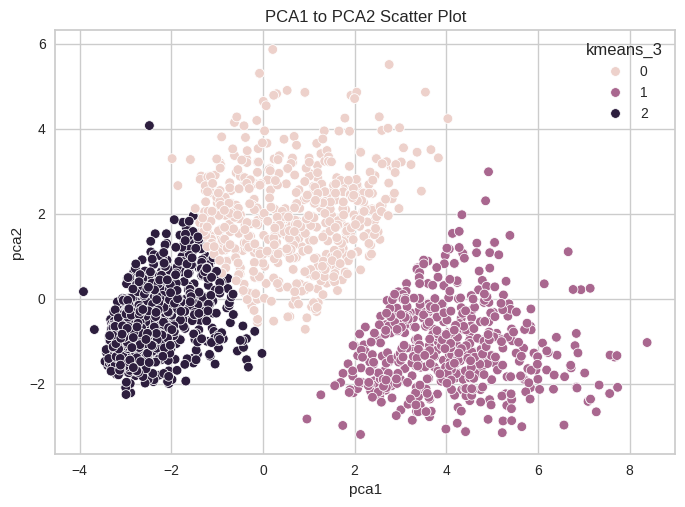

In [ ]:
# sns.scatterplot(x = 0, y = 1, data=data_pca, hue=cluster)
# sns.scatterplot(x = 0, y = 1, data=data_pca)
sns.scatterplot(x='pca1', y='pca2', data=data_pca, hue = data_pca["kmeans_3"])
plt.title('PCA1 to PCA2 Scatter Plot')
plt.show()

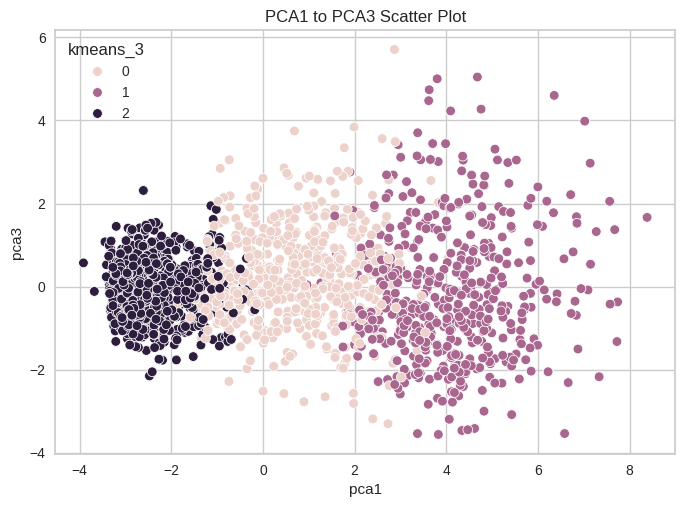

In [ ]:
sns.scatterplot(x='pca1', y='pca3', data=data_pca, hue = data_pca["kmeans_3"])
plt.title('PCA1 to PCA3 Scatter Plot')
plt.show()

#### **Observation**

### **Cluster Profiles**

In [ ]:
# Calculate Mean for each Variable in Data Features for each Cluster
data_features.groupby('kmeans_3')[data_features.select_dtypes(include=['number']).columns].mean().style.highlight_max(axis=0, color='green')

In [ ]:
# Calculate Mean for each Variable in Data Features for each Cluster
data_features.groupby('kmeans_3')[data_features.select_dtypes(include=['number']).columns].mean().style.highlight_min(axis=0, color='red')

**Let us create a boxplot for each of the variables**

In [ ]:
# Columns to use in boxplot
col_for_box = ['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain','Age','Family_Size','Expenses','NumTotalPurchases','Engaged_in_days','TotalAcceptedCmp','AmountPerPurchase']

# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)

    sns.__________(y=data[variable], x=data['K_means_segments_3'],showmeans=True)

    plt.tight_layout()

    plt.title(variable)

plt.show()

#### **Cluster Characteristics**

K-Means 0 Characteristics
- Meadium Household Income
- Preference for web purchase methods.

K-Means 1 Characteristics
- Lower Household Income
- Lower spend on all product types.
- Lower total and average spend.
- Accepted less offers.

K-Means 2 Characteristics
- Higher Household Income
- Higher spend on all product types.
- Higher total and average spend.
- Preference for catalog and store purchase methods.
- Accepted more offers.

### **Remove K-Means Labels for K = 3**

In [ ]:
# Remove Data PCA K-Means Labels for K = 3
data_pca.drop('kmeans_3', axis=1, inplace=True)
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pca1    2205 non-null   float64
 1   pca2    2205 non-null   float64
 2   pca3    2205 non-null   float64
 3   pca4    2205 non-null   float64
 4   pca5    2205 non-null   float64
 5   pca6    2205 non-null   float64
 6   pca7    2205 non-null   float64
 7   pca8    2205 non-null   float64
 8   pca9    2205 non-null   float64
 9   pca10   2205 non-null   float64
 10  pca11   2205 non-null   float64
 11  pca12   2205 non-null   float64
 12  pca13   2205 non-null   float64
 13  pca14   2205 non-null   float64
 14  pca15   2205 non-null   float64
 15  pca16   2205 non-null   float64
 16  pca17   2205 non-null   float64
dtypes: float64(17)
memory usage: 293.0 KB


In [ ]:
# Remove Data Segment K-Means Labels for K = 3
data_segment.drop('kmeans_3', axis=1, inplace=True)
data_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_dsp              2205 non-null   int64  
 1   spend_wine                2205 non-null   int64  
 2   spend_fruit               2205 non-null   int64  
 3   spend_meat                2205 non-null   int64  
 4   spend_fish                2205 non-null   int64  
 5   spend_sweet               2205 non-null   int64  
 6   spend_gold                2205 non-null   int64  
 7   purchases_discount        2205 non-null   int64  
 8   purchases_web             2205 non-null   int64  
 9   purchases_catalog         2205 non-null   int64  
 10  purchases_store           2205 non-null   int64  
 11  visits_web                2205 non-null   int64  
 12  customer_enrollment_days  2205 non-null   int64  
 13  total_spend               2205 non-null   int64  
 14  total_pu

In [ ]:
# Remove Data Features K-Means Labels for K = 3
data_features.drop('kmeans_3', axis=1, inplace=True)
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_yob              2205 non-null   int64         
 1   customer_edu              2205 non-null   object        
 2   customer_marital          2205 non-null   object        
 3   household_income          2205 non-null   int64         
 4   household_children        2205 non-null   int64         
 5   household_teens           2205 non-null   int64         
 6   customer_doe              2205 non-null   datetime64[ns]
 7   customer_dsp              2205 non-null   int64         
 8   spend_wine                2205 non-null   int64         
 9   spend_fruit               2205 non-null   int64         
 10  spend_meat                2205 non-null   int64         
 11  spend_fish                2205 non-null   int64         
 12  spend_sweet         

### **K-Means K = 5**

In [ ]:
# Fit K-Means for K = 5 and Random State = 0
kmeans = KMeans(n_clusters = 5, random_state = 0)
kmeans.fit(data_pca)

KMeans(n_clusters=5, random_state=0)

In [ ]:
# Add K-Means Lables to Data PCA
data_pca["kmeans_5"] = kmeans.labels_
data_pca['kmeans_5'].value_counts().sort_index()
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pca1      2205 non-null   float64
 1   pca2      2205 non-null   float64
 2   pca3      2205 non-null   float64
 3   pca4      2205 non-null   float64
 4   pca5      2205 non-null   float64
 5   pca6      2205 non-null   float64
 6   pca7      2205 non-null   float64
 7   pca8      2205 non-null   float64
 8   pca9      2205 non-null   float64
 9   pca10     2205 non-null   float64
 10  pca11     2205 non-null   float64
 11  pca12     2205 non-null   float64
 12  pca13     2205 non-null   float64
 13  pca14     2205 non-null   float64
 14  pca15     2205 non-null   float64
 15  pca16     2205 non-null   float64
 16  pca17     2205 non-null   float64
 17  kmeans_5  2205 non-null   int32  
dtypes: float64(17), int32(1)
memory usage: 301.6 KB


In [ ]:
# Add K-Means Lables to Data Segment
data_segment["kmeans_5"] = kmeans.labels_
data_segment['kmeans_5'].value_counts().sort_index()
data_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_dsp              2205 non-null   int64  
 1   spend_wine                2205 non-null   int64  
 2   spend_fruit               2205 non-null   int64  
 3   spend_meat                2205 non-null   int64  
 4   spend_fish                2205 non-null   int64  
 5   spend_sweet               2205 non-null   int64  
 6   spend_gold                2205 non-null   int64  
 7   purchases_discount        2205 non-null   int64  
 8   purchases_web             2205 non-null   int64  
 9   purchases_catalog         2205 non-null   int64  
 10  purchases_store           2205 non-null   int64  
 11  visits_web                2205 non-null   int64  
 12  customer_enrollment_days  2205 non-null   int64  
 13  total_spend               2205 non-null   int64  
 14  total_pu

In [ ]:
# Add K-Means Lables to Data Features
data_features["kmeans_5"] = kmeans.labels_
data_features['kmeans_5'].value_counts().sort_index()
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_yob              2205 non-null   int64         
 1   customer_edu              2205 non-null   object        
 2   customer_marital          2205 non-null   object        
 3   household_income          2205 non-null   int64         
 4   household_children        2205 non-null   int64         
 5   household_teens           2205 non-null   int64         
 6   customer_doe              2205 non-null   datetime64[ns]
 7   customer_dsp              2205 non-null   int64         
 8   spend_wine                2205 non-null   int64         
 9   spend_fruit               2205 non-null   int64         
 10  spend_meat                2205 non-null   int64         
 11  spend_fish                2205 non-null   int64         
 12  spend_sweet         

In [ ]:
# Let's check the distribution


### **PCA Scatter Plot**

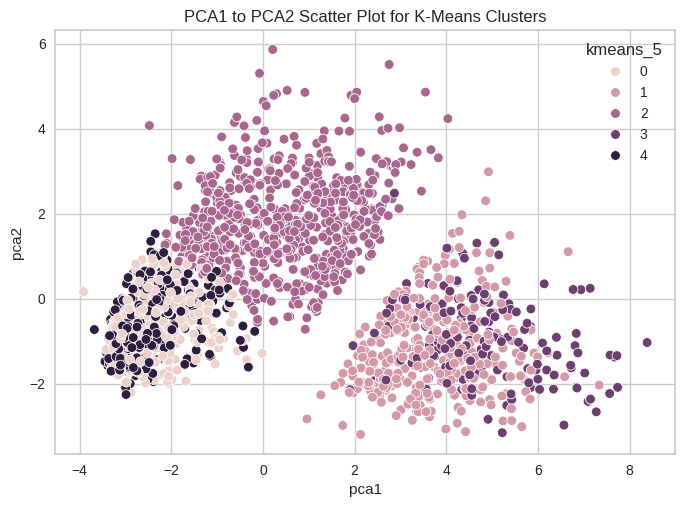

In [ ]:
# Hint: Use PCA_PLOT function created above
# sns.scatterplot(x = 0, y = 1, data=data_pca, hue=cluster)
# sns.scatterplot(x = 0, y = 1, data=data_pca)
sns.scatterplot(x = 'pca1', y = 'pca2', data = data_pca, hue = data_pca["kmeans_5"])
plt.title('PCA1 to PCA2 Scatter Plot for K-Means Clusters')
plt.show()

### **Cluster Profiles**

In [ ]:
# Calculate Mean for each Variable in Data Features for each Cluster
data_features.groupby('kmeans_5')[data_features.select_dtypes(include=['number']).columns].mean().style.highlight_max(axis=0, color='green')

In [ ]:
# Calculate Mean for each Variable in Data Features for each Cluster
data_features.groupby('kmeans_5')[data_features.select_dtypes(include=['number']).columns].mean().style.highlight_min(axis=0, color='red')

**Let's plot the boxplot**

In [ ]:
# Create boxplot for each of the variables

#### **Cluster Characteristics**

K-Means 0 Characteristics
- Meadium Household Income.
- More household teens.
- Purchase discount products.
- Preference for web purchase method.
- Slightly older.

K-Means 1 Characteristics
- Lowest Household Income.
- More household children.
- Lower spend on all product types.
- Lower total and average spend.
- Accepted less offers.

K-Means 2 Characteristics
- Lower Household Income
- Higher spend on all product types.
- Higher total and average spend.
- Preference for catalog and store purchase methods.
- Accepted more offers.

K-Means 3 Characteristics
- Highest Household Income

K-Means 4 Characteristics
- Higher Household Income

From the above profiles, K=5 provides more interesting insights about customer's purchasing behavior and preferred channels for purchasing products. We can also see that the High, Medium and Low income groups have different age groups and preferences, which was not evident in K=3. So, **we can choose K=5.**

### **Remove K-Means Labels for K = 5**

In [ ]:
# Remove Data PCA K-Means Labels for K = 5
data_pca.drop('kmeans_5', axis=1, inplace=True)
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pca1    2205 non-null   float64
 1   pca2    2205 non-null   float64
 2   pca3    2205 non-null   float64
 3   pca4    2205 non-null   float64
 4   pca5    2205 non-null   float64
 5   pca6    2205 non-null   float64
 6   pca7    2205 non-null   float64
 7   pca8    2205 non-null   float64
 8   pca9    2205 non-null   float64
 9   pca10   2205 non-null   float64
 10  pca11   2205 non-null   float64
 11  pca12   2205 non-null   float64
 12  pca13   2205 non-null   float64
 13  pca14   2205 non-null   float64
 14  pca15   2205 non-null   float64
 15  pca16   2205 non-null   float64
 16  pca17   2205 non-null   float64
dtypes: float64(17)
memory usage: 293.0 KB


In [ ]:
# Remove Data Segment K-Means Labels for K = 5
data_segment.drop('kmeans_5', axis=1, inplace=True)
data_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_dsp              2205 non-null   int64  
 1   spend_wine                2205 non-null   int64  
 2   spend_fruit               2205 non-null   int64  
 3   spend_meat                2205 non-null   int64  
 4   spend_fish                2205 non-null   int64  
 5   spend_sweet               2205 non-null   int64  
 6   spend_gold                2205 non-null   int64  
 7   purchases_discount        2205 non-null   int64  
 8   purchases_web             2205 non-null   int64  
 9   purchases_catalog         2205 non-null   int64  
 10  purchases_store           2205 non-null   int64  
 11  visits_web                2205 non-null   int64  
 12  customer_enrollment_days  2205 non-null   int64  
 13  total_spend               2205 non-null   int64  
 14  total_pu

In [ ]:
# Remove Data Features K-Means Labels for K = 5
data_features.drop('kmeans_5', axis=1, inplace=True)
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_yob              2205 non-null   int64         
 1   customer_edu              2205 non-null   object        
 2   customer_marital          2205 non-null   object        
 3   household_income          2205 non-null   int64         
 4   household_children        2205 non-null   int64         
 5   household_teens           2205 non-null   int64         
 6   customer_doe              2205 non-null   datetime64[ns]
 7   customer_dsp              2205 non-null   int64         
 8   spend_wine                2205 non-null   int64         
 9   spend_fruit               2205 non-null   int64         
 10  spend_meat                2205 non-null   int64         
 11  spend_fish                2205 non-null   int64         
 12  spend_sweet         

## **K-Medoids**

**Let's find the silhouette score for K=5 in K-Medoids**

In [ ]:
# kmedoids = ____________        # Initializing K-Medoids with number of clusters as 5 and random_state=1
# preds = ___________            # Fit and predict K-Medoids using data_pca
# score = ____________           # Calculate the silhouette score
# print(score)                   # Print the score

# kmedoids = KMedoids(n_clusters=5, random_state=1)
# Fit the K-Medoids model to the Data PCA
# kmedoids.fit(data_pca)
# Get the cluster labels
# labels = kmedoids.labels_
# Add the cluster labels to the DataFrame
# data_pca['kmedoids_5'] = labels

### **K-Medoids K = 5**

In [ ]:
# Fit K-Medoids for K = 5 and Random State = 1
kmedoids = KMedoids(n_clusters = 5, random_state = 1)
kmedoids.fit(data_pca)

KMedoids(n_clusters=5, random_state=1)

In [ ]:
# Calculate K-Medoids Silhouette Score for K = 5
silhouette_score_kmedoids = silhouette_score(data_pca, kmedoids.labels_)
print(f"K-Medoids Silhouette Score K = 5 | {silhouette_score_kmedoids:.3f}")

K-Medoids Silhouette Score K = 5 | 0.139


#### **Observation**
- Low silhouette score.

In [ ]:
# Add K-Medoids Lables to Data PCA
data_pca["kmedoids_5"] = kmedoids.labels_
data_pca['kmedoids_5'].value_counts().sort_index()
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pca1        2205 non-null   float64
 1   pca2        2205 non-null   float64
 2   pca3        2205 non-null   float64
 3   pca4        2205 non-null   float64
 4   pca5        2205 non-null   float64
 5   pca6        2205 non-null   float64
 6   pca7        2205 non-null   float64
 7   pca8        2205 non-null   float64
 8   pca9        2205 non-null   float64
 9   pca10       2205 non-null   float64
 10  pca11       2205 non-null   float64
 11  pca12       2205 non-null   float64
 12  pca13       2205 non-null   float64
 13  pca14       2205 non-null   float64
 14  pca15       2205 non-null   float64
 15  pca16       2205 non-null   float64
 16  pca17       2205 non-null   float64
 17  kmedoids_5  2205 non-null   int64  
dtypes: float64(17), int64(1)
memory usage: 310.2 KB


In [ ]:
# Add K-Medoids Lables to Data Segment
data_segment["kmedoids_5"] = kmedoids.labels_
data_segment['kmedoids_5'].value_counts().sort_index()
data_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_dsp              2205 non-null   int64  
 1   spend_wine                2205 non-null   int64  
 2   spend_fruit               2205 non-null   int64  
 3   spend_meat                2205 non-null   int64  
 4   spend_fish                2205 non-null   int64  
 5   spend_sweet               2205 non-null   int64  
 6   spend_gold                2205 non-null   int64  
 7   purchases_discount        2205 non-null   int64  
 8   purchases_web             2205 non-null   int64  
 9   purchases_catalog         2205 non-null   int64  
 10  purchases_store           2205 non-null   int64  
 11  visits_web                2205 non-null   int64  
 12  customer_enrollment_days  2205 non-null   int64  
 13  total_spend               2205 non-null   int64  
 14  total_pu

In [ ]:
# Add K-Medoids Lables to Data Features
data_features["kmedoids_5"] = kmedoids.labels_
data_features['kmedoids_5'].value_counts().sort_index()
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_yob              2205 non-null   int64         
 1   customer_edu              2205 non-null   object        
 2   customer_marital          2205 non-null   object        
 3   household_income          2205 non-null   int64         
 4   household_children        2205 non-null   int64         
 5   household_teens           2205 non-null   int64         
 6   customer_doe              2205 non-null   datetime64[ns]
 7   customer_dsp              2205 non-null   int64         
 8   spend_wine                2205 non-null   int64         
 9   spend_fruit               2205 non-null   int64         
 10  spend_meat                2205 non-null   int64         
 11  spend_fish                2205 non-null   int64         
 12  spend_sweet         

In [ ]:
# Let's check the distribution


### **PCA Scatter Plot**

In [ ]:
# Hint: Use PCA_PLOT function created above


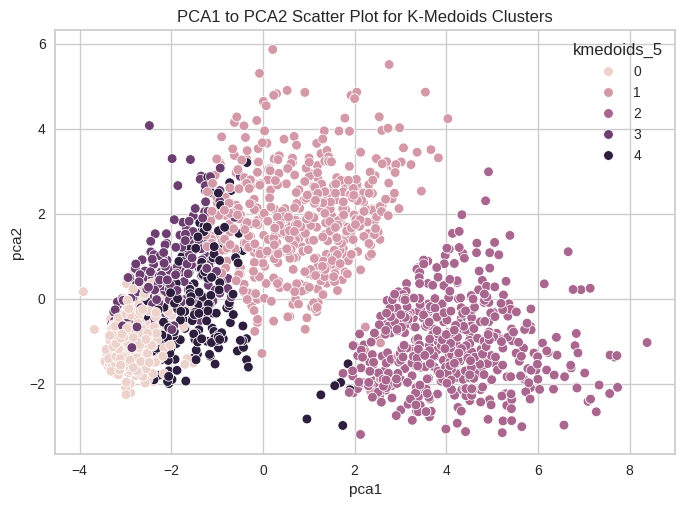

In [ ]:
# Hint: Use PCA_PLOT function created above
# sns.scatterplot(x = 0, y = 1, data=data_pca, hue=cluster)
# sns.scatterplot(x = 0, y = 1, data=data_pca)
sns.scatterplot(x = 'pca1', y = 'pca2', data = data_pca, hue = data_pca["kmedoids_5"])
plt.title('PCA1 to PCA2 Scatter Plot for K-Medoids Clusters')
plt.show()

#### **Observation**
-

### **Cluster Profiling**

In [ ]:
# Calculate Mean for each Variable in Data Features for each Cluster
data_features.groupby('kmedoids_5')[data_features.select_dtypes(include=['number']).columns].mean().style.highlight_max(axis=0, color='green')

In [ ]:
# Calculate Mean for each Variable in Data Features for each Cluster
data_features.groupby('kmedoids_5')[data_features.select_dtypes(include=['number']).columns].mean().style.highlight_min(axis=0, color='red')

**Let's plot the boxplot**

In [ ]:
# Create boxplot for each of the variables


#### **Cluster Characteristics**

K-Medoids 0 Characteristics
- Meadium Household Income.
- More household teens.
- Purchase discount products.
- Preference for web purchase method.
- Slightly older.

K-Medoids 1 Characteristics
- Lowest Household Income.
- More household children.
- Lower spend on all product types.
- Lower total and average spend.
- Accepted less offers.

K-Medoids 2 Characteristics
- Lower Household Income
- Higher spend on all product types.
- Higher total and average spend.
- Preference for catalog and store purchase methods.
- Accepted more offers.

K-Medoids 3 Characteristics
- Highest Household Income

K-Medoids 4 Characteristics
- Higher Household Income

### **Remove K-Medoids Labels for K = 5**

In [ ]:
# Remove Data PCA K-Medoids Labels for K = 5
data_pca.drop('kmedoids_5', axis=1, inplace=True)
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pca1    2205 non-null   float64
 1   pca2    2205 non-null   float64
 2   pca3    2205 non-null   float64
 3   pca4    2205 non-null   float64
 4   pca5    2205 non-null   float64
 5   pca6    2205 non-null   float64
 6   pca7    2205 non-null   float64
 7   pca8    2205 non-null   float64
 8   pca9    2205 non-null   float64
 9   pca10   2205 non-null   float64
 10  pca11   2205 non-null   float64
 11  pca12   2205 non-null   float64
 12  pca13   2205 non-null   float64
 13  pca14   2205 non-null   float64
 14  pca15   2205 non-null   float64
 15  pca16   2205 non-null   float64
 16  pca17   2205 non-null   float64
 17  ac_3    2205 non-null   int64  
dtypes: float64(17), int64(1)
memory usage: 310.2 KB


In [ ]:
# Remove Data Segment K-Medoids Labels for K = 5
data_segment.drop('kmedoids_5', axis=1, inplace=True)
data_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_dsp              2205 non-null   int64  
 1   spend_wine                2205 non-null   int64  
 2   spend_fruit               2205 non-null   int64  
 3   spend_meat                2205 non-null   int64  
 4   spend_fish                2205 non-null   int64  
 5   spend_sweet               2205 non-null   int64  
 6   spend_gold                2205 non-null   int64  
 7   purchases_discount        2205 non-null   int64  
 8   purchases_web             2205 non-null   int64  
 9   purchases_catalog         2205 non-null   int64  
 10  purchases_store           2205 non-null   int64  
 11  visits_web                2205 non-null   int64  
 12  customer_enrollment_days  2205 non-null   int64  
 13  total_spend               2205 non-null   int64  
 14  total_pu

In [ ]:
# Remove Data Features K-Medoids Labels for K = 5
data_features.drop('kmedoids_5', axis=1, inplace=True)
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_yob              2205 non-null   int64         
 1   customer_edu              2205 non-null   object        
 2   customer_marital          2205 non-null   object        
 3   household_income          2205 non-null   int64         
 4   household_children        2205 non-null   int64         
 5   household_teens           2205 non-null   int64         
 6   customer_doe              2205 non-null   datetime64[ns]
 7   customer_dsp              2205 non-null   int64         
 8   spend_wine                2205 non-null   int64         
 9   spend_fruit               2205 non-null   int64         
 10  spend_meat                2205 non-null   int64         
 11  spend_fish                2205 non-null   int64         
 12  spend_sweet         

## **Hierarchical Clustering**

Find the Cophenetic Correlation for different distances with different linkage methods.

### **Cophenetic Correlation**

The Cophenetic Correlation Coefficient is a measurement of the correlation between the pairwise distances between all data points in the original dataset and their cophenetic distance.

cophenetic distances (Dendrogramic distance) obtained from the tree, and the original distances used to construct the tree. It is a measure of how faithfully a dendrogram preserves the pairwise distances between the original unmodeled data points.

The cophenetic distance between two observations is represented in a dendrogram by the height of the link at which those two observations are first joined. That height is the distance between the two subclusters that are merged by that link.

Cophenetic correlation is the way to compare two or more dendrograms.

### **Calculate Cophenetic Correlation for each Distance Metric with each Linkage Method**

In [ ]:
# Distance Metrics List
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]
# Linkage Methods List
linkage_methods = ["single", "complete", "average"]

high_cophenet_corr = 0                                                 # Creating a variable by assigning 0 to it
high_dm_lm = [0, 0]                                                    # Creating a list by assigning 0's to it

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(data_pca, metric=dm, method=lm)                    # Applying different linkages with different distance on data_pca
        c, coph_dists = cophenet(Z, pdist(data_pca))                   # Calculating cophenetic correlation
        print(
            "Cophenetic Correlation for {} Distance and {} Linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:                                     # Checking if cophenetic correlation is higher than previous score
            high_cophenet_corr = c                                     # Appending to high_cophenet_corr list if it is higher
            high_dm_lm[0] = dm                                         # Appending its corresponding distance
            high_dm_lm[1] = lm                                         # Appending its corresponding method or linkage

Cophenetic Correlation for Euclidean Distance and single Linkage is 0.7990984976086454.
Cophenetic Correlation for Euclidean Distance and complete Linkage is 0.7001482518358338.
Cophenetic Correlation for Euclidean Distance and average Linkage is 0.8444641619003869.
Cophenetic Correlation for Chebyshev Distance and single Linkage is 0.4755745049312317.
Cophenetic Correlation for Chebyshev Distance and complete Linkage is 0.7487557391541835.
Cophenetic Correlation for Chebyshev Distance and average Linkage is 0.8064541137935791.
Cophenetic Correlation for Mahalanobis Distance and single Linkage is 0.767245296129987.
Cophenetic Correlation for Mahalanobis Distance and complete Linkage is 0.706793639954272.
Cophenetic Correlation for Mahalanobis Distance and average Linkage is 0.7618209576093957.
Cophenetic Correlation for Cityblock Distance and single Linkage is 0.7915302568245981.
Cophenetic Correlation for Cityblock Distance and complete Linkage is 0.7502523061875649.
Cophenetic Correl

In [ ]:
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest Cophenetic Correlation is {} with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest Cophenetic Correlation is 0.8444641619003869 with Euclidean distance and average linkage.


**Let's have a look at the dendrograms for different linkages with `Cityblock distance`**

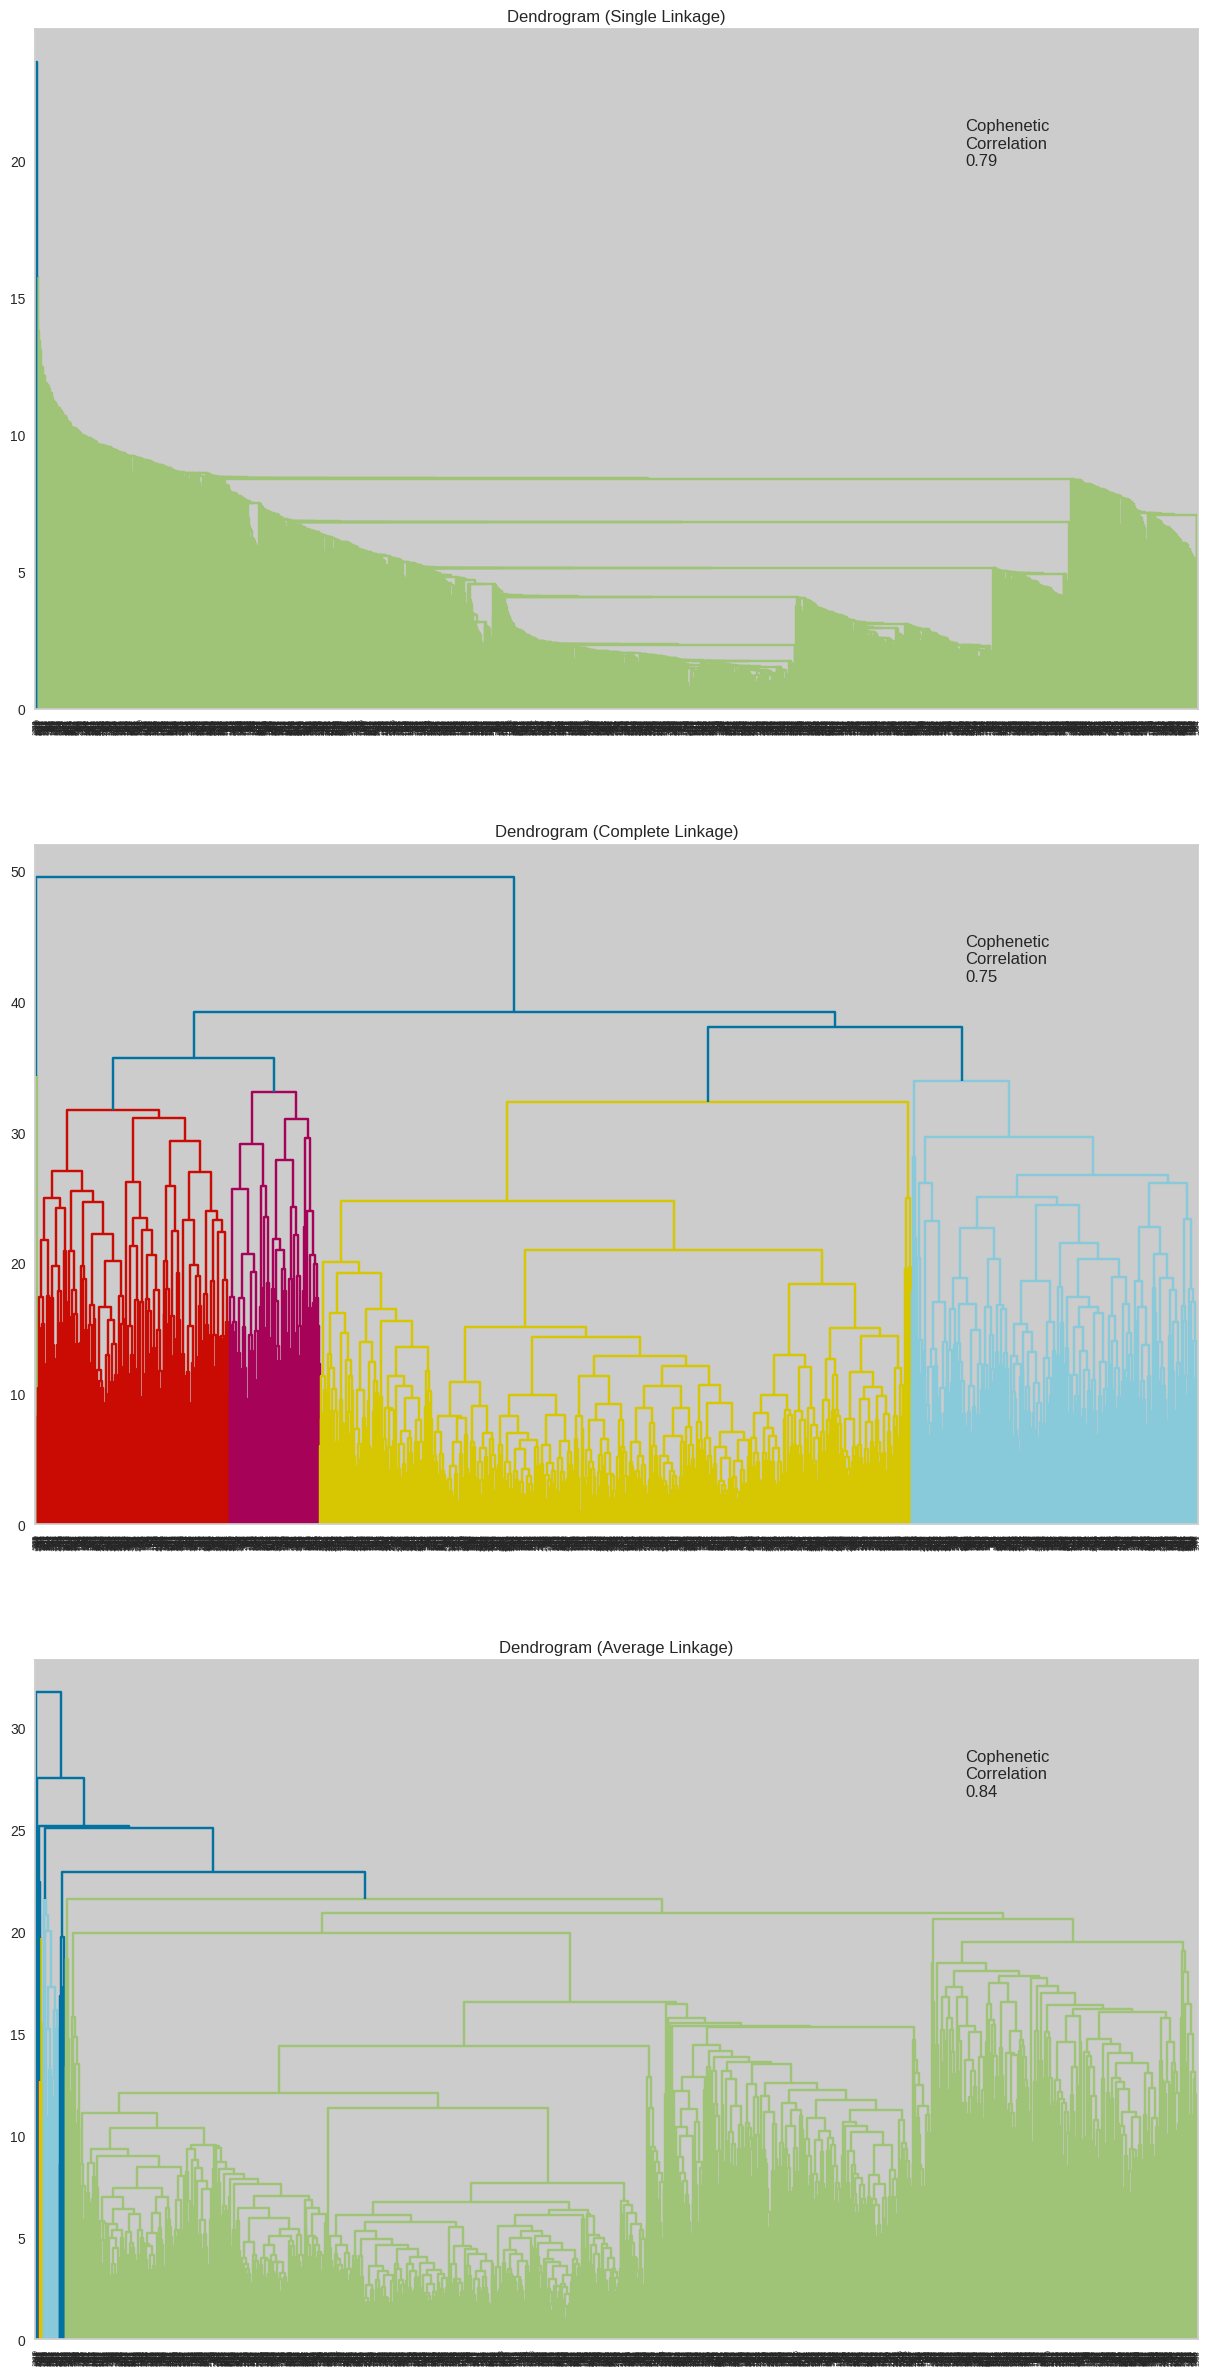

In [ ]:
# Linkage Methods List
linkage_methods = ["single", "complete", "average"]
# Cophenetic Correlation Results List
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))            # Setting the plot size

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="Cityblock", method=method)                  # Measures the distances between two clusters

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))                       # Finding cophenetic correlation for different linkages with city block distance
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations and Insights:**

**Think about it:**

- Can we clearly decide the number of clusters based on where to cut the dendrogram horizontally?
- What is the next step in obtaining number of clusters based on the dendrogram?

**Let's have a look at the dendrograms for different linkages with `Chebyshev distance`**

In [ ]:
# Plot the dendrogram for Chebyshev distance with linkages single, complete and average.
# Hint: Use Chebyshev distance as the metric in the linkage() function


**Observations and Insights:**

**Let's have a look at the dendrograms for different linkages with Mahalanobis distance**

In [ ]:
# Plot the dendrogram for Mahalanobis distance with linkages single, complete and average.
# Hint: Use Mahalanobis distance as the metric in the linkage() function


**Observations and Insights:**

**Let's have a look at the dendrograms for different linkages with Euclidean distance**

In [ ]:
# Plot the dendrogram for Euclidean distance with linkages single, complete, average and ward.
# Hint: Use Euclidean distance as the metric in the linkage() function


**Think about it:**

- Are there any distinct clusters in any of the dendrograms?

**Observations and Insights:**

In [ ]:
# Create Agglomerative Clustering Object with 3 Clusters, Euclidean Affinity, and Ward Linkage
HCmodel = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
# Fit Hierarchical Clustering Object to Data PCA
HCmodel.fit(data_pca)

AgglomerativeClustering(n_clusters=3)

In [ ]:
# Add Agglomerative Clustering Lables to Data PCA
data_pca["ac_3"] = HCmodel.labels_
data_pca['ac_3'].value_counts().sort_index()
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pca1    2205 non-null   float64
 1   pca2    2205 non-null   float64
 2   pca3    2205 non-null   float64
 3   pca4    2205 non-null   float64
 4   pca5    2205 non-null   float64
 5   pca6    2205 non-null   float64
 6   pca7    2205 non-null   float64
 7   pca8    2205 non-null   float64
 8   pca9    2205 non-null   float64
 9   pca10   2205 non-null   float64
 10  pca11   2205 non-null   float64
 11  pca12   2205 non-null   float64
 12  pca13   2205 non-null   float64
 13  pca14   2205 non-null   float64
 14  pca15   2205 non-null   float64
 15  pca16   2205 non-null   float64
 16  pca17   2205 non-null   float64
 17  ac_3    2205 non-null   int64  
dtypes: float64(17), int64(1)
memory usage: 310.2 KB


In [ ]:
# Add Agglomerative Clustering Lables to Data Segment
data_segment["ac_3"] = HCmodel.labels_
data_segment['ac_3'].value_counts().sort_index()
data_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_dsp              2205 non-null   int64  
 1   spend_wine                2205 non-null   int64  
 2   spend_fruit               2205 non-null   int64  
 3   spend_meat                2205 non-null   int64  
 4   spend_fish                2205 non-null   int64  
 5   spend_sweet               2205 non-null   int64  
 6   spend_gold                2205 non-null   int64  
 7   purchases_discount        2205 non-null   int64  
 8   purchases_web             2205 non-null   int64  
 9   purchases_catalog         2205 non-null   int64  
 10  purchases_store           2205 non-null   int64  
 11  visits_web                2205 non-null   int64  
 12  customer_enrollment_days  2205 non-null   int64  
 13  total_spend               2205 non-null   int64  
 14  total_pu

In [ ]:
# Add Agglomerative Clustering Lables to Data Features
data_features["ac_3"] = HCmodel.labels_
data_features['ac_3'].value_counts().sort_index()
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_yob              2205 non-null   int64         
 1   customer_edu              2205 non-null   object        
 2   customer_marital          2205 non-null   object        
 3   household_income          2205 non-null   int64         
 4   household_children        2205 non-null   int64         
 5   household_teens           2205 non-null   int64         
 6   customer_doe              2205 non-null   datetime64[ns]
 7   customer_dsp              2205 non-null   int64         
 8   spend_wine                2205 non-null   int64         
 9   spend_fruit               2205 non-null   int64         
 10  spend_meat                2205 non-null   int64         
 11  spend_fish                2205 non-null   int64         
 12  spend_sweet         

In [ ]:
# Let's check the distribution


### **PCA Scatter Plot**

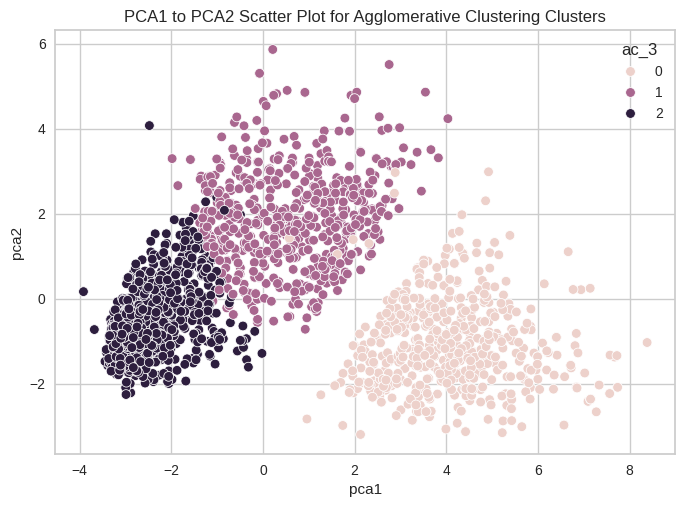

In [ ]:
# sns.scatterplot(x = 0, y = 1, data=data_pca, hue=cluster)
# sns.scatterplot(x = 0, y = 1, data=data_pca)
sns.scatterplot(x = 'pca1', y = 'pca2', data = data_pca, hue = data_pca["ac_3"])
plt.title('PCA1 to PCA2 Scatter Plot for Agglomerative Clustering Clusters')
plt.show()

### **Cluster Profiles**

In [ ]:
# Calculate Mean for each Variable in Data Features for each Cluster
data_features.groupby('ac_3')[data_features.select_dtypes(include=['number']).columns].mean().style.highlight_max(axis=0, color='green')

In [ ]:
# Calculate Mean for each Variable in Data Features for each Cluster
data_features.groupby('ac_3')[data_features.select_dtypes(include=['number']).columns].mean().style.highlight_min(axis=0, color='red')

In [ ]:
# Create boxplot for each of the variables


#### **Cluster Characteristics**

K-Medoids 0 Characteristics
- Meadium Household Income.
- More household teens.
- Purchase discount products.
- Preference for web purchase method.
- Slightly older.

K-Medoids 1 Characteristics
- Lowest Household Income.
- More household children.
- Lower spend on all product types.
- Lower total and average spend.
- Accepted less offers.

K-Medoids 2 Characteristics
- Lower Household Income
- Higher spend on all product types.
- Higher total and average spend.
- Preference for catalog and store purchase methods.
- Accepted more offers.

K-Medoids 3 Characteristics
- Highest Household Income

K-Medoids 4 Characteristics
- Higher Household Income

**Observations and Insights:**

In [ ]:
# Remove Data PCA Agglomerative Clustering Labels
data_pca.drop('ac_3', axis=1, inplace=True)
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pca1    2205 non-null   float64
 1   pca2    2205 non-null   float64
 2   pca3    2205 non-null   float64
 3   pca4    2205 non-null   float64
 4   pca5    2205 non-null   float64
 5   pca6    2205 non-null   float64
 6   pca7    2205 non-null   float64
 7   pca8    2205 non-null   float64
 8   pca9    2205 non-null   float64
 9   pca10   2205 non-null   float64
 10  pca11   2205 non-null   float64
 11  pca12   2205 non-null   float64
 12  pca13   2205 non-null   float64
 13  pca14   2205 non-null   float64
 14  pca15   2205 non-null   float64
 15  pca16   2205 non-null   float64
 16  pca17   2205 non-null   float64
dtypes: float64(17)
memory usage: 293.0 KB


In [ ]:
# Remove Data PCA Agglomerative Clustering Labels
data_segment.drop('ac_3', axis=1, inplace=True)
data_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_dsp              2205 non-null   int64  
 1   spend_wine                2205 non-null   int64  
 2   spend_fruit               2205 non-null   int64  
 3   spend_meat                2205 non-null   int64  
 4   spend_fish                2205 non-null   int64  
 5   spend_sweet               2205 non-null   int64  
 6   spend_gold                2205 non-null   int64  
 7   purchases_discount        2205 non-null   int64  
 8   purchases_web             2205 non-null   int64  
 9   purchases_catalog         2205 non-null   int64  
 10  purchases_store           2205 non-null   int64  
 11  visits_web                2205 non-null   int64  
 12  customer_enrollment_days  2205 non-null   int64  
 13  total_spend               2205 non-null   int64  
 14  total_pu

In [ ]:
# Remove Data PCA Agglomerative Clustering Labels
data_features.drop('ac_3', axis=1, inplace=True)
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_yob              2205 non-null   int64         
 1   customer_edu              2205 non-null   object        
 2   customer_marital          2205 non-null   object        
 3   household_income          2205 non-null   int64         
 4   household_children        2205 non-null   int64         
 5   household_teens           2205 non-null   int64         
 6   customer_doe              2205 non-null   datetime64[ns]
 7   customer_dsp              2205 non-null   int64         
 8   spend_wine                2205 non-null   int64         
 9   spend_fruit               2205 non-null   int64         
 10  spend_meat                2205 non-null   int64         
 11  spend_fish                2205 non-null   int64         
 12  spend_sweet         

## **DBSCAN**

DBSCAN is a very powerful algorithm for finding high-density clusters, but the problem is determining the best set of hyperparameters to use with it. It includes two hyperparameters, `eps`, and `min samples`.

Since it is an unsupervised algorithm, you have no control over it, unlike a supervised learning algorithm, which allows you to test your algorithm on a validation set. The approach we can follow is basically trying out a bunch of different combinations of values and finding the silhouette score for each of them.

In [ ]:
# Initializing lists
eps_value = [2,3]                       # Taking random eps value
min_sample_values = [6,20]              # Taking random min_sample value

# Creating a dictionary for each of the values in eps_value with min_sample_values
res = {eps_value[i]: min_sample_values for i in range(len(eps_value))}

In [ ]:
# Finding the silhouette_score for each of the combinations
high_silhouette_avg = 0                                               # Assigning 0 to the high_silhouette_avg variable
high_i_j = [0, 0]                                                     # Assigning 0's to the high_i_j list
key = res.keys()                                                      # Assigning dictionary keys to a variable called key
for i in key:
    z = res[i]                                                        # Assigning dictionary values of each i to z
    for j in z:
        db = DBSCAN(eps=i, min_samples=j).fit(data_pca)               # Applying DBSCAN to each of the combination in dictionary
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        silhouette_avg = silhouette_score(data_pca, labels)           # Finding silhouette score
        print(
            "For eps value =" + str(i),
            "For min sample =" + str(j),
            "The average silhoutte_score is :",
            silhouette_avg,                                          # Printing the silhouette score for each of the combinations
        )
        if high_silhouette_avg < silhouette_avg:                     # If the silhouette score is greater than 0 or the previous score, it will get appended to the high_silhouette_avg list with its combination of i and j
            high_i_j[0] = i
            high_i_j[1] = j

For eps value =2 For min sample =6 The average silhoutte_score is : 0.14364416195974838
For eps value =2 For min sample =20 The average silhoutte_score is : 0.33810543981222374
For eps value =3 For min sample =6 The average silhoutte_score is : 0.2599152580703507
For eps value =3 For min sample =20 The average silhoutte_score is : 0.3450290943473794


In [ ]:
# Printing the highest silhouette score
print("Highest Silhoutte Average is {} for Epsilon = {} and Minimum Samples = {}".format(high_silhouette_avg, high_i_j[0], high_i_j[1]))

Highest Silhoutte Average is 0 for Epsilon = 3 and Minimum Samples = 20


**Now, let's apply DBSCAN using the hyperparameter values we have received above.**

In [ ]:
# Create DBSCAN Object with Epsilon = 3 and Minimum Sampes = 20
dbscan = DBSCAN(eps = 3, min_samples = 20)
# Fit DBSCAN Object to Data PCA
dbscan.fit(data_pca)

DBSCAN(eps=3, min_samples=20)

In [ ]:
# Add DBSCAN Lables to Data PCA
data_pca['dbscan'] = dbscan.labels_
data_pca['dbscan'].value_counts().sort_index()
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pca1    2205 non-null   float64
 1   pca2    2205 non-null   float64
 2   pca3    2205 non-null   float64
 3   pca4    2205 non-null   float64
 4   pca5    2205 non-null   float64
 5   pca6    2205 non-null   float64
 6   pca7    2205 non-null   float64
 7   pca8    2205 non-null   float64
 8   pca9    2205 non-null   float64
 9   pca10   2205 non-null   float64
 10  pca11   2205 non-null   float64
 11  pca12   2205 non-null   float64
 12  pca13   2205 non-null   float64
 13  pca14   2205 non-null   float64
 14  pca15   2205 non-null   float64
 15  pca16   2205 non-null   float64
 16  pca17   2205 non-null   float64
 17  dbscan  2205 non-null   int64  
dtypes: float64(17), int64(1)
memory usage: 310.2 KB


In [ ]:
# Add DBSCAN Lables to Data PCA
data_segment['dbscan'] = dbscan.labels_
data_segment['dbscan'].value_counts().sort_index()
data_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_dsp              2205 non-null   int64  
 1   spend_wine                2205 non-null   int64  
 2   spend_fruit               2205 non-null   int64  
 3   spend_meat                2205 non-null   int64  
 4   spend_fish                2205 non-null   int64  
 5   spend_sweet               2205 non-null   int64  
 6   spend_gold                2205 non-null   int64  
 7   purchases_discount        2205 non-null   int64  
 8   purchases_web             2205 non-null   int64  
 9   purchases_catalog         2205 non-null   int64  
 10  purchases_store           2205 non-null   int64  
 11  visits_web                2205 non-null   int64  
 12  customer_enrollment_days  2205 non-null   int64  
 13  total_spend               2205 non-null   int64  
 14  total_pu

In [ ]:
# Add DBSCAN Lables to Data PCA
data_features['dbscan'] = dbscan.labels_
data_features['dbscan'].value_counts().sort_index()
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_yob              2205 non-null   int64         
 1   customer_edu              2205 non-null   object        
 2   customer_marital          2205 non-null   object        
 3   household_income          2205 non-null   int64         
 4   household_children        2205 non-null   int64         
 5   household_teens           2205 non-null   int64         
 6   customer_doe              2205 non-null   datetime64[ns]
 7   customer_dsp              2205 non-null   int64         
 8   spend_wine                2205 non-null   int64         
 9   spend_fruit               2205 non-null   int64         
 10  spend_meat                2205 non-null   int64         
 11  spend_fish                2205 non-null   int64         
 12  spend_sweet         

In [ ]:
# Let's check the distribution


### **PCA Scatter Plot**

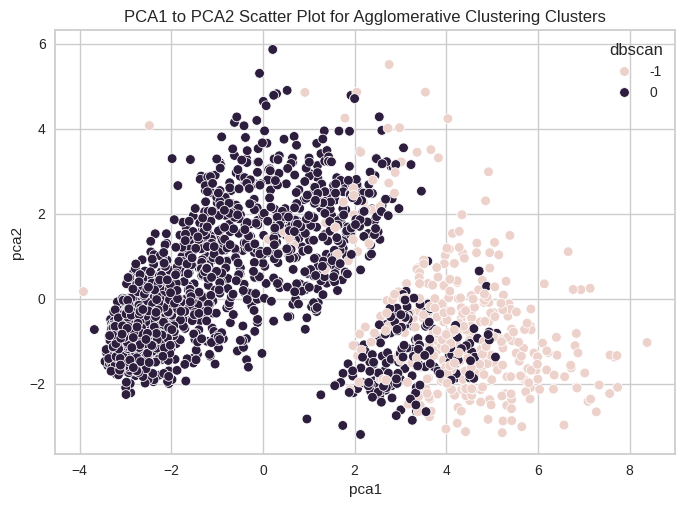

In [ ]:
# sns.scatterplot(x = 0, y = 1, data=data_pca, hue=cluster)
# sns.scatterplot(x = 0, y = 1, data=data_pca)
sns.scatterplot(x = 'pca1', y = 'pca2', data = data_pca, hue = data_pca["dbscan"])
plt.title('PCA1 to PCA2 Scatter Plot for Agglomerative Clustering Clusters')
plt.show()

In [ ]:
# Calculate Mean for each Variable in Data Features for each Cluster
data_features.groupby('dbscan')[data_features.select_dtypes(include=['number']).columns].mean().style.highlight_max(axis=0, color='green')

In [ ]:
# Calculate Mean for each Variable in Data Features for each Cluster
data_features.groupby('dbscan')[data_features.select_dtypes(include=['number']).columns].mean().style.highlight_min(axis=0, color='red')

**Observations and Insights:**

**Think about it:**

- Changing the eps and min sample values will result in different DBSCAN results? Can we try more value for eps and min_sample?

**Note:** You can experiment with different eps and min_sample values to see if DBSCAN produces good distribution and cluster profiles.

In [ ]:
# Remove Data PCA DBSCAN Labels
data_pca.drop('dbscan', axis=1, inplace=True)
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pca1    2205 non-null   float64
 1   pca2    2205 non-null   float64
 2   pca3    2205 non-null   float64
 3   pca4    2205 non-null   float64
 4   pca5    2205 non-null   float64
 5   pca6    2205 non-null   float64
 6   pca7    2205 non-null   float64
 7   pca8    2205 non-null   float64
 8   pca9    2205 non-null   float64
 9   pca10   2205 non-null   float64
 10  pca11   2205 non-null   float64
 11  pca12   2205 non-null   float64
 12  pca13   2205 non-null   float64
 13  pca14   2205 non-null   float64
 14  pca15   2205 non-null   float64
 15  pca16   2205 non-null   float64
 16  pca17   2205 non-null   float64
dtypes: float64(17)
memory usage: 293.0 KB


In [ ]:
# Remove Data Segment DBSCAN Labels
data_segment.drop('dbscan', axis=1, inplace=True)
data_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_dsp              2205 non-null   int64  
 1   spend_wine                2205 non-null   int64  
 2   spend_fruit               2205 non-null   int64  
 3   spend_meat                2205 non-null   int64  
 4   spend_fish                2205 non-null   int64  
 5   spend_sweet               2205 non-null   int64  
 6   spend_gold                2205 non-null   int64  
 7   purchases_discount        2205 non-null   int64  
 8   purchases_web             2205 non-null   int64  
 9   purchases_catalog         2205 non-null   int64  
 10  purchases_store           2205 non-null   int64  
 11  visits_web                2205 non-null   int64  
 12  customer_enrollment_days  2205 non-null   int64  
 13  total_spend               2205 non-null   int64  
 14  total_pu

In [ ]:
# Remove Data Features DBSCAN Labels
data_features.drop('dbscan', axis=1, inplace=True)
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_yob              2205 non-null   int64         
 1   customer_edu              2205 non-null   object        
 2   customer_marital          2205 non-null   object        
 3   household_income          2205 non-null   int64         
 4   household_children        2205 non-null   int64         
 5   household_teens           2205 non-null   int64         
 6   customer_doe              2205 non-null   datetime64[ns]
 7   customer_dsp              2205 non-null   int64         
 8   spend_wine                2205 non-null   int64         
 9   spend_fruit               2205 non-null   int64         
 10  spend_meat                2205 non-null   int64         
 11  spend_fish                2205 non-null   int64         
 12  spend_sweet         

## **Gaussian Mixture Model**

**Let's find the silhouette score for K=5 in Gaussian Mixture**

In [ ]:
# Fit GMM for K = 5 and Random State = 1
gmm = GaussianMixture(n_components = 5, random_state = 1)
gmm.fit(data_pca)

GaussianMixture(n_components=5, random_state=1)

In [ ]:
# Calculate GMM Silhouette Score for K = 5
# silhouette_score_gmm = silhouette_score(data_pca, gmm.labels_)
# silhouette_score_gmm = silhouette_score(data_pca, gmm.predict)
silhouette_score_gmm = silhouette_score(data_pca, gmm.predict(data_pca))
print(f"GMM Silhouette Score K = 5 | {silhouette_score_gmm:.3f}")

GMM Silhouette Score K = 5 | 0.114


#### **Observation**
- Low silhouette score.

In [ ]:
# Create GMM Labels
gmm_labels = gmm.predict(data_pca)
print(gmm_labels)

[3 4 0 ... 0 0 2]


In [ ]:
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pca1    2205 non-null   float64
 1   pca2    2205 non-null   float64
 2   pca3    2205 non-null   float64
 3   pca4    2205 non-null   float64
 4   pca5    2205 non-null   float64
 5   pca6    2205 non-null   float64
 6   pca7    2205 non-null   float64
 7   pca8    2205 non-null   float64
 8   pca9    2205 non-null   float64
 9   pca10   2205 non-null   float64
 10  pca11   2205 non-null   float64
 11  pca12   2205 non-null   float64
 12  pca13   2205 non-null   float64
 13  pca14   2205 non-null   float64
 14  pca15   2205 non-null   float64
 15  pca16   2205 non-null   float64
 16  pca17   2205 non-null   float64
dtypes: float64(17)
memory usage: 293.0 KB


In [ ]:
data_pca["gmm_5"] = labels
# data_pca['gmm_5'].value_counts().sort_index()
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pca1    2205 non-null   float64
 1   pca2    2205 non-null   float64
 2   pca3    2205 non-null   float64
 3   pca4    2205 non-null   float64
 4   pca5    2205 non-null   float64
 5   pca6    2205 non-null   float64
 6   pca7    2205 non-null   float64
 7   pca8    2205 non-null   float64
 8   pca9    2205 non-null   float64
 9   pca10   2205 non-null   float64
 10  pca11   2205 non-null   float64
 11  pca12   2205 non-null   float64
 12  pca13   2205 non-null   float64
 13  pca14   2205 non-null   float64
 14  pca15   2205 non-null   float64
 15  pca16   2205 non-null   float64
 16  pca17   2205 non-null   float64
 17  gmm_5   2205 non-null   int64  
dtypes: float64(17), int64(1)
memory usage: 310.2 KB


In [ ]:
data_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_dsp              2205 non-null   int64  
 1   spend_wine                2205 non-null   int64  
 2   spend_fruit               2205 non-null   int64  
 3   spend_meat                2205 non-null   int64  
 4   spend_fish                2205 non-null   int64  
 5   spend_sweet               2205 non-null   int64  
 6   spend_gold                2205 non-null   int64  
 7   purchases_discount        2205 non-null   int64  
 8   purchases_web             2205 non-null   int64  
 9   purchases_catalog         2205 non-null   int64  
 10  purchases_store           2205 non-null   int64  
 11  visits_web                2205 non-null   int64  
 12  customer_enrollment_days  2205 non-null   int64  
 13  total_spend               2205 non-null   int64  
 14  total_pu

In [ ]:
data_segment["gmm_5"] = labels
# data_pca['gmm_5'].value_counts().sort_index()
data_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_dsp              2205 non-null   int64  
 1   spend_wine                2205 non-null   int64  
 2   spend_fruit               2205 non-null   int64  
 3   spend_meat                2205 non-null   int64  
 4   spend_fish                2205 non-null   int64  
 5   spend_sweet               2205 non-null   int64  
 6   spend_gold                2205 non-null   int64  
 7   purchases_discount        2205 non-null   int64  
 8   purchases_web             2205 non-null   int64  
 9   purchases_catalog         2205 non-null   int64  
 10  purchases_store           2205 non-null   int64  
 11  visits_web                2205 non-null   int64  
 12  customer_enrollment_days  2205 non-null   int64  
 13  total_spend               2205 non-null   int64  
 14  total_pu

In [ ]:
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_yob              2205 non-null   int64         
 1   customer_edu              2205 non-null   object        
 2   customer_marital          2205 non-null   object        
 3   household_income          2205 non-null   int64         
 4   household_children        2205 non-null   int64         
 5   household_teens           2205 non-null   int64         
 6   customer_doe              2205 non-null   datetime64[ns]
 7   customer_dsp              2205 non-null   int64         
 8   spend_wine                2205 non-null   int64         
 9   spend_fruit               2205 non-null   int64         
 10  spend_meat                2205 non-null   int64         
 11  spend_fish                2205 non-null   int64         
 12  spend_sweet         

In [ ]:
data_features["gmm_5"] = labels
# data_pca['gmm_5'].value_counts().sort_index()
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_yob              2205 non-null   int64         
 1   customer_edu              2205 non-null   object        
 2   customer_marital          2205 non-null   object        
 3   household_income          2205 non-null   int64         
 4   household_children        2205 non-null   int64         
 5   household_teens           2205 non-null   int64         
 6   customer_doe              2205 non-null   datetime64[ns]
 7   customer_dsp              2205 non-null   int64         
 8   spend_wine                2205 non-null   int64         
 9   spend_fruit               2205 non-null   int64         
 10  spend_meat                2205 non-null   int64         
 11  spend_fish                2205 non-null   int64         
 12  spend_sweet         

In [ ]:
# Let's check the distribution


### **PCA Scatter Plot**

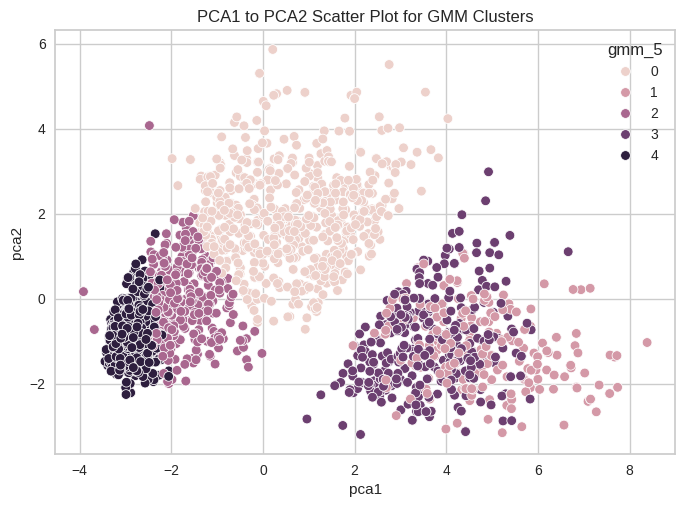

In [ ]:
# PCA1 to PCA2 Scatter PLot with GMM Lables Hue
sns.scatterplot(x = 'pca1', y = 'pca2', data = data_pca, hue = data_pca["gmm_5"])
plt.title('PCA1 to PCA2 Scatter Plot for GMM Clusters')
plt.show()

### **Cluster Profiles**

In [ ]:
# Calculate Mean for each Variable in Data Features for each Cluster
data_features.groupby('gmm_5')[data_features.select_dtypes(include=['number']).columns].mean().style.highlight_max(axis=0, color='green')

In [ ]:
# Calculate Mean for each Variable in Data Features for each Cluster
data_features.groupby('gmm_5')[data_features.select_dtypes(include=['number']).columns].mean().style.highlight_min(axis=0, color='red')

In [ ]:
data_features.groupby('gmm_5')[data_features.select_dtypes(include=['number']).columns].mean().sort_values(by='household_income', ascending=True).transpose().style.highlight_max(axis=1, color='green').highlight_min(axis=1, color='red')

**Let's plot the boxplot**

In [ ]:
# Create boxplot for each of the variables


#### **Cluster Characteristics**

GMM 4 Characteristics
- Lowest Household Income
- Youngest
- Most household children.
- Most household dependents.
- Most household members.
- Lowest spend on all product types.
- Lowest total spend.
- Lowest average spend.
- Fewest purchases for all buy channels.
- Fewest accepted offers.

GMM 2 Characteristics
- Lower Household Income
- Most household adults.
- Few accepted offers.

GMM 0 Characteristics
- Meadium Household Income.
- Oldest customers.
- Most household teens.
- Most discount purchases.
- Most web purchases.

GMM 3 Characteristics
- Higher Household Income
- Lowest household children.
- Highest spend on fruit.
- Highest spend on fish.
- Highest spend on sweet.
- Highest spend on gold.
- Most catalog purchase.
- Most store purchases.
- Highest total purchases.

GMM 1 Characteristics
- Highest Household Income
- Highest spend on wine.
- Highest spend on meat.
- Fewest discont purchases.
- Fewest household adults.
- Fewest household dependents.
- Fewest household members.
- Highest total spend.
- Highest average spend.
- Most accepted offers.

In [ ]:
# Remove Data PCA GMM Labels
data_pca.drop('gmm_5', axis=1, inplace=True)
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pca1    2205 non-null   float64
 1   pca2    2205 non-null   float64
 2   pca3    2205 non-null   float64
 3   pca4    2205 non-null   float64
 4   pca5    2205 non-null   float64
 5   pca6    2205 non-null   float64
 6   pca7    2205 non-null   float64
 7   pca8    2205 non-null   float64
 8   pca9    2205 non-null   float64
 9   pca10   2205 non-null   float64
 10  pca11   2205 non-null   float64
 11  pca12   2205 non-null   float64
 12  pca13   2205 non-null   float64
 13  pca14   2205 non-null   float64
 14  pca15   2205 non-null   float64
 15  pca16   2205 non-null   float64
 16  pca17   2205 non-null   float64
dtypes: float64(17)
memory usage: 293.0 KB


In [ ]:
# Remove Data Segment GMM Labels
data_segment.drop('gmm_5', axis=1, inplace=True)
data_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_dsp              2205 non-null   int64  
 1   spend_wine                2205 non-null   int64  
 2   spend_fruit               2205 non-null   int64  
 3   spend_meat                2205 non-null   int64  
 4   spend_fish                2205 non-null   int64  
 5   spend_sweet               2205 non-null   int64  
 6   spend_gold                2205 non-null   int64  
 7   purchases_discount        2205 non-null   int64  
 8   purchases_web             2205 non-null   int64  
 9   purchases_catalog         2205 non-null   int64  
 10  purchases_store           2205 non-null   int64  
 11  visits_web                2205 non-null   int64  
 12  customer_enrollment_days  2205 non-null   int64  
 13  total_spend               2205 non-null   int64  
 14  total_pu

In [ ]:
# Remove Data Features GMM Labels
data_features.drop('gmm_5', axis=1, inplace=True)
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_yob              2205 non-null   int64         
 1   customer_edu              2205 non-null   object        
 2   customer_marital          2205 non-null   object        
 3   household_income          2205 non-null   int64         
 4   household_children        2205 non-null   int64         
 5   household_teens           2205 non-null   int64         
 6   customer_doe              2205 non-null   datetime64[ns]
 7   customer_dsp              2205 non-null   int64         
 8   spend_wine                2205 non-null   int64         
 9   spend_fruit               2205 non-null   int64         
 10  spend_meat                2205 non-null   int64         
 11  spend_fish                2205 non-null   int64         
 12  spend_sweet         

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?